In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# imort essential libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data

In [ ]:
folder_path_train = '/content/drive/My Drive/DS7/train_imdb.jsonl'

In [ ]:
folder_path_test = '/content/drive/My Drive/DS7/test_imdb.jsonl'

In [ ]:
folder_path_unlabeled = '/content/drive/My Drive/DS7/aug_imdb_unlabeled.jsonl'

In [ ]:
# Load JSON file into a pandas DataFrame
train_df = pd.read_json(folder_path_train,lines=True)
test_df = pd.read_json(folder_path_test,lines=True)
unlabeled_df = pd.read_json(folder_path_unlabeled,lines=True)

In [ ]:
train_df.to_csv('train_df.csv')
test_df.to_csv('test.csv')
unlabeled_df.to_csv('unlabeled.csv')


In [ ]:
!pip install nltk textblob
!pip install textstat
!pip install spacy


import nltk
import textstat
from sklearn.feature_extraction.text import CountVectorizer


import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import spacy

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load('en_core_web_sm')

# Initialize necessary components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha() and word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity

def pos_tagging(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags)
    return pos_counts

def readability_scores(text):
    return textstat.flesch_reading_ease(text)

def add_ngram_features(df, ngram_range=(2, 3)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=5000)
    ngram_features = vectorizer.fit_transform(df['Processed_Text']).toarray()
    ngram_df = pd.DataFrame(ngram_features, columns=vectorizer.get_feature_names_out())
    return pd.concat([df.reset_index(drop=True), ngram_df.reset_index(drop=True)], axis=1)

def ner_features(text):
    doc = nlp(text)
    entity_counts = {}
    for ent in doc.ents:
        if ent.label_ in entity_counts:
            entity_counts[ent.label_] += 1
        else:
            entity_counts[ent.label_] = 1
    return entity_counts

def feature_engineering(df):
    df['Length'] = df['text'].apply(len)
    df['Word_Count'] = df['text'].apply(lambda x: len(word_tokenize(x)))
    df['Mean_Word_Length'] = df['text'].apply(lambda x: np.mean([len(word) for word in word_tokenize(x)]))
    df['Mean_Sent_Length'] = df['text'].apply(lambda x: np.mean([len(sent) for sent in sent_tokenize(x)]))
    df['Processed_Text'] = df['text'].apply(clean_text)
    df['Polarity'] = df['text'].apply(calculate_polarity)
    df['Cleaned_Text'] = df['Processed_Text'].apply(clean_text)
    df['Readability'] = df['text'].apply(readability_scores)

    pos_tag_features = df['text'].apply(pos_tagging)
    pos_df = pd.DataFrame(list(pos_tag_features)).fillna(0)
    pos_df.columns = [f"POS_{col}" for col in pos_df.columns]

    df = pd.concat([df.reset_index(drop=True), pos_df.reset_index(drop=True)], axis=1)

    df = add_ngram_features(df)

    ner_tag_features = df['text'].apply(ner_features)
    ner_df = pd.DataFrame(list(ner_tag_features)).fillna(0)
    ner_df.columns = [f"NER_{col}" for col in ner_df.columns]

    df = pd.concat([df.reset_index(drop=True), ner_df.reset_index(drop=True)], axis=1)
    return df

def preprocess(ReviewText):
    # Remove HTML tags
    ReviewText = ReviewText.str.replace(r'<.*?>', '', regex=True)
    # Remove special characters
    ReviewText = ReviewText.str.replace(r'&.*?;', '', regex=True)
    # Replace non-breaking space with a regular space
    ReviewText = ReviewText.str.replace(r'\xa0', ' ')
    # Convert to lowercase
    ReviewText = ReviewText.str.lower()
    # Remove any remaining punctuation
    ReviewText = ReviewText.str.replace(r'[^\w\s]', '')
    return ReviewText

train_df['text'] = preprocess(train_df['text'])
test_df['text'] = preprocess(test_df['text'])
unlabeled_df['text'] = preprocess(unlabeled_df['text'])



# Apply feature engineering on train, test, and augmentation datasets
train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)
unlabeled_df = feature_engineering(unlabeled_df)

print(train_df.head())










     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00







































[nltk_data] Downloading package punkt to /root/nltk_data...

[nltk_data]   Unzipping tokenizers/punkt.zip.

[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Unzipping corpora/stopwords.zip.

[nltk_data] Downloading package wordnet to /root/nltk_data...

[nltk_data] Downloading package averaged_perceptron_tagger to

[nltk_data]     /root/nltk_data...

[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


                                                text  label  \

0  fairly good romantic comedy in which i don't t...      1   

1  "dressed to kill", is one of the best thriller...      1   

2  i'm glad that users (as of this date) who like...      1   

3  needed an excuse to get out of the house while...      0   

4  john candy's performance in once upon a crime ...      1   



                                           embedding  Length  Word_Count  \

0  [-0.0167805497, -0.0395836979, 0.1233159453000...     382          84   

1  [-0.12526972590000002, 0.10147688540000001, 0....     702         156   

2  [0.1312361956, 0.0294876788, 0.2328549027, -0....     684         153   

3  [0.1387384981, 0.0460377187, 0.3447172046, -0....     629         131   

4  [0.1606466323, -0.1768193543, 0.35633808370000...     238          56   



   Mean_Word_Length  Mean_Sent_Length  \

0          3.714286         75.600000   

1          3.737179         99.428571   

2          3.686275     

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 150 entries, 0 to 149

Columns: 5067 entries, text to NER_WORK_OF_ART

dtypes: float64(56), int64(5007), object(4)

memory usage: 5.8+ MB


In [ ]:
len(train_df['embedding'][0])

768

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 150 entries, 0 to 149

Columns: 5069 entries, text to NER_PRODUCT

dtypes: float64(57), int64(5008), object(4)

memory usage: 5.8+ MB


In [ ]:
unlabeled_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1014 entries, 0 to 1013

Columns: 5072 entries, text to NER_LAW

dtypes: float64(64), int64(5004), object(4)

memory usage: 39.2+ MB


In [ ]:
unlabeled_df.isna()

text  embedding  Length  Word_Count  Mean_Word_Length  \
0     False      False   False       False             False   
1     False      False   False       False             False   
2     False      False   False       False             False   
3     False      False   False       False             False   
4     False      False   False       False             False   
...     ...        ...     ...         ...               ...   
1009  False      False   False       False             False   
1010  False      False   False       False             False   
1011  False      False   False       False             False   
1012  False      False   False       False             False   
1013  False      False   False       False             False   

      Mean_Sent_Length  Processed_Text  Polarity  Cleaned_Text  Readability  \
0                False           False     False         False        False   
1                False           False     False         False        False   
2                False           False     False         False        False   
3                False           False     False         False        False   
4                False           False     False         False        False   
...                ...             ...       ...           ...          ...   
1009             False           False     False         False        False   
1010             False           False     False         False        False   
1011             False           False     False         False        False   
1012             False           False     False         False        False   
1013             False           False     False         False        False   

      ...  NER_PRODUCT  NER_LANGUAGE  NER_MONEY  NER_LOC  NER_FAC  \
0     ...        False         False      False    False    False   
1     ...        False         False      False    False    False   
2     ...        False         False      False    False    False   
3     ...        False         False      False    False    False   
4     ...        False         False      False    False    False   
...   ...          ...           ...        ...      ...      ...   
1009  ...        False         False      False    False    False   
1010  ...        False         False      False    False    False   
1011  ...        False         False      False    False    False   
1012  ...        False         False      False    False    False   
1013  ...        False         False      False    False    False   

      NER_PERCENT  NER_QUANTITY  NER_EVENT  NER_WORK_OF_ART  NER_LAW  
0           False         False      False            False    False  
1           False         False      False            False    False  
2           False         False      False            False    False  
3           False         False      False            False    False  
4           False         False      False            False    False  
...           ...           ...        ...              ...      ...  
1009        False         False      False            False    False  
1010        False         False      False            False    False  
1011        False         False      False            False    False  
1012        False         False      False            False    False  
1013        False         False      False            False    False  

[1014 rows x 5072 columns]

In [ ]:
labeled_df = pd.concat([train_df , test_df])

In [ ]:
labeled_df.head()

text  label  \
0  fairly good romantic comedy in which i don't t...      1   
1  "dressed to kill", is one of the best thriller...      1   
2  i'm glad that users (as of this date) who like...      1   
3  needed an excuse to get out of the house while...      0   
4  john candy's performance in once upon a crime ...      1   

                                           embedding  Length  Word_Count  \
0  [-0.0167805497, -0.0395836979, 0.1233159453000...     382          84   
1  [-0.12526972590000002, 0.10147688540000001, 0....     702         156   
2  [0.1312361956, 0.0294876788, 0.2328549027, -0....     684         153   
3  [0.1387384981, 0.0460377187, 0.3447172046, -0....     629         131   
4  [0.1606466323, -0.1768193543, 0.35633808370000...     238          56   

   Mean_Word_Length  Mean_Sent_Length  \
0          3.714286         75.600000   
1          3.737179         99.428571   
2          3.686275         84.625000   
3          3.900763        104.000000   
4          3.482143         38.833333   

                                      Processed_Text  Polarity  \
0  fairly good romantic comedy think ever seen me...  0.316942   
1  dressed kill one best thriller ever made deali...  0.364773   
2  glad user date liked movie coming forward unde...  0.039801   
3  needed excuse get house paint dried left movie... -0.163413   
4  john candy performance upon crime possibly bes...  0.400000   

                                        Cleaned_Text  ...  zoe know  \
0  fairly good romantic comedy think ever seen me...  ...       NaN   
1  dressed kill one best thriller ever made deali...  ...       NaN   
2  glad user date liked movie coming forward unde...  ...       NaN   
3  needed excuse get house paint dried left movie...  ...       NaN   
4  john candy performance upon crime possibly bes...  ...       NaN   

   zoe know hiding  zoe trilling  zoe trilling second  zombie involved  \
0              NaN           NaN                  NaN              NaN   
1              NaN           NaN                  NaN              NaN   
2              NaN           NaN                  NaN              NaN   
3              NaN           NaN                  NaN              NaN   
4              NaN           NaN                  NaN              NaN   

   zombie involved simular  NER_PERCENT  NER_LAW  NER_FAC  NER_PRODUCT  
0                      NaN          NaN      NaN      NaN          NaN  
1                      NaN          NaN      NaN      NaN          NaN  
2                      NaN          NaN      NaN      NaN          NaN  
3                      NaN          NaN      NaN      NaN          NaN  
4                      NaN          NaN      NaN      NaN          NaN  

[5 rows x 9903 columns]

In [ ]:
labeled_df.isna().sum()

text                         0
label                        0
embedding                    0
Length                       0
Word_Count                   0
                          ... 
zombie involved simular    150
NER_PERCENT                150
NER_LAW                    150
NER_FAC                    150
NER_PRODUCT                150
Length: 9903, dtype: int64

In [ ]:
data = pd.concat([labeled_df, unlabeled_df])

In [ ]:
from IPython.display import display

print("Number of each sentiment in train_df : ")
temp = train_df.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
display(temp.style.background_gradient(cmap='Purples'))

print("Number of each sentiment in test_df : ")
temp = test_df.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
display(temp.style.background_gradient(cmap='Purples'))

print("Number of each sentiment in labeled_df : ")
temp = labeled_df.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
display(temp.style.background_gradient(cmap='Purples'))



Number of each sentiment in train_df : 


Number of each sentiment in test_df : 


Number of each sentiment in labeled_df : 


Number of each sentiment in train_df : 


<ipython-input-21-579cce38a68d>:7: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x='label', y='text', data=temp, palette=color)


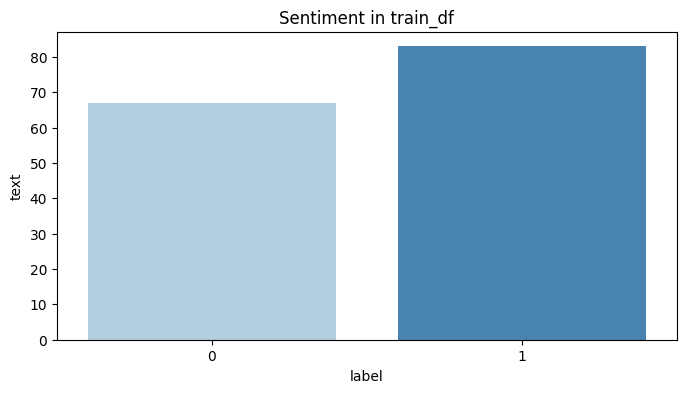

Number of each sentiment in test_df : 


<ipython-input-21-579cce38a68d>:7: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x='label', y='text', data=temp, palette=color)


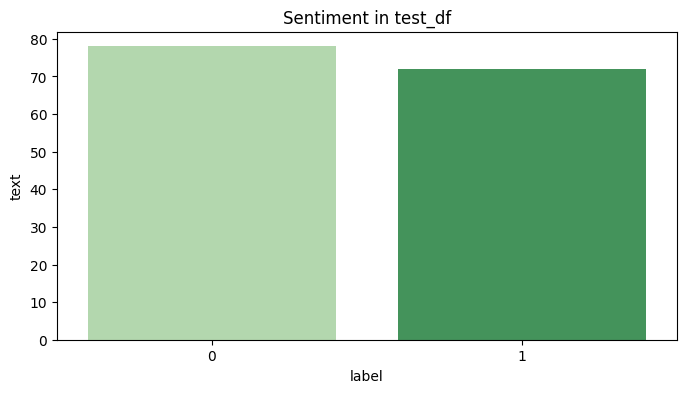

Number of each sentiment in labeled_df : 


<ipython-input-21-579cce38a68d>:7: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x='label', y='text', data=temp, palette=color)


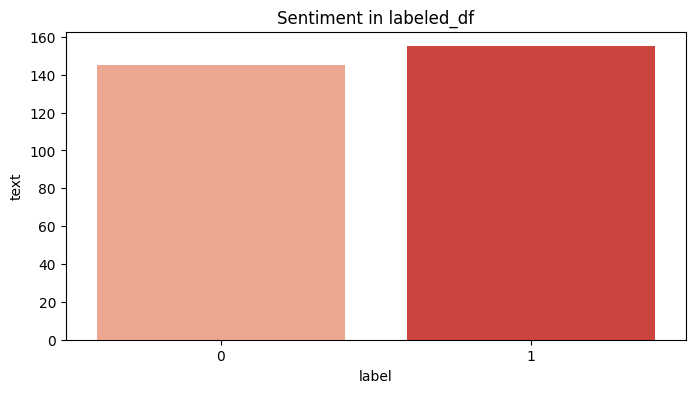

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment(df, title, color):
    temp = df.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x='label', y='text', data=temp, palette=color)
    plt.title(title)
    plt.show()

print("Number of each sentiment in train_df : ")
plot_sentiment(train_df, 'Sentiment in train_df', 'Blues')

print("Number of each sentiment in test_df : ")
plot_sentiment(test_df, 'Sentiment in test_df', 'Greens')

print("Number of each sentiment in labeled_df : ")
plot_sentiment(labeled_df, 'Sentiment in labeled_df', 'Reds')



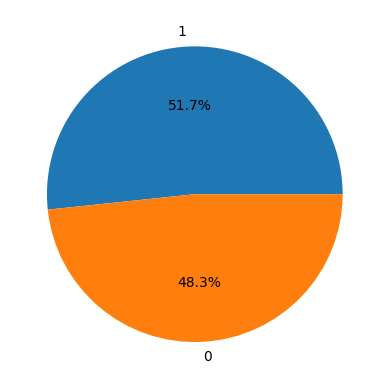

In [ ]:
plt.pie(labeled_df['label'].value_counts(), labels=labeled_df['label'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [ ]:
import plotly.graph_objects as go

# Count the number of each sentiment label
label_counts = labeled_df['label'].value_counts()

fig = go.Figure(go.Funnelarea(
    labels = label_counts.index,
    values = label_counts.values,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
))
fig.show()


# EDA

Exploratory Data Analysis

Counts and Lenght:

Start by checking how long the reviews are

Character count

Word count

Mean word length

Mean sentence length



In [ ]:
lenght = len(labeled_df['text'][0])
print(f'Length of a sample review: {lenght}')

Length of a sample review: 2


In [ ]:
train_df['Length'] = train_df['text'].str.len()
test_df['Length'] = test_df['text'].str.len()
test_df['Length'] = test_df['text'].str.len()


In [ ]:
def word_count(text):
    text_list = text.split()
    return len(text_list)

labeled_df['Word_count'] = labeled_df['text'].apply(word_count)
labeled_df.head(10)

## Mean word length: Average length of words

In [ ]:
labeled_df['mean_word_length'] = labeled_df['text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
labeled_df.head(10)

## Mean sentence length: Average length of the sentences in the review

In [ ]:
import nltk
nltk.download('punkt')


In [ ]:
import nltk.tokenize
labeled_df['mean_sent_length'] = labeled_df['text'].map(lambda rev: np.mean([len(sent) for sent in nltk.tokenize.sent_tokenize(rev)]))
labeled_df.head(10)


In [ ]:
def visualize(col):

    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=data[col], hue=data['Rating'])
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1,2,2)
    sns.kdeplot(data[col], hue=data['Rating'])
    plt.legend(data['Rating'].unique())
    plt.xlabel('')
    plt.ylabel('')

    plt.show()

#features = data.columns.tolist()[2:]
#for feature in features:
#    visualize(feature)

In [ ]:
import re

def preprocess(ReviewText):
    # Remove HTML tags
    ReviewText = ReviewText.str.replace(r'<.*?>', '', regex=True)
    # Remove special characters
    ReviewText = ReviewText.str.replace(r'&.*?;', '', regex=True)
    # Replace non-breaking space with a regular space
    ReviewText = ReviewText.str.replace(r'\xa0', ' ')
    # Convert to lowercase
    ReviewText = ReviewText.str.lower()
    # Remove any remaining punctuation
    ReviewText = ReviewText.str.replace(r'[^\w\s]', '')
    return ReviewText

labeled_df['processed_text'] = preprocess(labeled_df['text'])


<ipython-input-27-bc06151ae5bc>:16: PerformanceWarning:



DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`




## Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.

In [ ]:
from textblob import TextBlob
labeled_df['Polarity'] = labeled_df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

## Let's check most Postive, Neutral and Negative polarity reviews

In [ ]:
print('min polarity : ', labeled_df['Polarity'].min())
print('max polarity : ', labeled_df['Polarity'].max())

min polarity :  -0.5809523809523809

max polarity :  1.0


### polarity > 0.8

In [ ]:
subset = labeled_df.loc[labeled_df.Polarity == 1, ['text']]
num_samples = min(5, len(subset))
cl = subset.sample(num_samples).values
for c in cl:
    print(c[0])


beyond the excellent direction,production,acting "just listen,it leads all the way"


### polarity == 0

In [ ]:
subset = labeled_df.loc[(labeled_df.Polarity < 0.01) & (labeled_df.Polarity > -0.01), ['text']]
num_samples = min(5, len(subset))
cl = subset.sample(num_samples).values
for c in cl:
    print(c[0])



warning spoilers***** a really stupid movie about a group of young excursionists in italy that find an armor of mythical warrior with a demonic souls. one of them wears it and becomes possessed by the spirit of a demon. it's killing time and several of his friends die under his blade to revive the demon corpse.a waste of time for the viewers, as the fine young ladies in the movie leave their clothes on, the gore is ludicrous at best, and the acting is terrible, perfect pairing for such a bad script

(spoilers??)i wasn't sure what to think of the movie. not too much of a kids film. definately should be watched with a parent because it includes death and dying. but i was surprised that i was a bit entertained by it.i was a bit disappointed by the 81 minutes of time we had. (even less without the credits) and the trailer gets you to think the rodent is a main creature. but alas, they torture him. right until the end of the movie. those two gripes docked the movie 2 stars. but i do recomme

### polarity < -0.5

In [ ]:
subset = labeled_df.loc[labeled_df.Polarity < -0.5, ['text']]
num_samples = min(5, len(subset))
cl = subset.sample(num_samples).values
for c in cl:
    print(c[0])


i was looking on imdbs bottom 100 because i thought id never seen anything as bad as plan 9 from outerspace or roller ball remake, i was wrong. ben and arthur has beaten both.this out of the many countless amount of movies i've seen is the number one worst film on the i ever saw. bad directing ,bad characters ,horrible acting ,horrible story there's a reason nobody but sam ever says anything positive about this film. sam was a horrible annoying actor but his directing was so bad he may just overthrow ed wood.the director should be ashamed of his work unfortunately i have to give it at least 1 star but it deserves - to be continued stars.

this pile of sh!t is tied in my book as the worst thing ever made. i can't believe that someone actually relased this crap, let alone acually made it. horrible, horrible, horrible. not even worth mentioning the damn story or any details about it. that's how bad it actually is. avoid it like sars!

wow, a movie about nyc politics seemingly written by s

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)

    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

In [ ]:
stop_words = None
n = 20
unigrams = get_top_ngrams(labeled_df['Processed_Text'], (1, 1), stop_words, n)
bigrams = get_top_ngrams(labeled_df['Processed_Text'], (2, 2), stop_words, n)
trigrams = get_top_ngrams(labeled_df['Processed_Text'], (3, 3), stop_words, n)

In [ ]:
stop_words = 'english'
n = 20
unigrams_st = get_top_ngrams(labeled_df['Processed_Text'], (1, 1), stop_words, n)
bigrams_st = get_top_ngrams(labeled_df['Processed_Text'], (2, 2), stop_words, n)
trigrams_st = get_top_ngrams(labeled_df['Processed_Text'], (3, 3), stop_words, n)

## Unigrams Distribution

In [ ]:
colors = ['blue', 'green', 'red', 'purple', 'yellow']  # replace with your actual colors


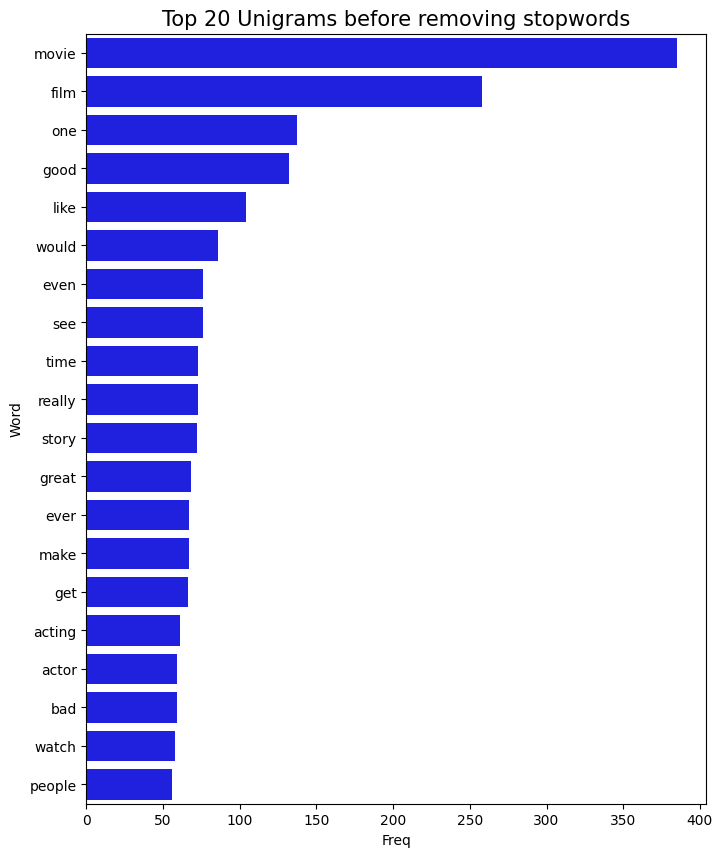

In [ ]:

plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams)
plt.title('Top 20 Unigrams before removing stopwords', size=15)
plt.show()

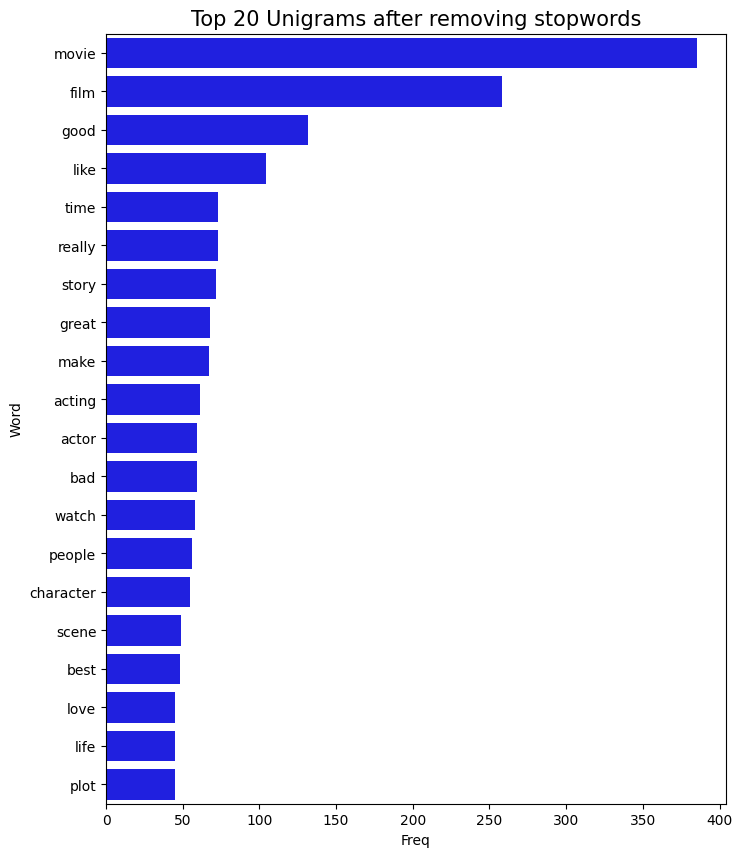

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

## Bigrams Distribution

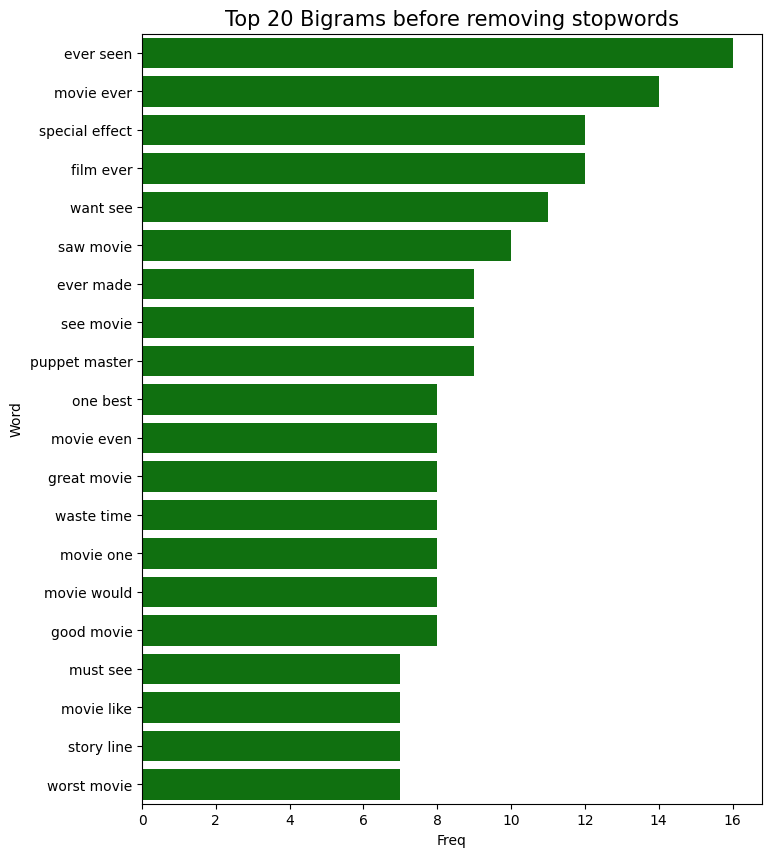

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams)
plt.title('Top 20 Bigrams before removing stopwords', size=15)
plt.show()

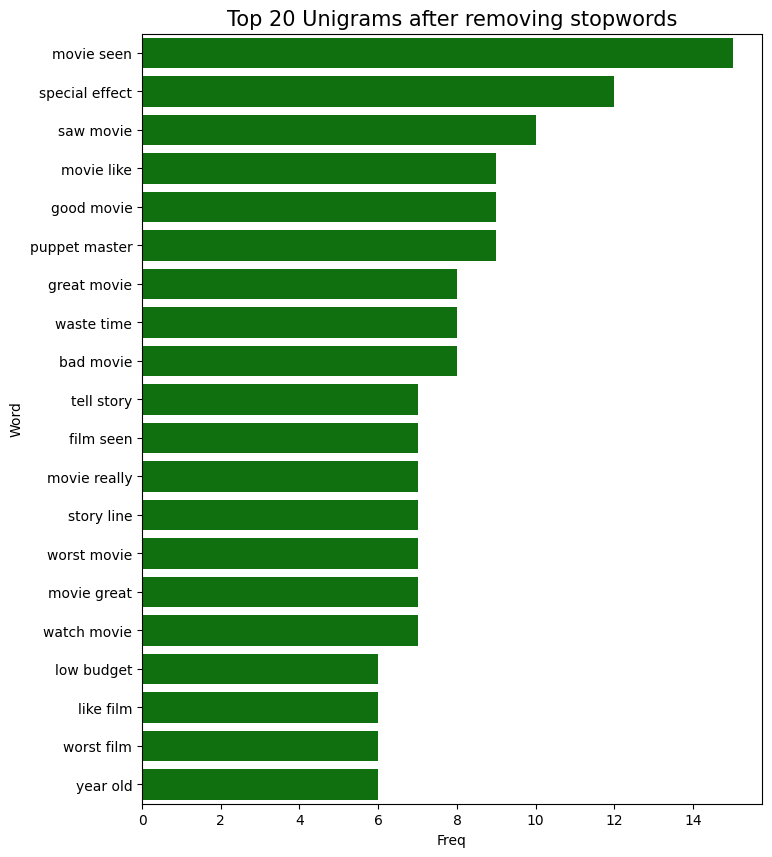

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

## Trigrams Distribution

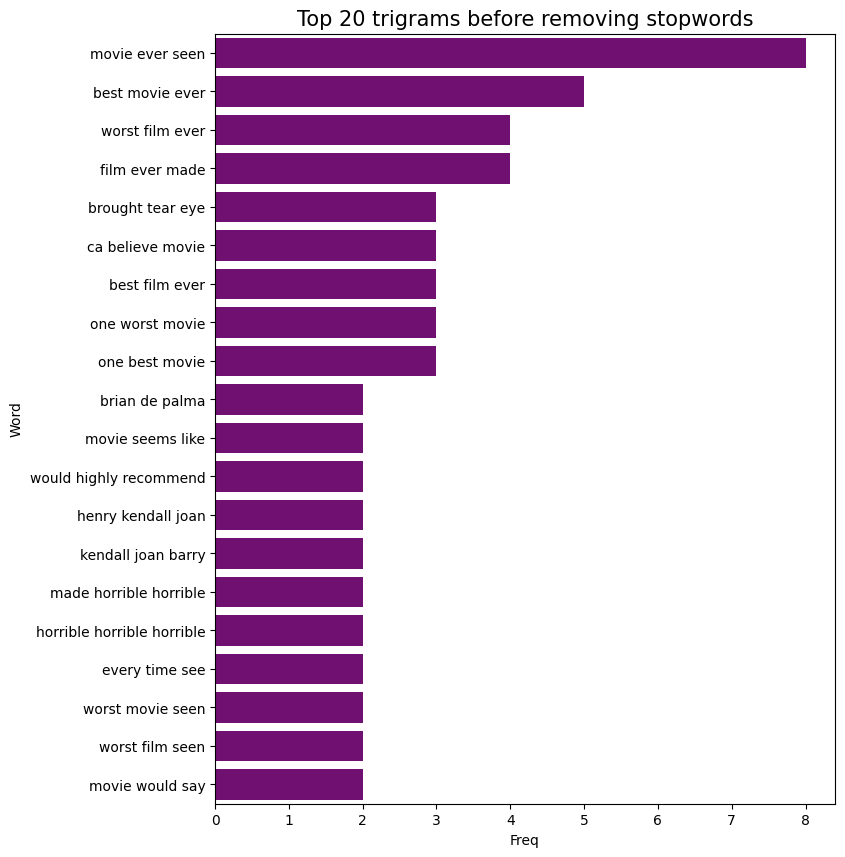

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams)
plt.title('Top 20 trigrams before removing stopwords', size=15)
plt.show()

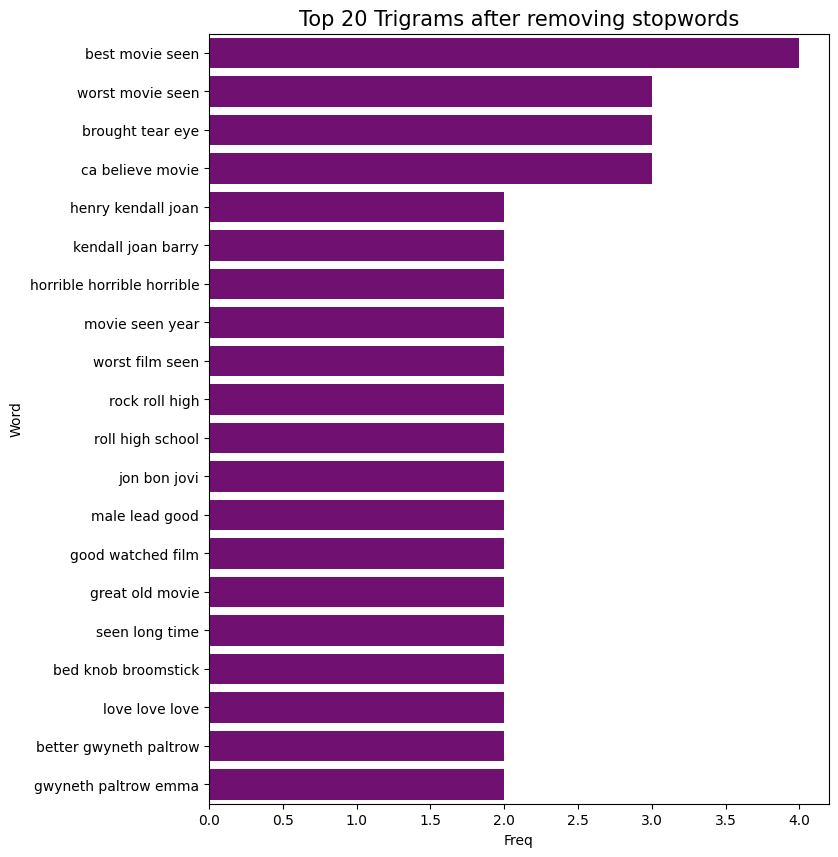

In [ ]:


plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams_st)
plt.title('Top 20 Trigrams after removing stopwords', size=15)
plt.show()

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to

[nltk_data]     /root/nltk_data...

[nltk_data]   Package averaged_perceptron_tagger is already up-to-

[nltk_data]       date!


True

In [ ]:
import re
from textblob import TextBlob
import pandas as pd

# Define a minimal preprocessing function
def minimal_preprocess(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters
    text = re.sub(r'&.*?;', '', text)
    # Replace non-breaking space with a regular space
    text = text.replace('\xa0', ' ')
    return text

# Apply minimal preprocessing to the original text
labeled_df['cleaned_text'] = labeled_df['text'].apply(minimal_preprocess)

# Perform POS tagging on the minimally cleaned text
blob = TextBlob(' '.join(labeled_df['cleaned_text']))
pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
top_pos = pos_df['pos'].value_counts()

# Display the top POS tags
print(top_pos)


<ipython-input-43-d44de19fed19>:16: PerformanceWarning:



DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`




pos

NN      5689

DT      3349

IN      2911

JJ      2651

RB      2112

NNS     1272

VBZ     1189

PRP     1173

VB      1171

CC      1050

VBD      897

VBP      783

TO       567

VBN      554

VBG      461

CD       378

PRP$     353

MD       353

WRB      181

WP       154

JJS      144

POS      140

WDT      124

RP       111

JJR       98

EX        75

RBR       64

NNP       51

PDT       41

RBS       23

UH        16

FW        15

WP$        1

Name: count, dtype: int64


The output you're seeing is a series object from the pandas library. The index of the series represents Part-of-Speech (POS) tags, and the values represent the count of each POS tag in your text data.

- `NN`: Noun, singular or mass
- `DT`: Determiner (e.g., 'the', 'this')
- `IN`: Preposition or subordinating conjunction
- `JJ`: Adjective
- `RB`: Adverb
- `NNS`: Noun, plural
- `VBZ`: Verb, 3rd person singular present
- `PRP`: Personal pronoun (e.g., 'he', 'she')
- `VB`: Verb, base form
- `CC`: Coordinating conjunction (e.g., 'and', 'or')
- `VBD`: Verb, past tense
- `VBP`: Verb, non-3rd person singular present
- `TO`: The word 'to'
- `VBN`: Verb, past participle
- `VBG`: Verb, gerund or present participle
- `CD`: Cardinal number
- `PRP$`: Possessive pronoun (e.g., 'his', 'her')
- `MD`: Modal (e.g., 'could', 'will')
- `WRB`: Wh-adverb (e.g., 'where', 'when')
- `WP`: Wh-pronoun (e.g., 'what', 'who')
- `JJS`: Adjective, superlative
- `POS`: Possessive ending (e.g., 's)
- `WDT`: Wh-determiner (e.g., 'which', 'that')
- `RP`: Particle (e.g., 'up', 'off')
- `JJR`: Adjective, comparative
- `EX`: Existential 'there'
- `RBR`: Adverb, comparative
- `NNP`: Proper noun, singular
- `PDT`: Predeterminer (e.g., 'all', 'both')
- `RBS`: Adverb, superlative
- `UH`: Interjection (e.g., 'oh', 'wow')
- `FW`: Foreign word
- `WP$`: Possessive wh-pronoun (e.g., 'whose')

The numbers represent the frequency of each POS tag in your text data. For example, `NN` appears 5689 times, `DT` appears 3349 times, and so on.

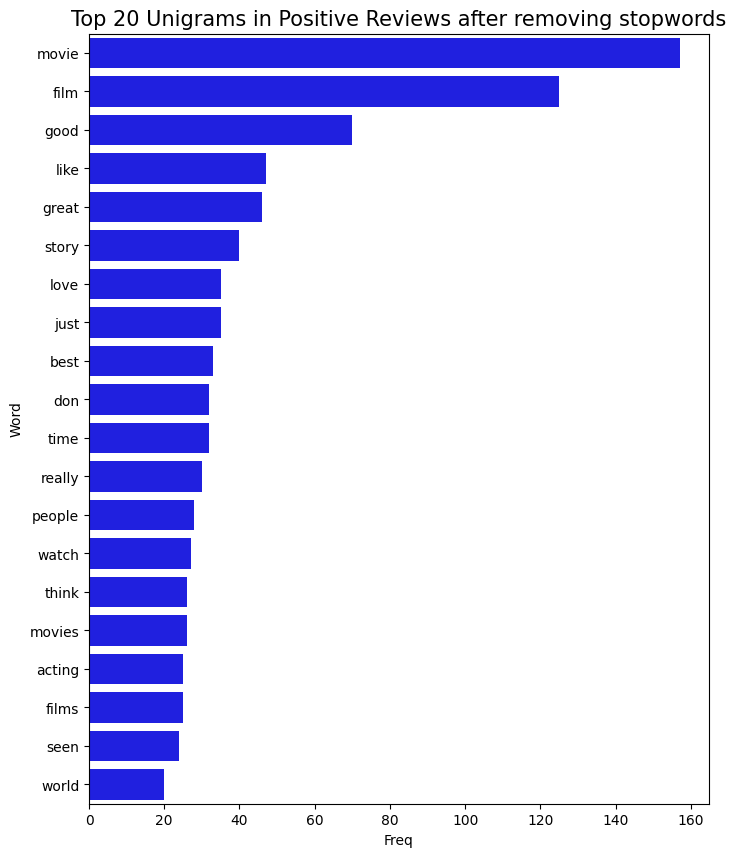

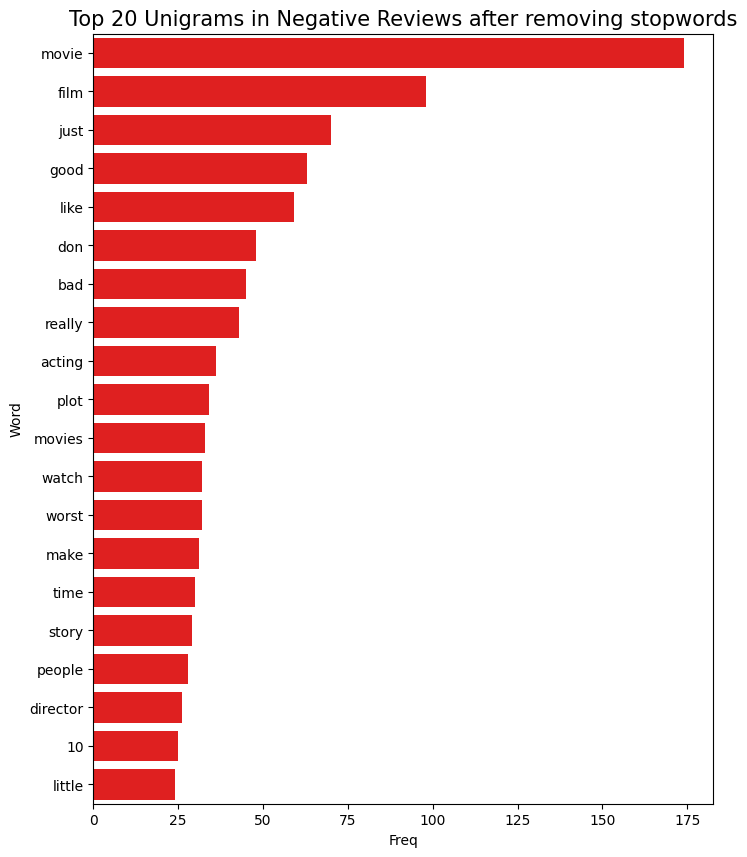

In [ ]:
# Assuming `labeled_df` has 'processed_text' column with preprocessed text
# Separate the data into positive and negative sentiments
Positive_sent = labeled_df[labeled_df['label'] == 1]
Negative_sent = labeled_df[labeled_df['label'] == 0]

# Define stop words and number of top words
stop_words = 'english'
n = 20

# Get top 20 unigrams for positive and negative reviews
positive_unigrams = get_top_ngrams(Positive_sent['processed_text'], (1, 1), stop_words, n)
negative_unigrams = get_top_ngrams(Negative_sent['processed_text'], (1, 1), stop_words, n)

# Plotting the top 20 unigrams for positive reviews
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color='blue', data=positive_unigrams)
plt.title('Top 20 Unigrams in Positive Reviews after removing stopwords', size=15)
plt.show()

# Plotting the top 20 unigrams for negative reviews
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color='red', data=negative_unigrams)
plt.title('Top 20 Unigrams in Negative Reviews after removing stopwords', size=15)
plt.show()

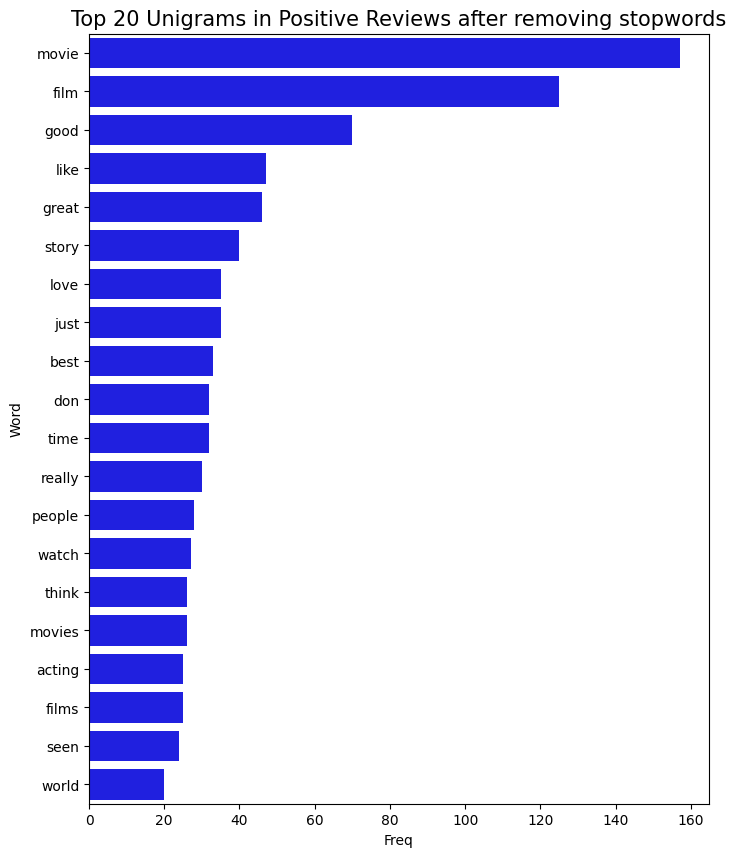

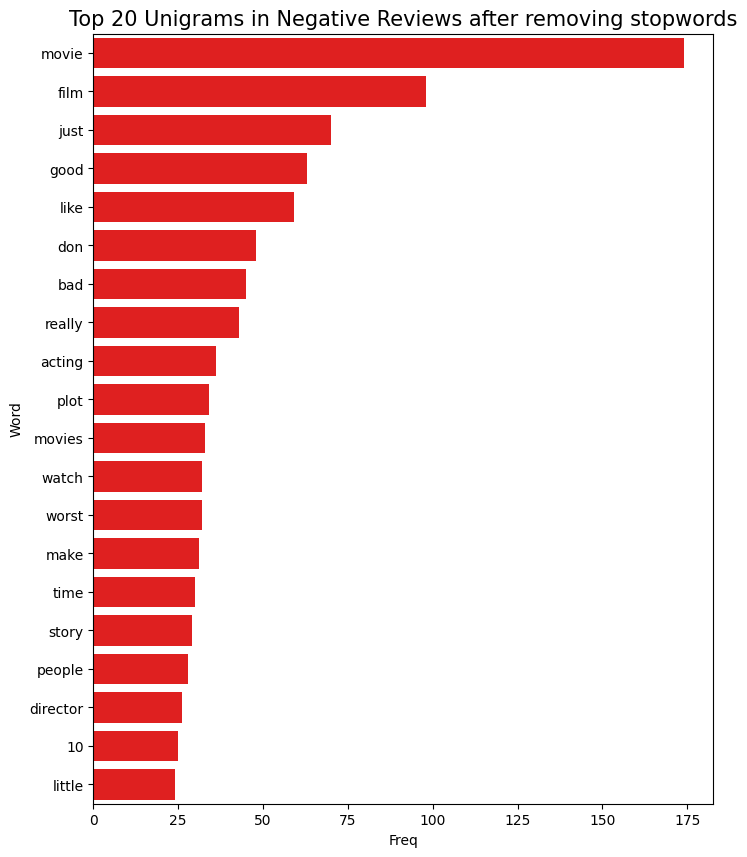

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)

    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

# Assuming `labeled_df` has 'processed_text' column with preprocessed text
# Separate the data into positive and negative sentiments
Positive_sent = labeled_df[labeled_df['label'] == 1]
Negative_sent = labeled_df[labeled_df['label'] == 0]

# Define stop words and number of top words
stop_words = 'english'
n = 20

# Get top 20 unigrams for positive and negative reviews
positive_unigrams = get_top_ngrams(Positive_sent['processed_text'], (1, 1), stop_words, n)
negative_unigrams = get_top_ngrams(Negative_sent['processed_text'], (1, 1), stop_words, n)

# Plotting the top 20 unigrams for positive reviews
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color='blue', data=positive_unigrams)
plt.title('Top 20 Unigrams in Positive Reviews after removing stopwords', size=15)
plt.show()

# Plotting the top 20 unigrams for negative reviews
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color='red', data=negative_unigrams)
plt.title('Top 20 Unigrams in Negative Reviews after removing stopwords', size=15)
plt.show()


In [ ]:
# Import the necessary libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create and display word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue').generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, size=15)
    plt.show()

# Assuming `labeled_df` has 'processed_text' column with preprocessed text
# Join the different processed texts together for all reviews
all_reviews_text = ' '.join(labeled_df['Processed_Text'].values)

# Join the different processed texts together for positive reviews
positive_reviews_text = ' '.join(labeled_df[labeled_df['label'] == 1]['Processed_Text'].values)

# Join the different processed texts together for negative reviews
negative_reviews_text = ' '.join(labeled_df[labeled_df['label'] == 0]['Processed_Text'].values)


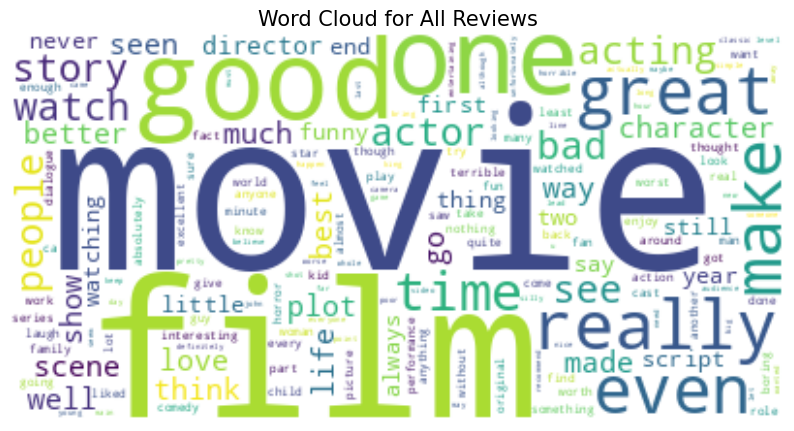

In [ ]:

# Generate and display word cloud for all reviews
generate_wordcloud(all_reviews_text, 'Word Cloud for All Reviews')

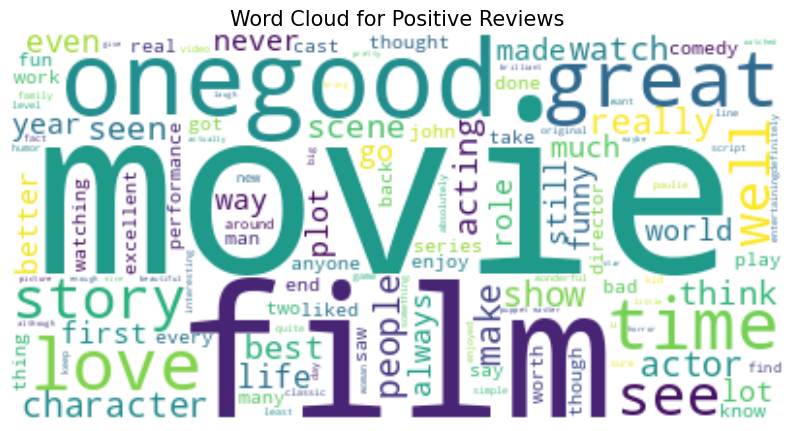

In [ ]:
# Generate and display word cloud for positive reviews
generate_wordcloud(positive_reviews_text, 'Word Cloud for Positive Reviews')

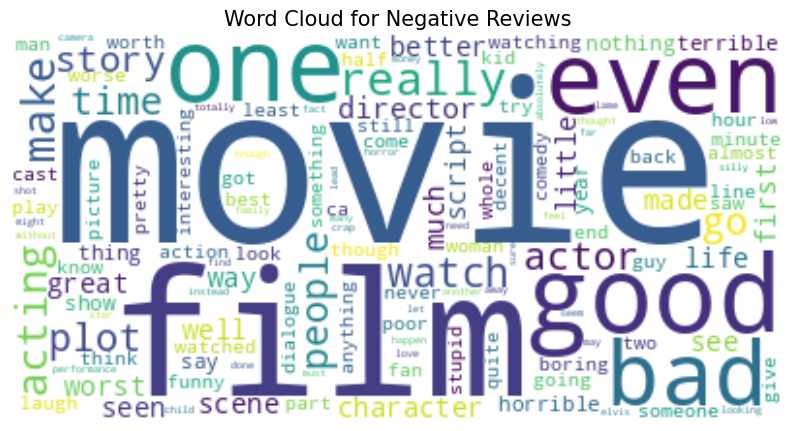

In [ ]:

# Generate and display word cloud for negative reviews
generate_wordcloud(negative_reviews_text, 'Word Cloud for Negative Reviews')

# Evaluate Topic Models: Latent Dirichlet Allocation (LDA)




In [ ]:
# Load the regular expression library
import re

# Remove punctuation
labeled_df['labeled_text_processed'] = labeled_df['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
labeled_df['labeled_text_processed'] = labeled_df['labeled_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
labeled_df['labeled_text_processed'].head()

<ipython-input-50-2911475bba48>:5: PerformanceWarning:



DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`




0    fairly good romantic comedy in which i don't t...
1    "dressed to kill" is one of the best thrillers...
2    i'm glad that users (as of this date) who like...
3    needed an excuse to get out of the house while...
4    john candy's performance in once upon a crime ...
Name: labeled_text_processed, dtype: object

In [ ]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = labeled_df.labeled_text_processed.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['fairly', 'good', 'romantic', 'comedy', 'in', 'which', 'don', 'think', 've', 'ever', 'seen', 'meg', 'looking', 'any', 'cuter', 'all', 'the', 'players', 'did', 'good', 'job', 'at', 'keeping', 'this', 'lively', 'romp', 'of', 'course', 'in', 'the']


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
!python -m spacy download en_core_web_sm
import spacy

# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.8 MB/s eta 0:00:00




































✔ Download and installation successful

You can now load the package via spacy.load('en_core_web_sm')

⚠ Restart to reload dependencies

If you are in a Jupyter or Colab notebook, you may need to restart Python in

order to load all the package's dependencies. You can do this by selecting the

'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['fairly', 'good', 'romantic', 'comedy', 'think', 'ever', 'see', 'look', 'cut', 'player', 'good', 'job', 'keep', 'lively', 'course', 'real', 'world', 'genius', 'even', 'glance', 'romantic', 'comediesone', 'totally', 'forget', 'reality', 'good', 'time', 'nice', 'film']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]


In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,

  '0.019*"film" + 0.012*"well" + 0.008*"get" + 0.008*"movie" + 0.008*"even" + '

  '0.006*"talk" + 0.006*"little" + 0.006*"ever" + 0.006*"minute" + '

  '0.005*"try"'),

 (1,

  '0.035*"film" + 0.013*"make" + 0.011*"see" + 0.011*"watch" + 0.009*"good" + '

  '0.008*"show" + 0.007*"movie" + 0.007*"get" + 0.007*"really" + 0.006*"ever"'),

 (2,

  '0.018*"movie" + 0.016*"film" + 0.014*"good" + 0.009*"really" + '

  '0.008*"story" + 0.008*"picture" + 0.007*"director" + 0.007*"do" + '

  '0.006*"go" + 0.006*"time"'),

 (3,

  '0.013*"people" + 0.011*"film" + 0.008*"drive" + 0.007*"see" + 0.006*"well" '

  '+ 0.006*"minute" + 0.006*"shoot" + 0.006*"paulie" + 0.005*"look" + '

  '0.005*"understand"'),

 (4,

  '0.058*"movie" + 0.020*"see" + 0.019*"good" + 0.019*"bad" + 0.015*"film" + '

  '0.010*"go" + 0.010*"well" + 0.009*"get" + 0.009*"great" + 0.009*"make"'),

 (5,

  '0.034*"film" + 0.017*"movie" + 0.011*"director" + 0.011*"make" + '

  '0.009*"see" + 0.008*"get" + 0.008*"story" + 0

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.28935411439318326


In [ ]:
from gensim.models import CoherenceModel, LdaMulticore
import multiprocessing

def compute_coherence_values(corpus, dictionary, k, a, b, workers=None):
    """
    Compute coherence values for the given parameters using LDA Multicore model.

    Parameters:
    - corpus: Corpus for LDA
    - dictionary: Dictionary for LDA
    - k: Number of topics
    - a: Alpha parameter
    - b: Beta parameter
    - texts: Preprocessed texts for CoherenceModel
    - workers: Number of worker threads (None uses all available cores)

    Returns:
    - coherence: Coherence score
    """
    # Set the number of workers (None will use all available cores)
    if workers is None:
        workers = multiprocessing.cpu_count()

    lda_model = LdaMulticore(corpus=corpus,
                             id2word=dictionary,
                             num_topics=k,
                             random_state=100,
                             chunksize=100,  # Adjust as needed
                             passes=10,
                             alpha=a,
                             eta=b,
                             workers=workers)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()

    return coherence


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 50
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)),
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))

    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word,
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)

                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/My Drive/DS7/lda_tuning_results_50.csv', index=False)
    pbar.close()



 49%|████▉     | 1415/2880 [1:23:26<1:26:23,  3.54s/it]



  0%|          | 1/2880 [00:01<1:20:51,  1.68s/it]

  0%|          | 2/2880 [00:03<1:20:28,  1.68s/it]

  0%|          | 3/2880 [00:04<1:14:37,  1.56s/it]

  0%|          | 4/2880 [00:06<1:13:40,  1.54s/it]

  0%|          | 5/2880 [00:07<1:11:50,  1.50s/it]

  0%|          | 6/2880 [00:09<1:24:24,  1.76s/it]

  0%|          | 7/2880 [00:13<1:48:49,  2.27s/it]Exception ignored in: Exception ignored in: <function _after_fork at 0x7daa862adb40>

<function _after_fork at 0x7daa862adb40>

Traceback (most recent call last):

  File "/usr/lib/python3.10/threading.py", line 1622, in _after_fork

Traceback (most recent call last):

      File "/usr/lib/python3.10/threading.py", line 1635, in _after_fork

    threads.update(_dangling)thread._reset_internal_locks(False)



  File "/usr/lib/python3.10/_weakrefset.py", line 66, in __iter__

KeyboardInterrupt    : item = itemref()



KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the CSV content is saved in a file called 'coherence_scores.csv'
# Read the CSV file
df = pd.read_csv('/content/drive/My Drive/DS/CA7/lda_tuning_results_50.csv')

# Group by the number of topics and calculate the average coherence score
average_coherence = df.groupby('Topics')['Coherence'].mean().reset_index()

# Plot the average coherence score for each number of topics
plt.figure(figsize=(10, 6))
plt.plot(average_coherence['Topics'], average_coherence['Coherence'], marker='o')
plt.title('Average Coherence Score by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Average Coherence Score')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/MyDrive/CA7/"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

/content/drive/MyDrive/CA7

data  reduced_data_standard.csv  test.csv  train_df.csv  unlabeled.csv


In [ ]:
# Load data
folder_path_train = 'data/train_imdb.jsonl'
folder_path_test = 'data/test_imdb.jsonl'
folder_path_aug = 'data/aug_imdb_unlabeled.jsonl'
train_df = pd.read_json(folder_path_train, lines=True)
test_df = pd.read_json(folder_path_test, lines=True)
unlabeled_df = pd.read_json(folder_path_aug, lines=True)


In [ ]:
test_df

text  label  \
0    the 60s (1999) d: mark piznarski. josh hamilto...      0   
1    hello. this movie is.......well.......okay. ju...      1   
2    eyeliner was worn nearly 6000 years ago in egy...      1   
3    this has to be, by far, the absolute worst mov...      0   
4    i like silent films, but this was a little too...      0   
..                                                 ...    ...   
145  i thought this movie would be dumb, but i real...      1   
146  the lowest score possible is one star? that's ...      0   
147  this is a gory mess and pretty convincing. cor...      1   
148  i saw this director's "woman on the beach" and...      0   
149  i loved this film, seen this evening on a movi...      1   

                                             embedding  
0    [-0.2179879397, -0.1741176099, 0.0884851664000...  
1    [-0.07834710930000001, -0.279764235, 0.6189775...  
2    [0.03139963, -0.1652034372, 0.1265712678, -0.0...  
3    [-0.0552324504, -0.1593759954, 0.0467776954, -...  
4    [0.0934860557, 0.026243483600000003, 0.0843501...  
..                                                 ...  
145  [0.0546237975, -0.1252711564, 0.1878566593, 0....  
146  [0.0383848324, -0.0083153984, 0.1836582273, 0....  
147  [-0.055631727000000006, 0.0196654834, 0.460143...  
148  [-0.037742704200000005, -0.008660635, 0.067713...  
149  [-0.12355051930000001, -0.025290058900000002, ...  

[150 rows x 3 columns]

In [ ]:
def expand_and_concat_embeddings(df, drop_original=True):
    """
    Expands the 'embedding' column in a DataFrame, concatenates the expanded columns to the original DataFrame,
    and optionally drops the original 'embedding' column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame with an 'embedding' column.
    - drop_original (bool): Whether to drop the original 'embedding' column. Default is True.

    Returns:
    - pd.DataFrame: The modified DataFrame with expanded embedding columns.
    """
    # Expand the 'embedding' column into multiple columns
    embeddings_df = pd.DataFrame(df['embedding'].to_list())

    # Rename the columns
    embeddings_df.columns = [f'embedding_{i}' for i in range(embeddings_df.shape[1])]

    # Concatenate the expanded embeddings with the original DataFrame
    df = pd.concat([df, embeddings_df], axis=1)

    # Optionally drop the original 'embedding' column
    if drop_original:
        df = df.drop('embedding', axis=1)

    return df


In [ ]:
train_df = expand_and_concat_embeddings(train_df)
test_df = expand_and_concat_embeddings(test_df)
unlabeled_df = expand_and_concat_embeddings(unlabeled_df)


In [ ]:
train_df.head()

text  label  embedding_0  \
0  fairly good romantic comedy in which i don't t...      1    -0.016781   
1  "dressed to kill", is one of the best thriller...      1    -0.125270   
2  i'm glad that users (as of this date) who like...      1     0.131236   
3  needed an excuse to get out of the house while...      0     0.138738   
4  john candy's performance in once upon a crime ...      1     0.160647   

   embedding_1  embedding_2  embedding_3  embedding_4  embedding_5  \
0    -0.039584     0.123316    -0.112681     0.147103     0.022566   
1     0.101477     0.171829    -0.150420     0.494087    -0.016729   
2     0.029488     0.232855    -0.002422     0.081981    -0.063562   
3     0.046038     0.344717    -0.042892     0.225556    -0.144981   
4    -0.176819     0.356338    -0.119723     0.257010    -0.037752   

   embedding_6  embedding_7  ...  embedding_758  embedding_759  embedding_760  \
0     0.053462     0.613809  ...      -0.044090      -0.195328       0.035722   
1    -0.013425     0.205318  ...      -0.124974      -0.187593       0.028957   
2     0.132140     0.502777  ...      -0.149487      -0.165477       0.012854   
3     0.023403     0.574083  ...      -0.172745      -0.077552      -0.013346   
4     0.053498     0.674560  ...       0.191215      -0.103852       0.013501   

   embedding_761  embedding_762  embedding_763  embedding_764  embedding_765  \
0      -0.379844      -0.180571      -0.036396       0.114420      -0.036291   
1      -0.121169      -0.393291       0.200559       0.443822      -0.081122   
2      -0.191873      -0.312853       0.013078       0.150811      -0.169557   
3      -0.228877      -0.144858      -0.075651      -0.076263       0.022555   
4      -0.221421      -0.197348       0.124097       0.090596       0.123112   

   embedding_766  embedding_767  
0       0.421711       0.060781  
1       0.346749       0.065129  
2       0.233549       0.052898  
3       0.092200      -0.068175  
4       0.122473       0.097609  

[5 rows x 770 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract embedding columns
embedding_cols = [col for col in train_df.columns if col.startswith('embedding_')]
embeddings = train_df[embedding_cols]

# Define scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

# Scale data
scaled_data = {name: scaler.fit_transform(embeddings) for name, scaler in scalers.items()}

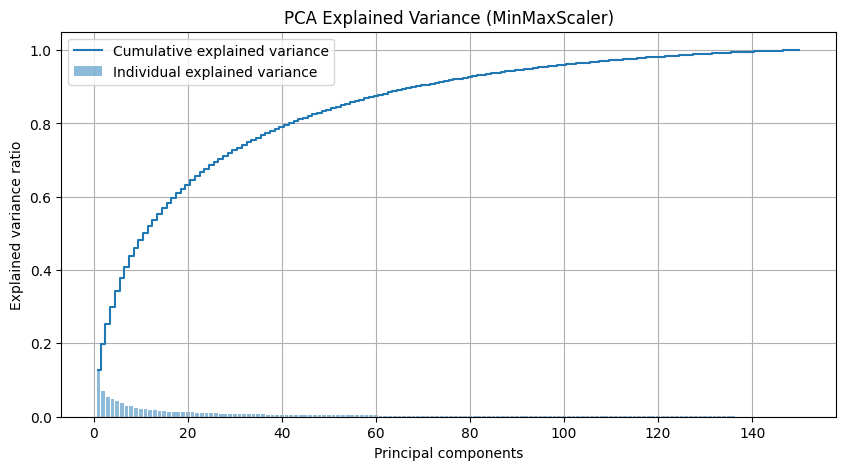

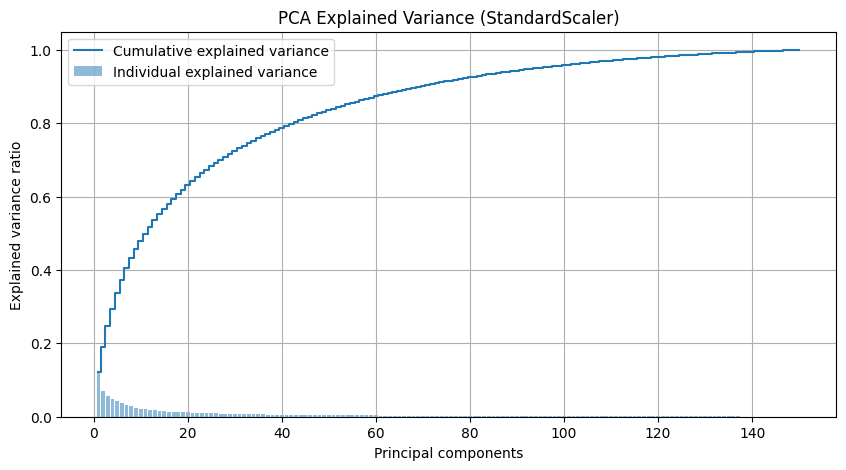

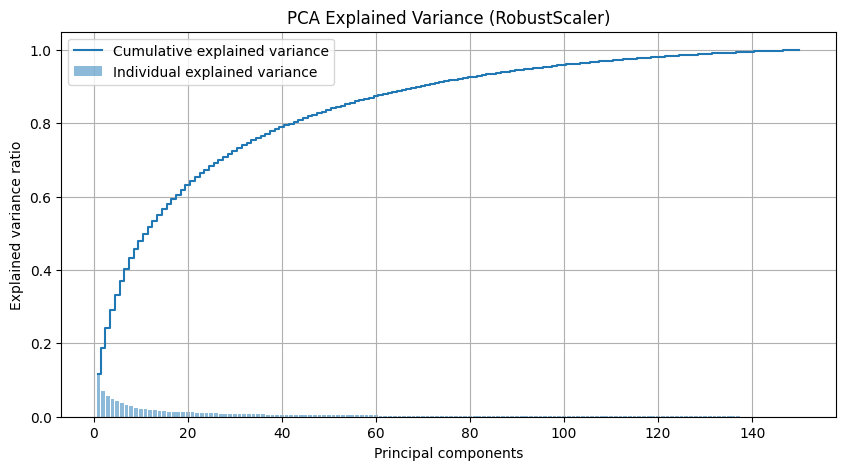

In [ ]:


# Perform PCA and plot explained variance for each scaled dataset
def plot_pca_explained_variance(scaled_data, title):
    pca = PCA()
    pca.fit(scaled_data)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)
    n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

    plt.figure(figsize=(10, 5))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot PCA for each scaled dataset
for name, data in scaled_data.items():
    plot_pca_explained_variance(data, f'PCA Explained Variance ({name})')

As you can see, there was no need for skill and all three skills are almost the same.

Now we present some dimensionality reduction tasks.

In [ ]:
def reduce_dimensions(df, n_components=40, embedding_prefix='embedding_', output_csv=None):
    """
    Reduce dimensions of embeddings using PCA.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing embeddings.
    - n_components (int): Number of principal components to retain.
    - embedding_prefix (str): Prefix for embedding columns.
    - output_csv (str): File path to save the reduced DataFrame (optional).

    Returns:
    - pd.DataFrame: DataFrame with reduced dimensions.
    """
    # Extract embedding columns
    embedding_cols = [col for col in df.columns if col.startswith(embedding_prefix)]
    embeddings = df[embedding_cols]

    # Standardize the data
    scaler = StandardScaler()
    scaled_embeddings = scaler.fit_transform(embeddings)

    # Perform PCA
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(scaled_embeddings)

    # Create a DataFrame with the reduced embeddings
    reduced_df = pd.DataFrame(reduced_embeddings, columns=[f'PC{i+1}' for i in range(n_components)])

    # Combine with the original text and label
    try:
      final_df = pd.concat([df[['text', 'label']], reduced_df], axis=1)
    except:
      final_df = pd.concat([df[['text']], reduced_df], axis=1)

    # Optionally save to CSV
    if output_csv:
        final_df.to_csv(output_csv, index=False)

    return final_df

In [ ]:
# Step 1: Combine the DataFrames
combined_df = pd.concat([train_df, unlabeled_df, test_df], axis=0, ignore_index=True)

# Step 2: Apply Dimensionality Reduction
combined_df_ld = reduce_dimensions(combined_df, n_components=55)

# Step 3: Split the Combined DataFrame
train_rows = train_df.shape[0]
unlabeled_rows = unlabeled_df.shape[0]
test_rows = test_df.shape[0]

train_df_ld = combined_df_ld.iloc[:train_rows, :].reset_index(drop=True)
unlabeled_df_ld = combined_df_ld.iloc[train_rows:train_rows + unlabeled_rows, :].reset_index(drop=True)
test_df_ld = combined_df_ld.iloc[train_rows + unlabeled_rows:, :].reset_index(drop=True)

In [ ]:
unlabeled_df_ld.head(1)

text  label      PC1  \
0  there is no relation at all between fortier an...    NaN -4.55265   

        PC2       PC3       PC4       PC5       PC6       PC7       PC8  ...  \
0  2.534787 -5.051072  5.765765  3.527414 -4.190048 -3.229839 -1.512351  ...   

     PC46      PC47      PC48      PC49      PC50      PC51      PC52  \
0 -2.3483  0.344304  0.066953 -2.406084  1.625094 -0.292497  1.559742   

       PC53      PC54      PC55  
0  0.805565  0.584099 -2.189232  

[1 rows x 57 columns]

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

class LogisticRegressionUtility:
    def prepare_training_data(train_df):
        X_train = train_df.drop(columns=['text', 'label'])
        y_train = train_df['label']
        return X_train, y_train

    def prepare_unlabeled_data(unlabeled_df):
        return unlabeled_df.drop(columns=['text'])

    def train_model(X, y):
        model = LogisticRegression(max_iter=1000)
        model.fit(X, y)
        return model

    def predict_with_confidence(model, X):
        predicted_probabilities = model.predict_proba(X)
        predicted_labels = model.predict(X)
        prediction_confidence = predicted_probabilities.max(axis=1) * 100
        return predicted_labels, prediction_confidence

    def add_predictions_to_dataframe(df, labels, confidence):
        df['predicted_label'] = labels
        df['prediction_confidence'] = confidence
        return df

    def transfer_high_confidence_rows(train_df, unlabeled_df, confidence_threshold=95):
        # Identify rows with confidence greater than the threshold
        high_confidence_mask = unlabeled_df['prediction_confidence'] > confidence_threshold

        # Extract high confidence rows
        high_confidence_rows = unlabeled_df[high_confidence_mask]

        # Add the predicted_label as 'label' column
        high_confidence_rows['label'] = high_confidence_rows['predicted_label']

        # Remove the 'predicted_label' and 'prediction_confidence' columns
        high_confidence_rows = high_confidence_rows.drop(columns=['predicted_label', 'prediction_confidence'])

        # Add the high confidence rows to train_df
        updated_train_df = pd.concat([train_df, high_confidence_rows])

        # Remove the high confidence rows from unlabeled_df
        updated_unlabeled_df = unlabeled_df[~high_confidence_mask]

        # Drop the 'predicted_label' and 'prediction_confidence' columns from updated_unlabeled_df
        updated_unlabeled_df = updated_unlabeled_df.drop(columns=['predicted_label', 'prediction_confidence'])

        return updated_train_df, updated_unlabeled_df

    def plot_prediction_confidence_distribution(df, column_name, bin_width=5):
        # Create bins of specified intervals
        bins = pd.cut(df[column_name], bins=range(0, 105, bin_width))

        # Count the number of rows in each bin
        bin_counts = bins.value_counts().sort_index()

        # Create a bar plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x=bin_counts.index.astype(str), y=bin_counts.values, palette='viridis')

        # Annotate each bar with the count of rows
        for i, count in enumerate(bin_counts.values):
            plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

        # Set plot labels and title
        plt.xlabel('Prediction Confidence (%)')
        plt.ylabel('Number of Rows')
        plt.title(f'Distribution of {column_name} in {bin_width}% Bins')
        plt.xticks(rotation=45)
        plt.show()

Here, we add the lines whose confidence percentage was greater than 95 to train and delete them from unlabeled.
We will continue this work until we have more than 99.9% label.

In [ ]:
unlabeled_df_ld = unlabeled_df_ld.drop(columns=['label'])

<ipython-input-13-b5221cfcb9ba>:64: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x=bin_counts.index.astype(str), y=bin_counts.values, palette='viridis')


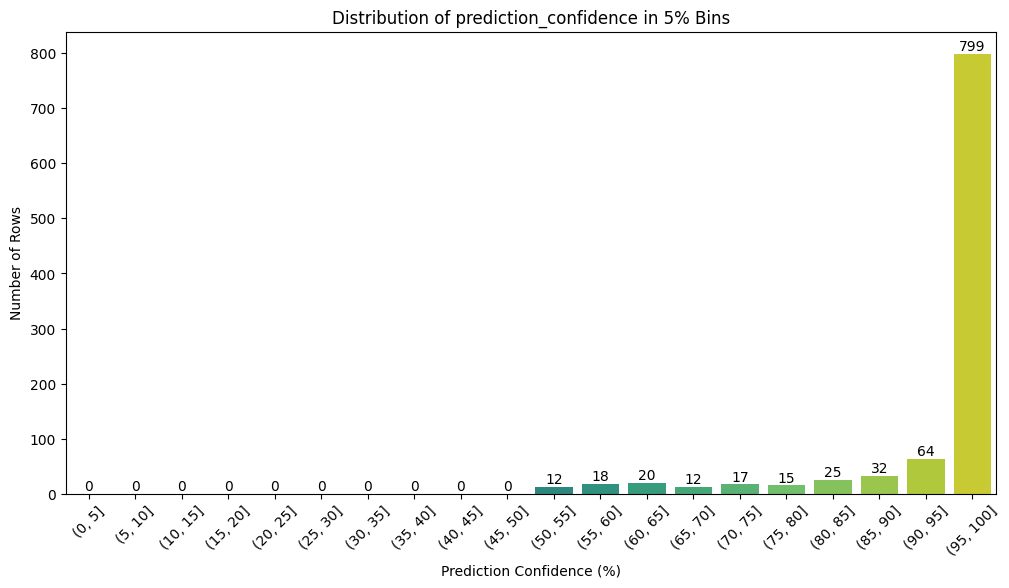

<ipython-input-13-b5221cfcb9ba>:39: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_rows['label'] = high_confidence_rows['predicted_label']

<ipython-input-13-b5221cfcb9ba>:64: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x=bin_counts.index.astype(str), y=bin_counts.values, palette='viridis')


664


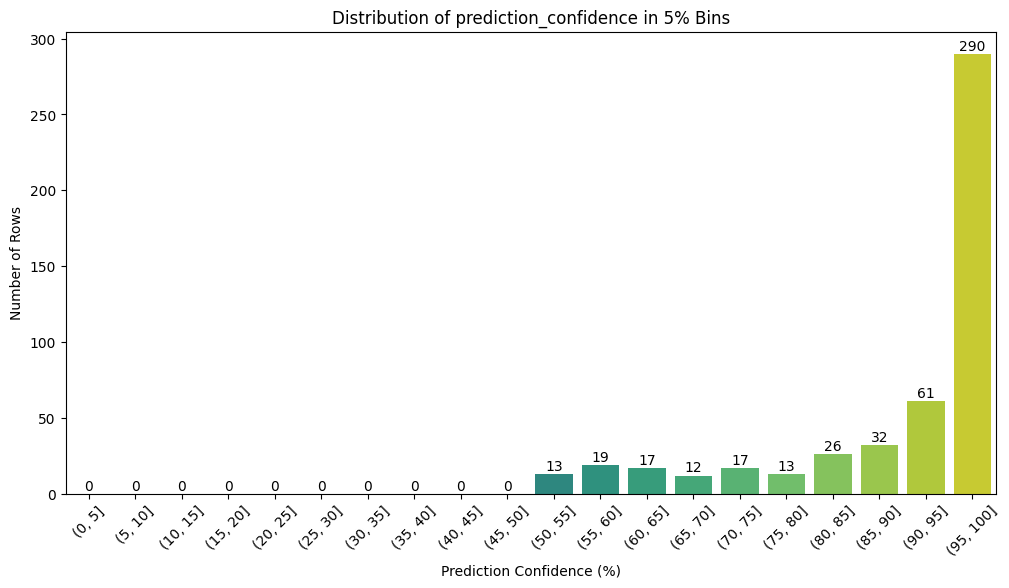

<ipython-input-13-b5221cfcb9ba>:39: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_rows['label'] = high_confidence_rows['predicted_label']

<ipython-input-13-b5221cfcb9ba>:64: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x=bin_counts.index.astype(str), y=bin_counts.values, palette='viridis')


674


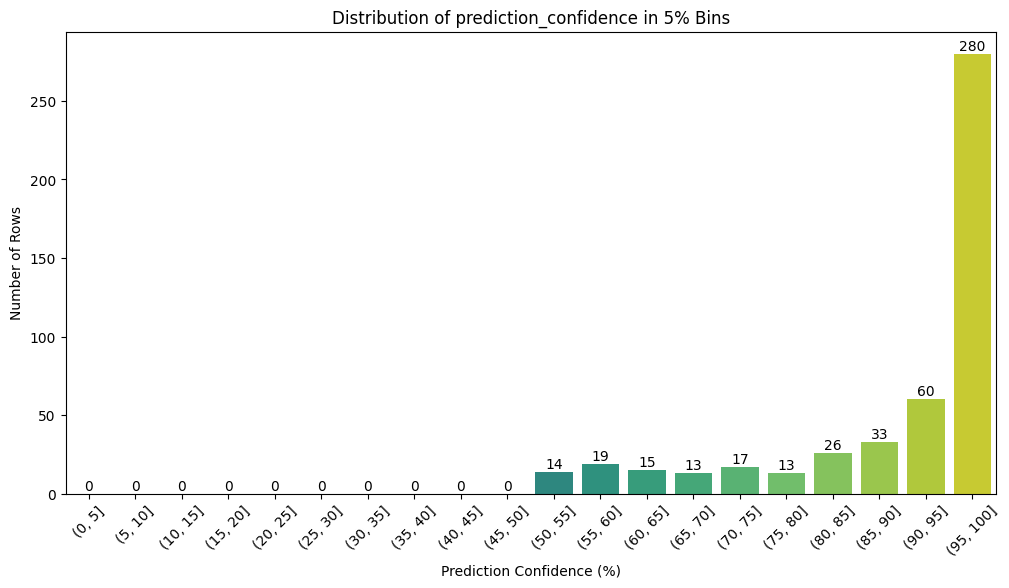

<ipython-input-13-b5221cfcb9ba>:39: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_rows['label'] = high_confidence_rows['predicted_label']

<ipython-input-13-b5221cfcb9ba>:64: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x=bin_counts.index.astype(str), y=bin_counts.values, palette='viridis')


675


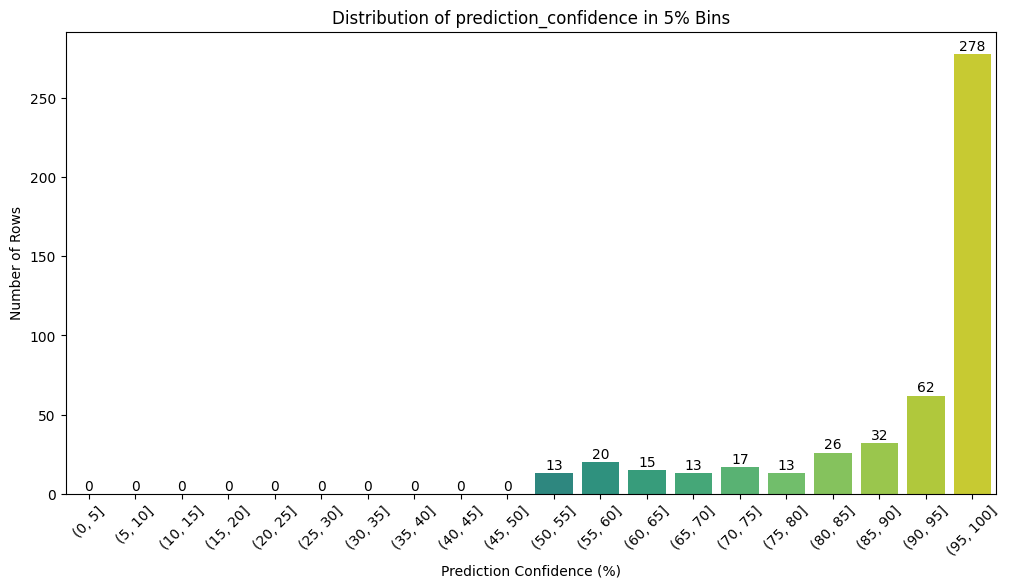

675


In [ ]:
confidence_threshold = 99.9
while(confidence_threshold > 95):
    # Prepare data
    X_train, y_train = LogisticRegressionUtility.prepare_training_data(train_df_ld)
    X_unlabeled = LogisticRegressionUtility.prepare_unlabeled_data(unlabeled_df_ld)

    # Train model
    model = LogisticRegressionUtility.train_model(X_train, y_train)

    # Predict and calculate confidence
    predicted_labels, prediction_confidence = LogisticRegressionUtility.predict_with_confidence(model, X_unlabeled)

    # Add predictions to dataframe
    unlabeled_df_ld = LogisticRegressionUtility.add_predictions_to_dataframe(unlabeled_df_ld, predicted_labels, prediction_confidence)

    # plot
    LogisticRegressionUtility.plot_prediction_confidence_distribution(unlabeled_df_ld, 'prediction_confidence')

    # Transfer high confidence rows
    before_train_df_ld_len = len(train_df_ld)
    train_df_ld, unlabeled_df_ld = LogisticRegressionUtility.transfer_high_confidence_rows(train_df_ld, unlabeled_df_ld, confidence_threshold=confidence_threshold)
    after_train_df_ld_len = len(train_df_ld)

    print(len(train_df_ld))

    if before_train_df_ld_len == after_train_df_ld_len:
        confidence_threshold -= 5

Now we augment label with random forest.

In [ ]:
unlabeled_df_ld.isnull().sum()

text    0
PC1     0
PC2     0
PC3     0
PC4     0
PC5     0
PC6     0
PC7     0
PC8     0
PC9     0
PC10    0
PC11    0
PC12    0
PC13    0
PC14    0
PC15    0
PC16    0
PC17    0
PC18    0
PC19    0
PC20    0
PC21    0
PC22    0
PC23    0
PC24    0
PC25    0
PC26    0
PC27    0
PC28    0
PC29    0
PC30    0
PC31    0
PC32    0
PC33    0
PC34    0
PC35    0
PC36    0
PC37    0
PC38    0
PC39    0
PC40    0
PC41    0
PC42    0
PC43    0
PC44    0
PC45    0
PC46    0
PC47    0
PC48    0
PC49    0
PC50    0
PC51    0
PC52    0
PC53    0
PC54    0
PC55    0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

class RandomForestUtility:
    @staticmethod
    def prepare_data(train_df_ld, unlabeled_df_ld):
        # Ensure 'confidence' and 'predicted_label' columns do not exist in unlabeled_df_ld
        if 'confidence' in unlabeled_df_ld.columns:
            unlabeled_df_ld = unlabeled_df_ld.drop(columns=['confidence'])
        if 'predicted_label' in unlabeled_df_ld.columns:
            unlabeled_df_ld = unlabeled_df_ld.drop(columns=['predicted_label'])

        X_train = train_df_ld.drop(columns=['text', 'label'])
        y_train = train_df_ld['label']

        # Features for unlabeled data (drop the text column)
        X_unlabeled = unlabeled_df_ld.drop(columns=['text'])

        return X_train, y_train, X_unlabeled, unlabeled_df_ld

    @staticmethod
    def train_model(X_train, y_train):
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)
        return rf_model

    @staticmethod
    def predict_and_add_confidence(rf_model, X_unlabeled, unlabeled_df_ld):
        predicted_labels = rf_model.predict(X_unlabeled)
        predicted_probs = rf_model.predict_proba(X_unlabeled)
        confidence = predicted_probs.max(axis=1)  # Maximum probability for each prediction

        unlabeled_df_ld['predicted_label'] = predicted_labels
        unlabeled_df_ld['confidence'] = confidence

        return unlabeled_df_ld

    @staticmethod
    def plot_confidence_intervals(unlabeled_df_ld):
        bins = np.arange(0, 1.05, 0.05)
        plt.figure(figsize=(12, 6))
        hist, bin_edges = np.histogram(unlabeled_df_ld['confidence'], bins=bins)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

        plt.bar(bin_centers, hist, width=0.05, align='center', edgecolor='black')

        for count, x in zip(hist, bin_centers):
            plt.text(x, count, str(count), ha='center', va='bottom')

        plt.xlabel('Confidence Interval')
        plt.ylabel('Number of Rows')
        plt.title('Confidence Intervals of Predicted Labels')
        plt.xticks(np.arange(0, 1.05, 0.05))
        plt.grid(axis='y')

        plt.show()

    @staticmethod
    def filter_and_update_data(unlabeled_df_ld, train_df_ld, confidence_threshold=0.70):
        high_confidence_df = unlabeled_df_ld[unlabeled_df_ld['confidence'] > confidence_threshold]
        high_confidence_df['label'] = high_confidence_df['predicted_label']
        train_df_ld = pd.concat([train_df_ld, high_confidence_df.drop(columns=['predicted_label', 'confidence'])], ignore_index=True)
        unlabeled_df_ld = unlabeled_df_ld[unlabeled_df_ld['confidence'] <= confidence_threshold]

        return train_df_ld, unlabeled_df_ld



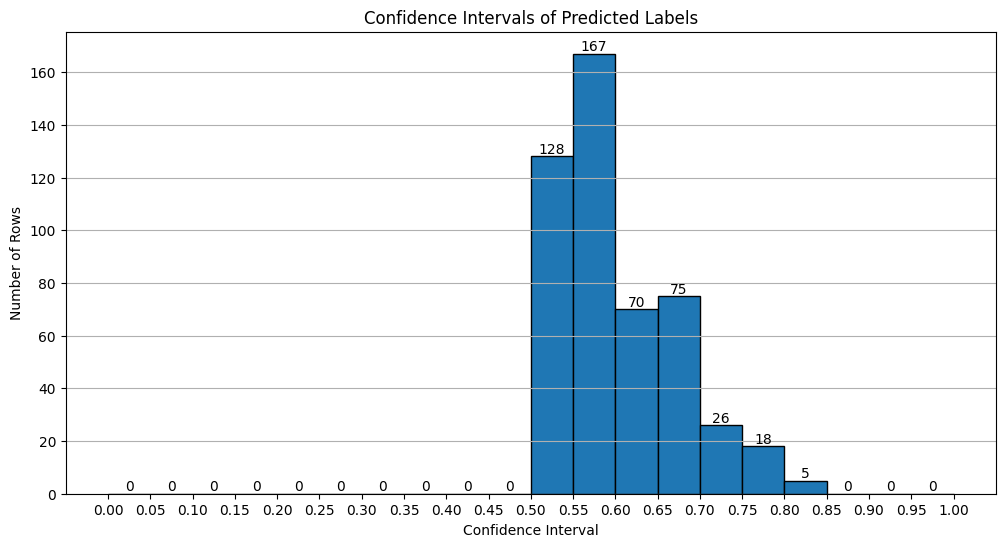

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


724


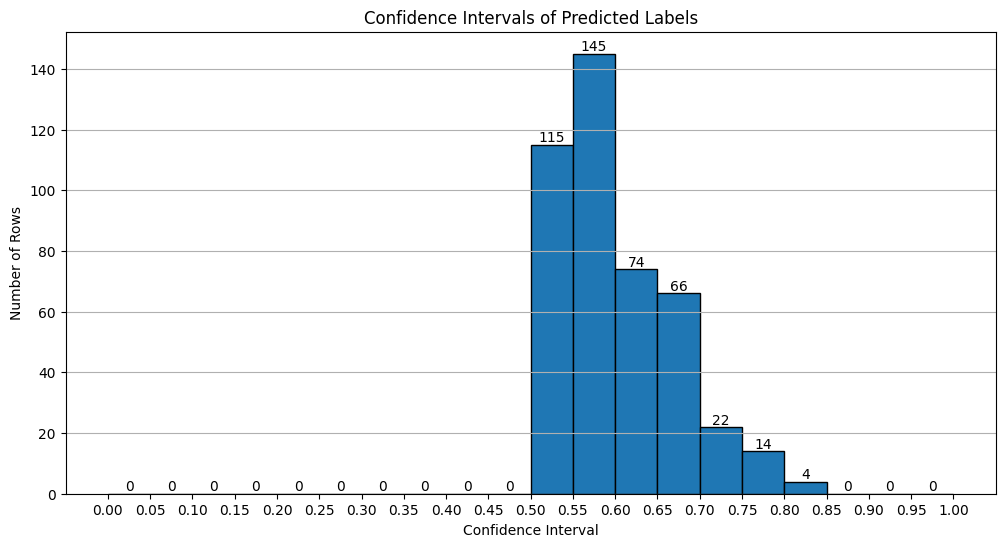

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


764


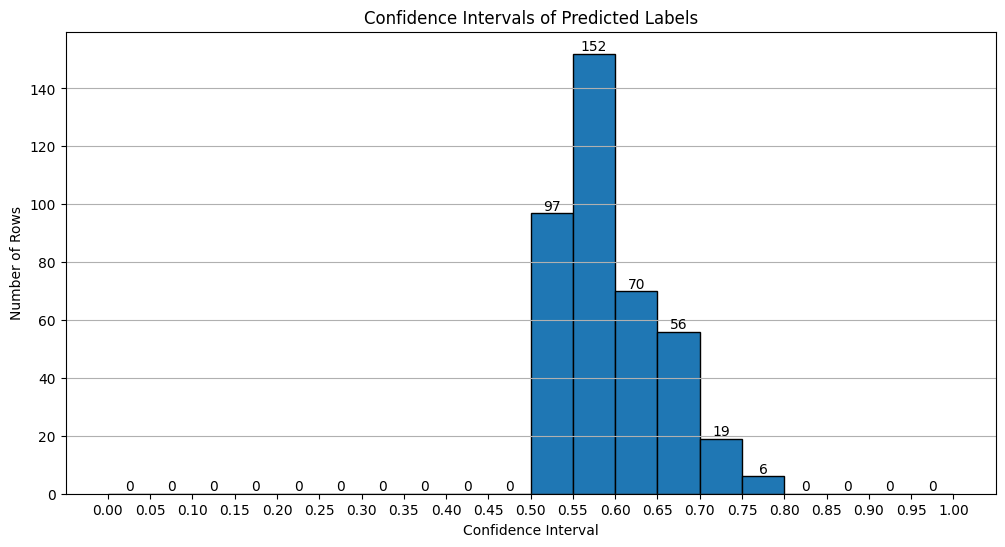

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


789


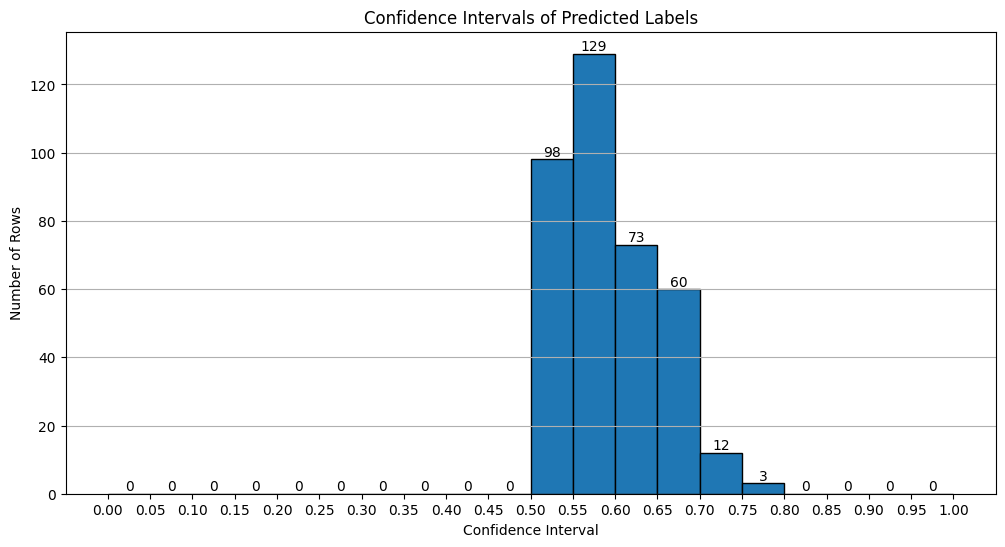

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


804


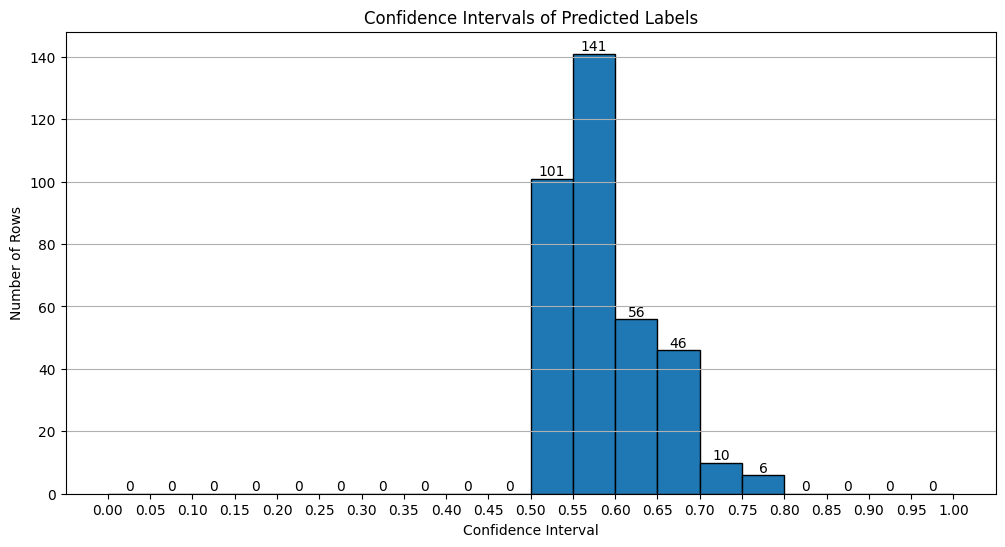

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


820


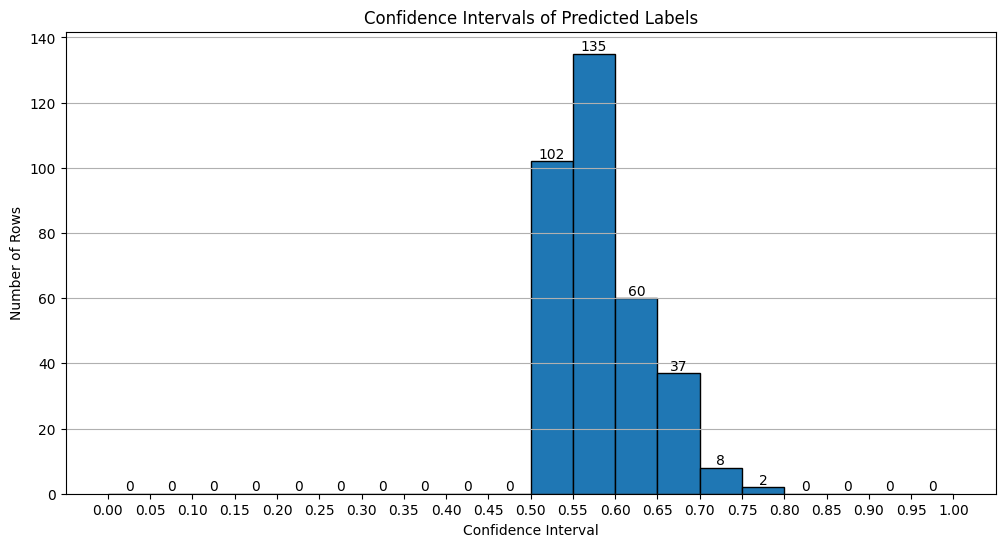

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


830


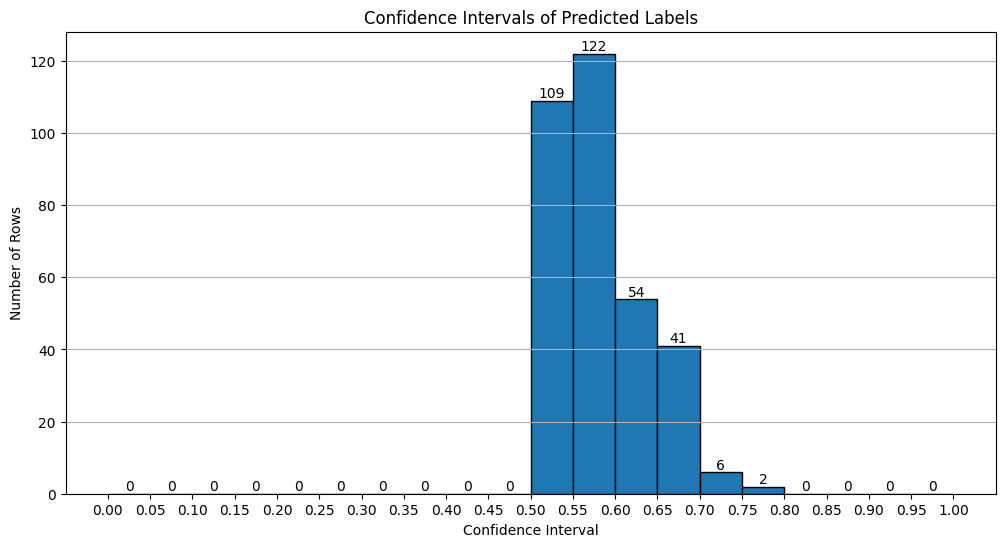

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


838


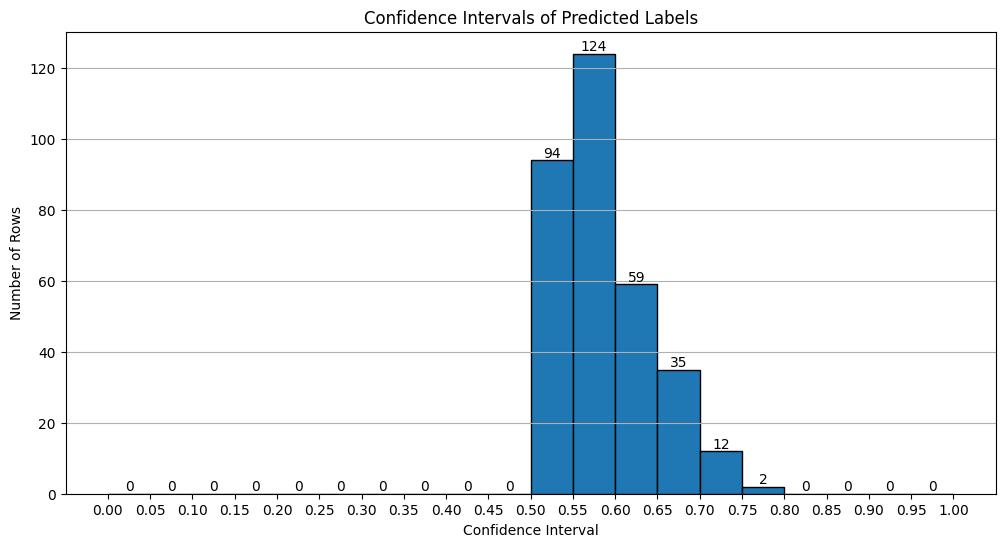

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


852


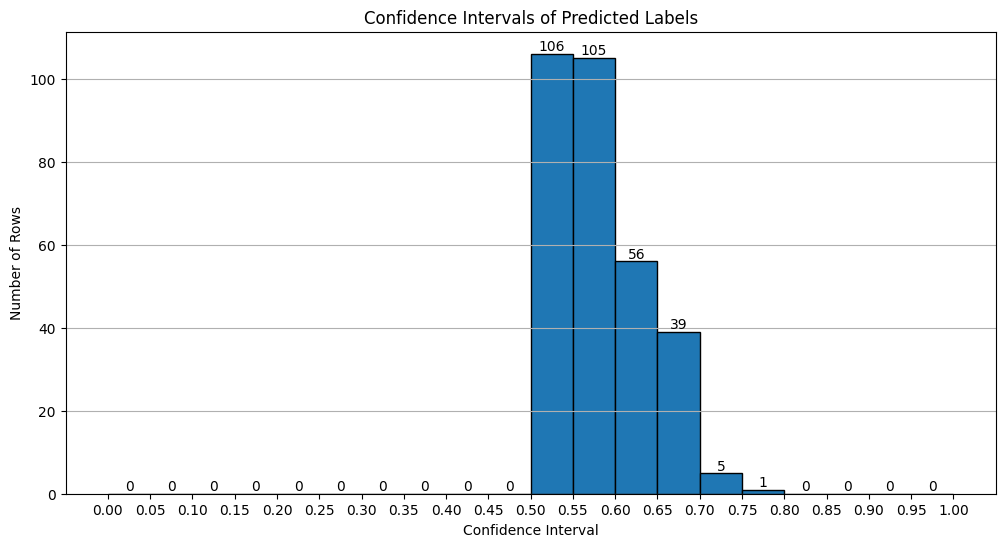

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


858


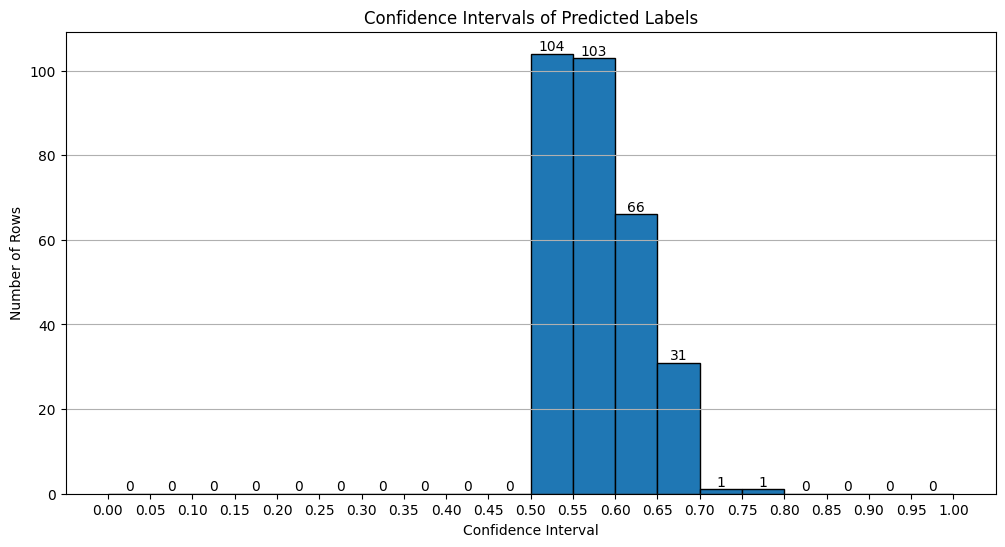

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


860


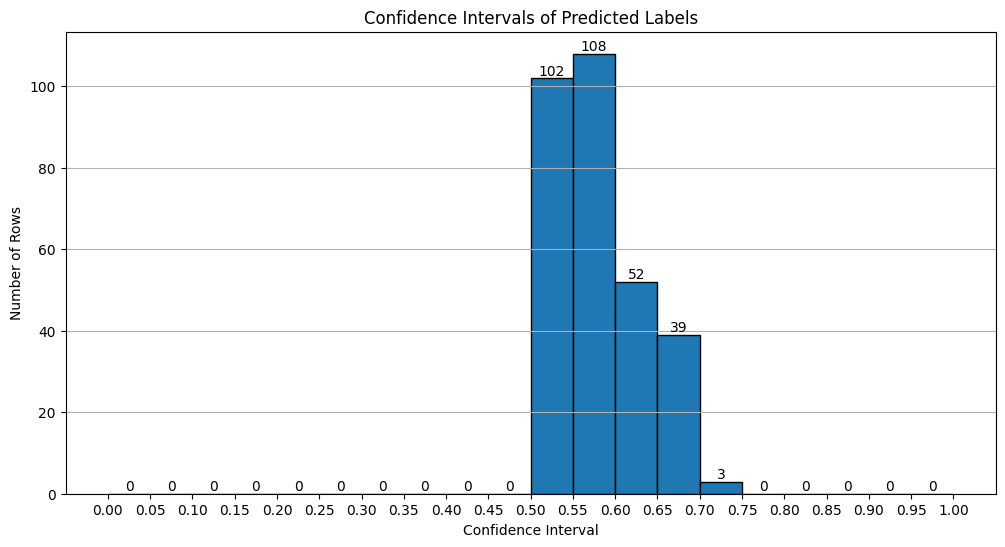

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


863


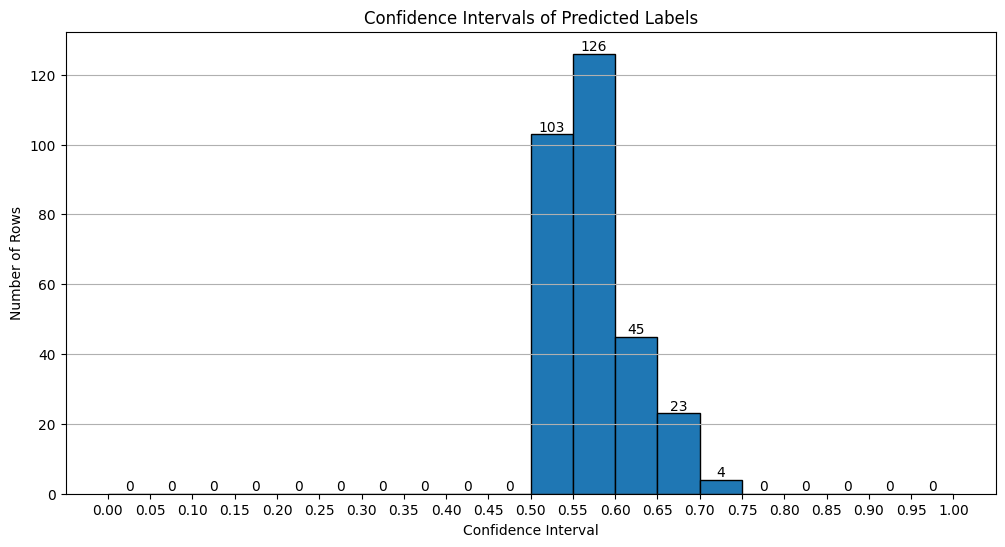

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


867


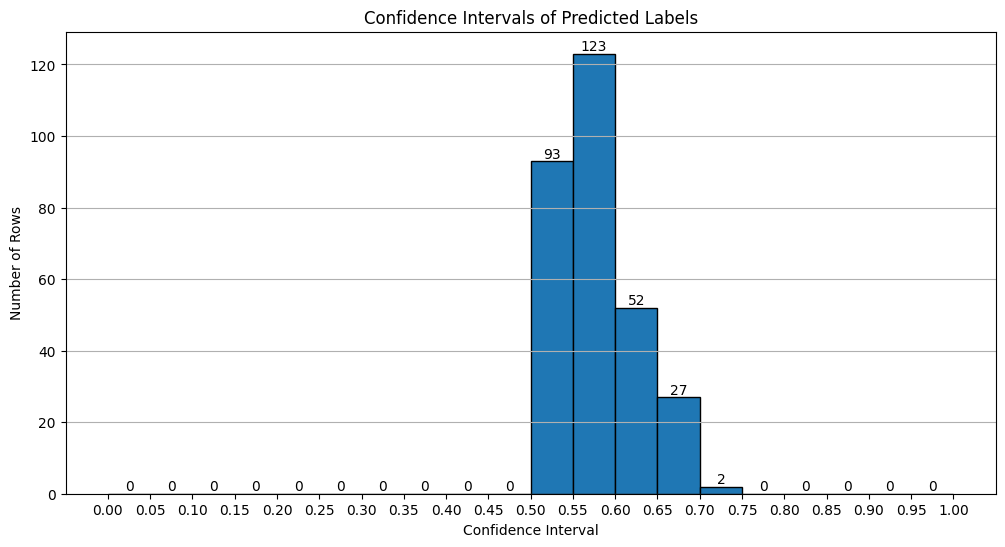

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


869


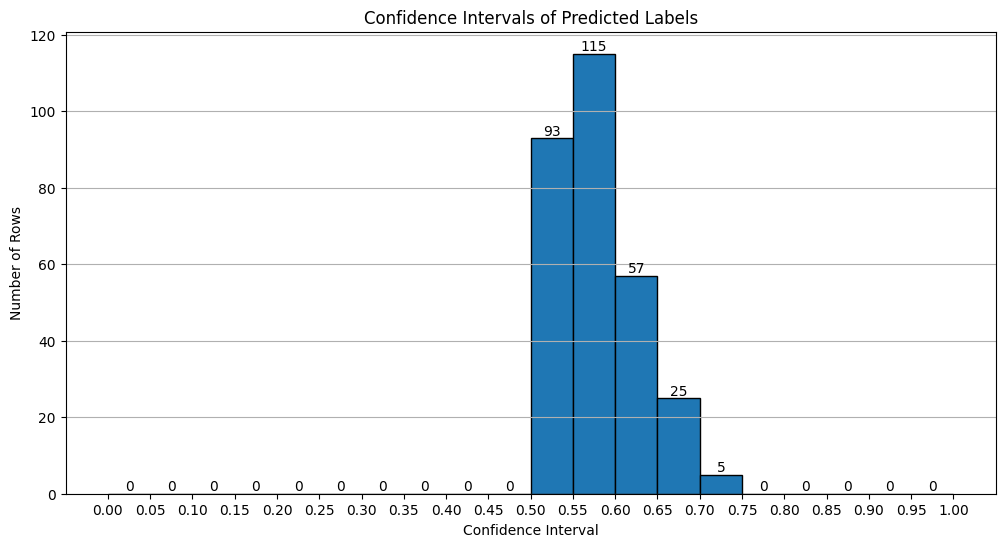

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


874


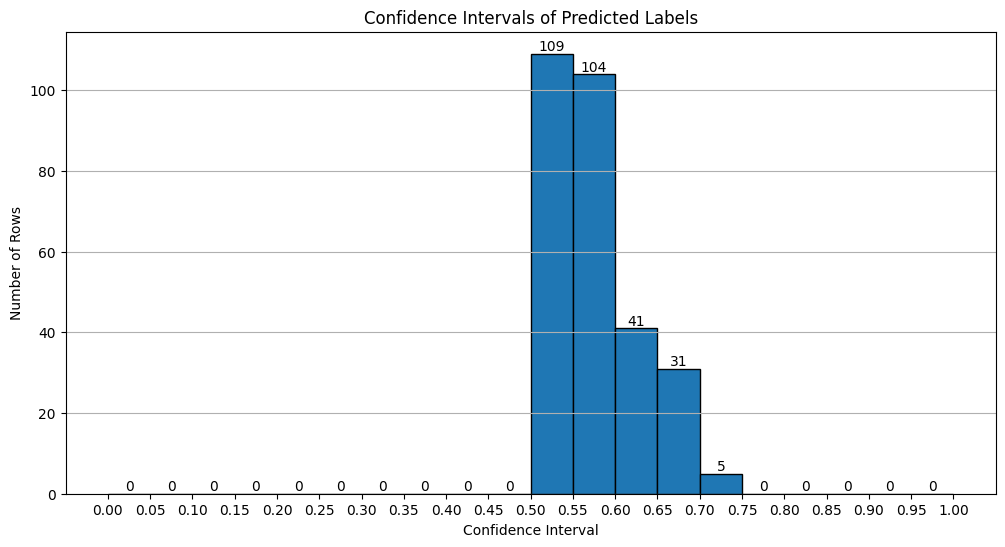

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


879


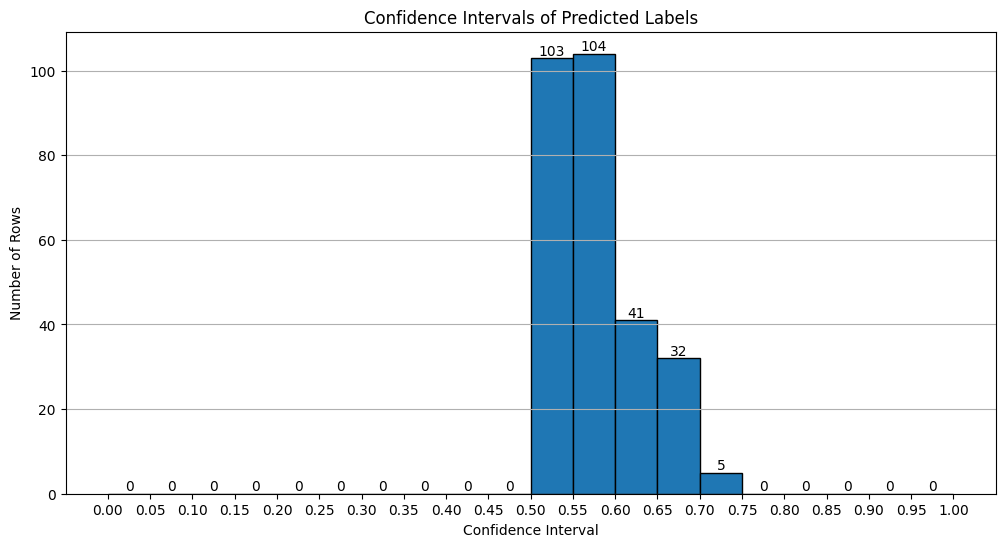

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


884


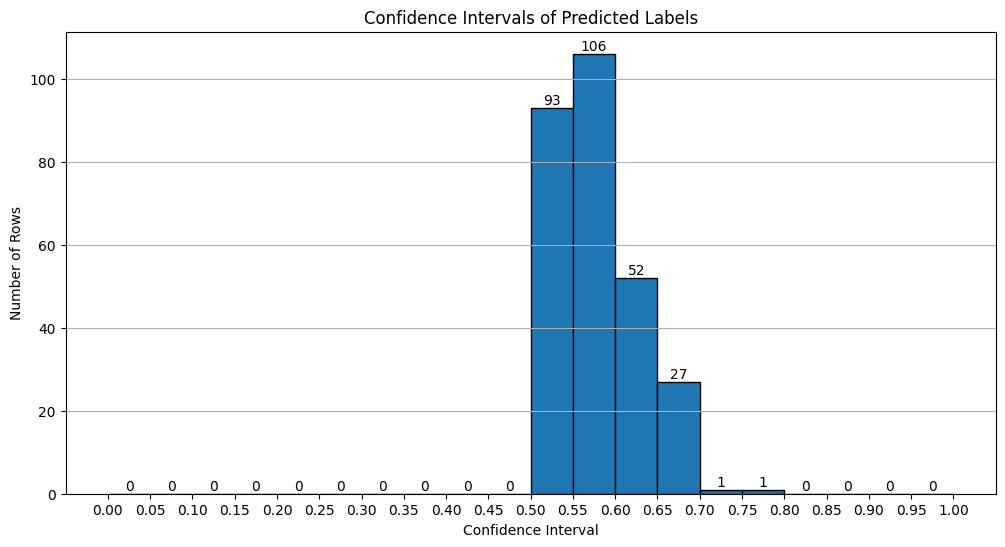

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


886


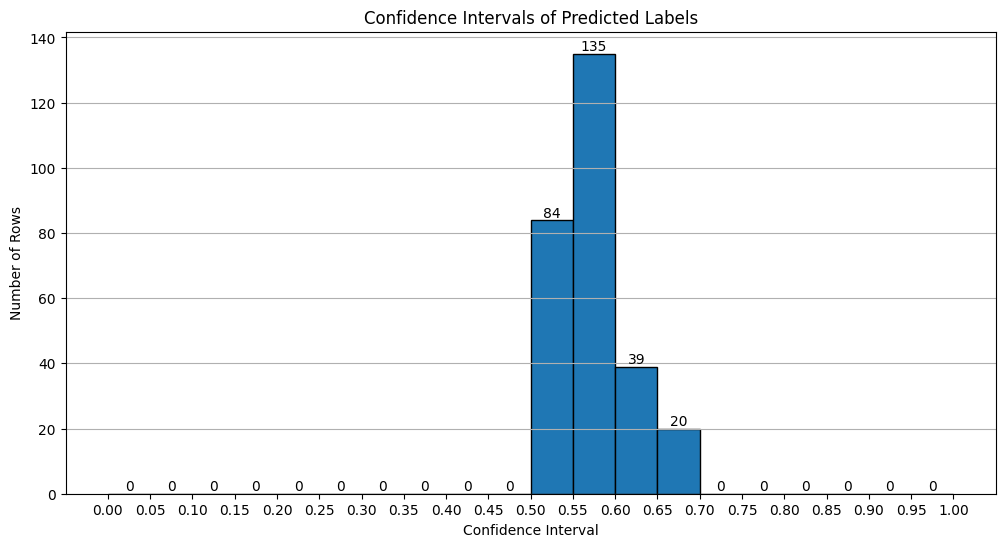

886


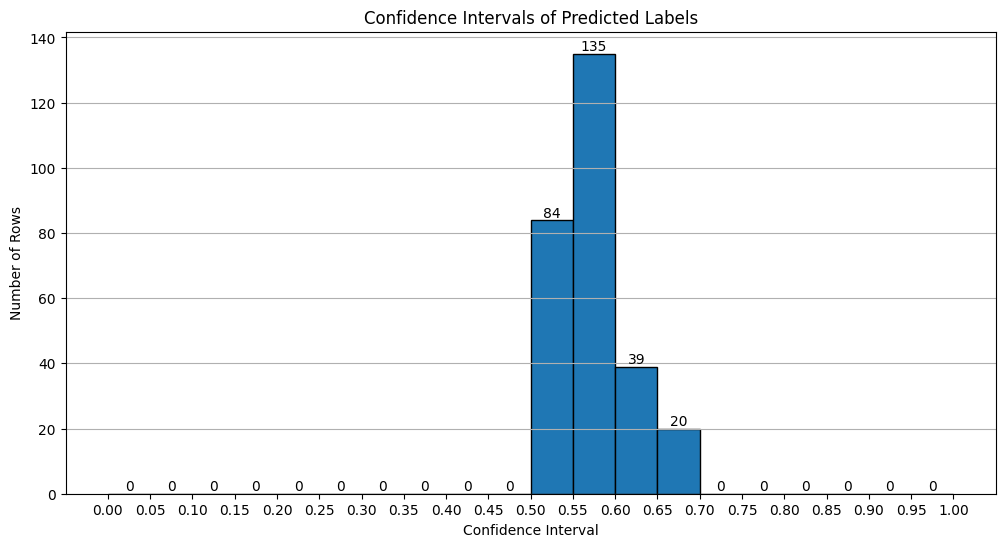

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


906


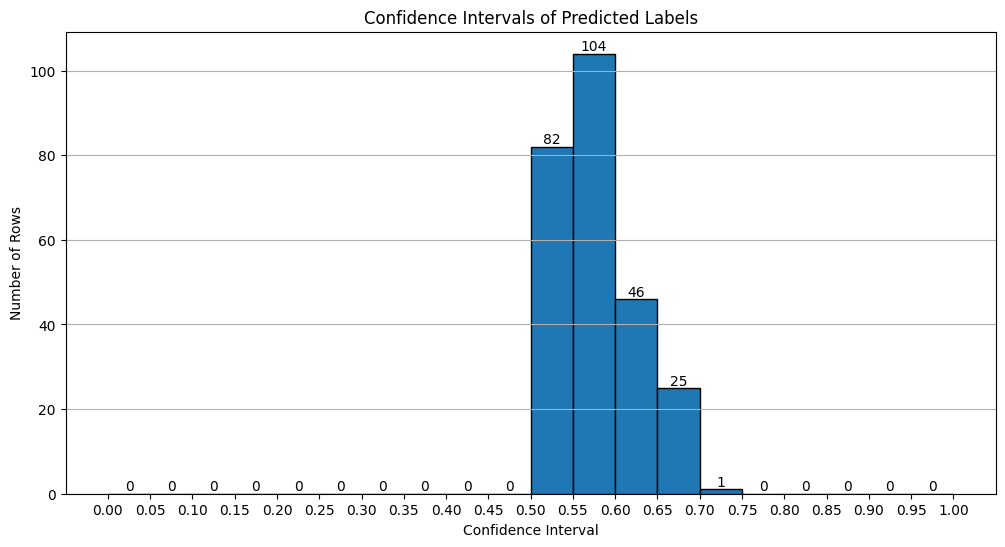

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


932


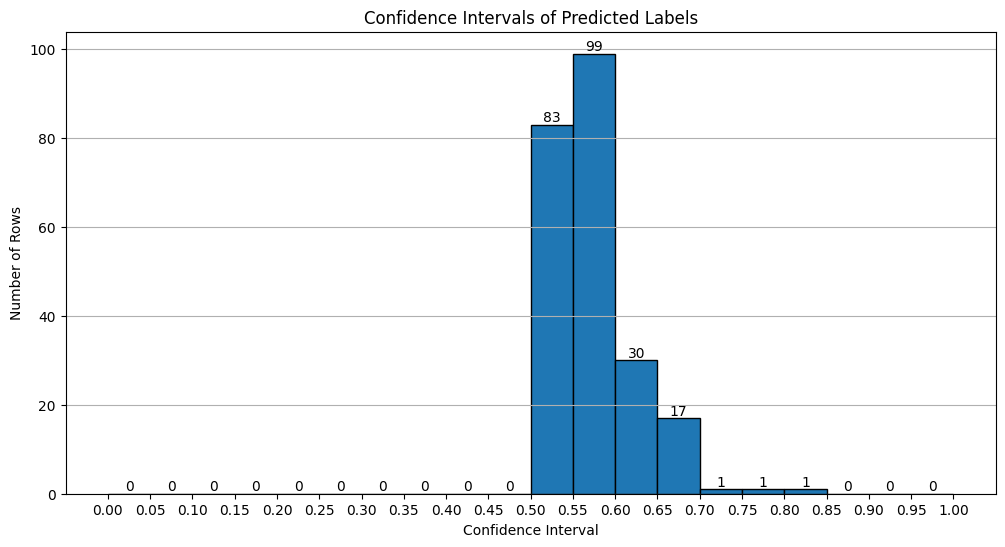

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


952


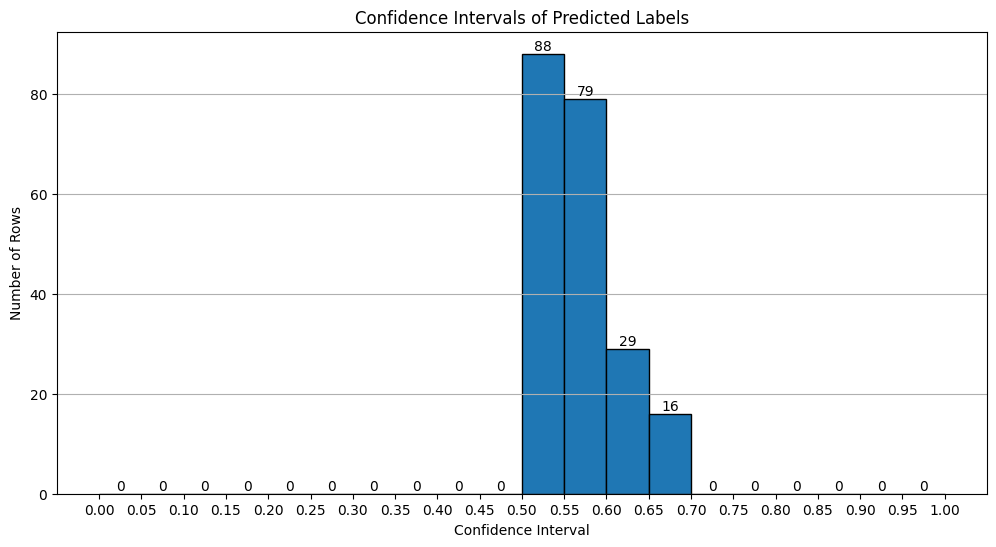

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


968


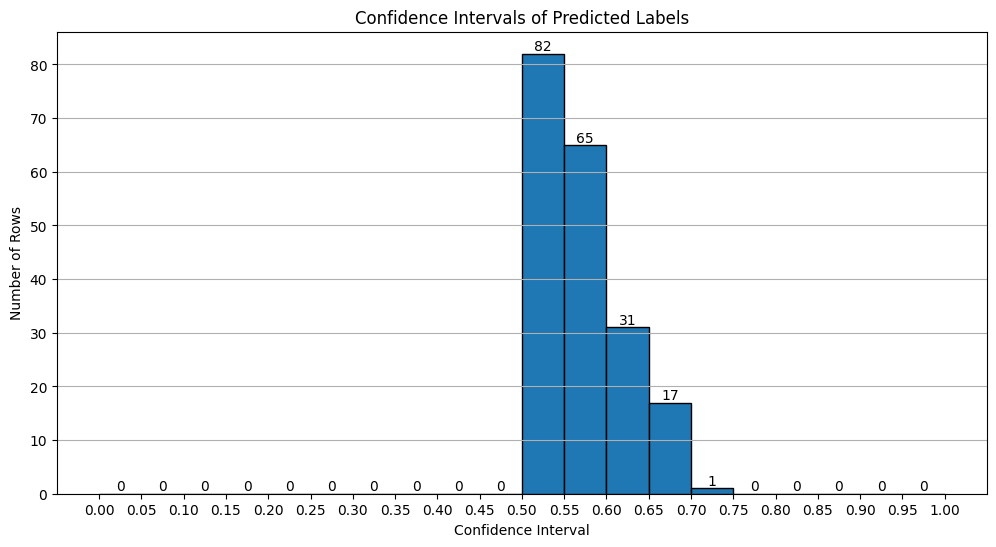

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


986


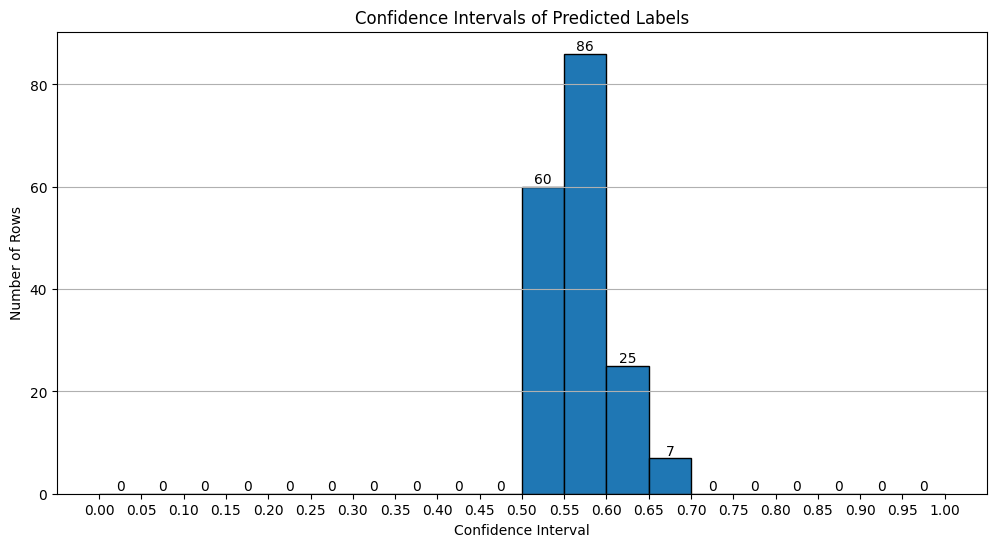

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


993


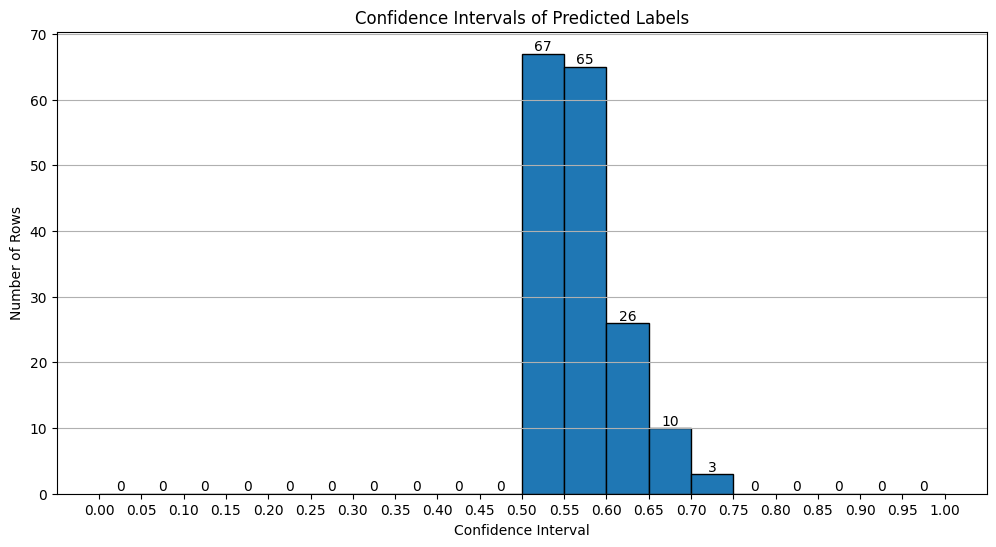

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1006


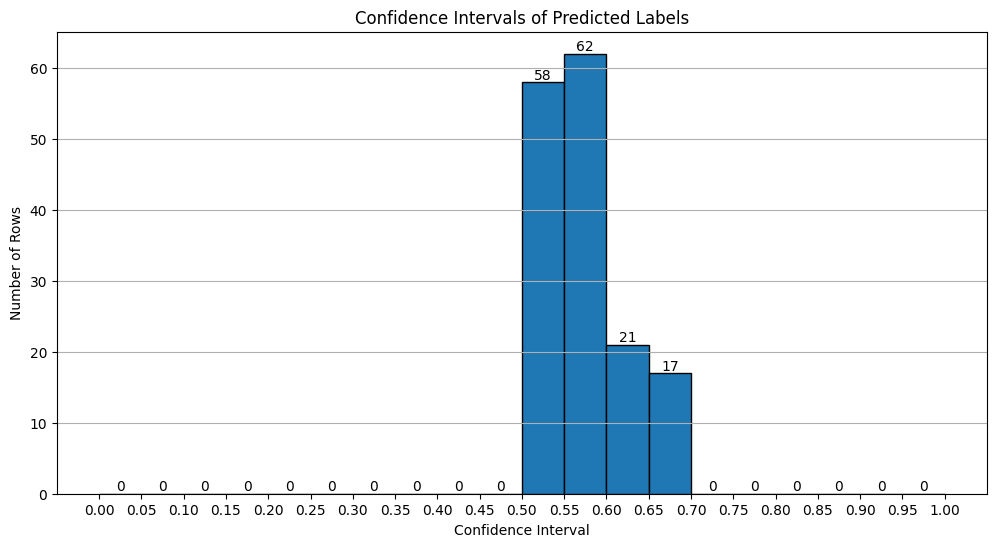

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1023


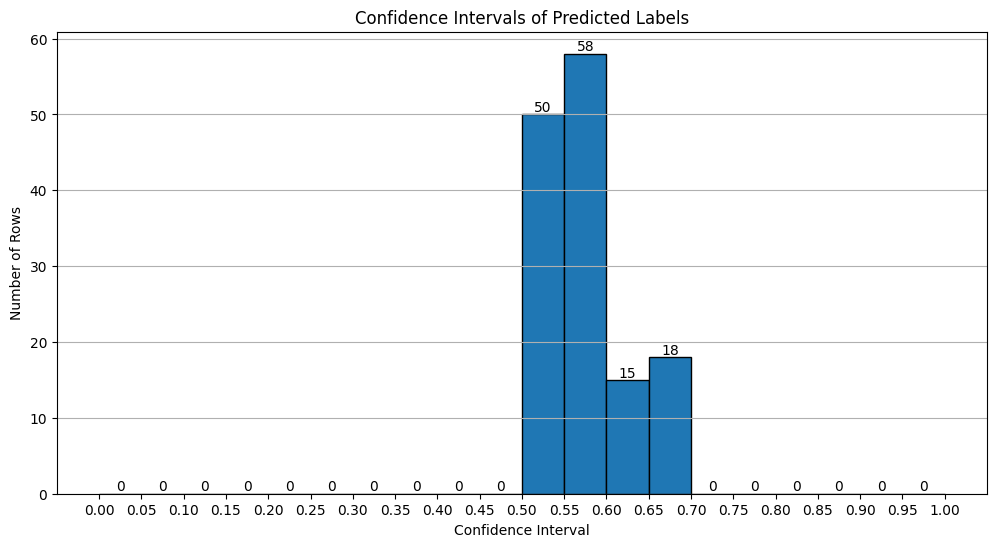

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1041


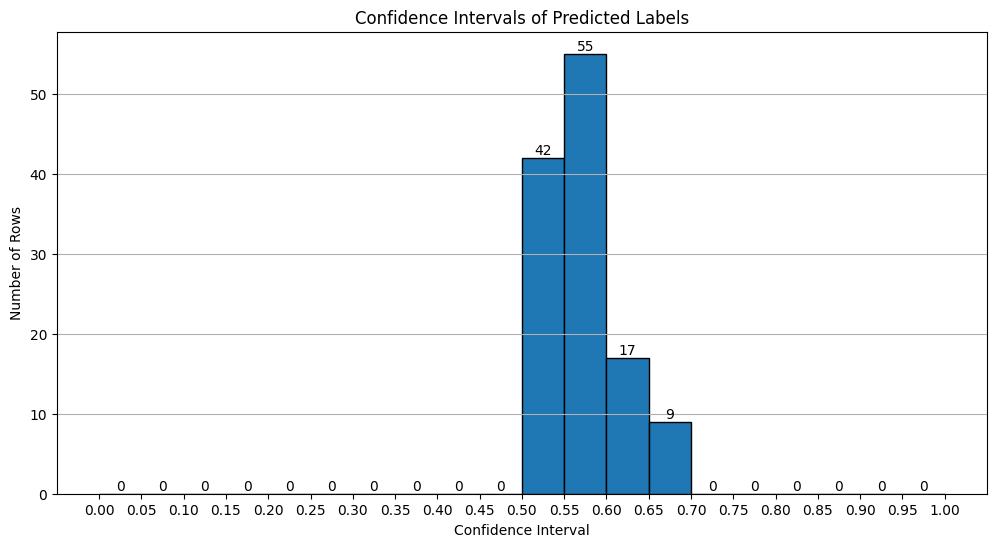

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1050


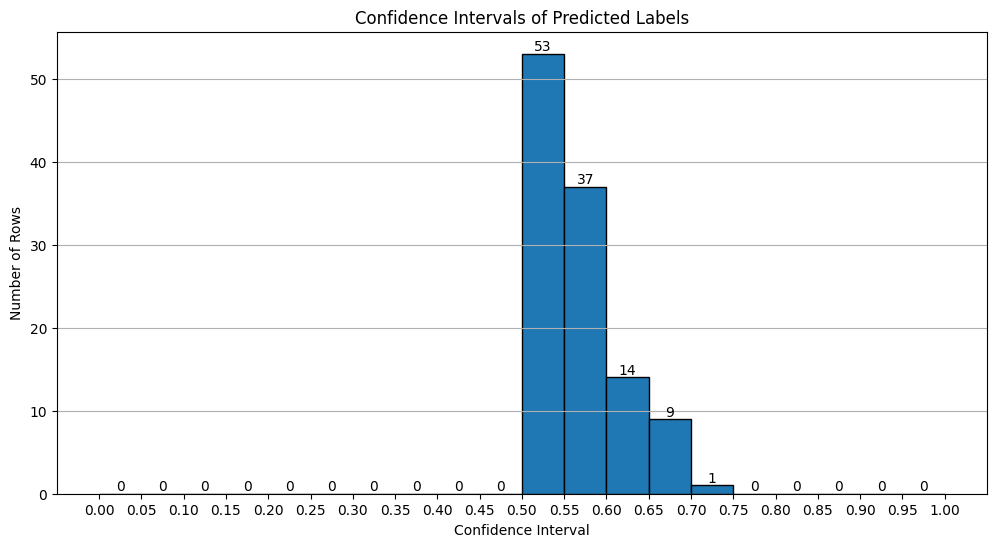

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1060


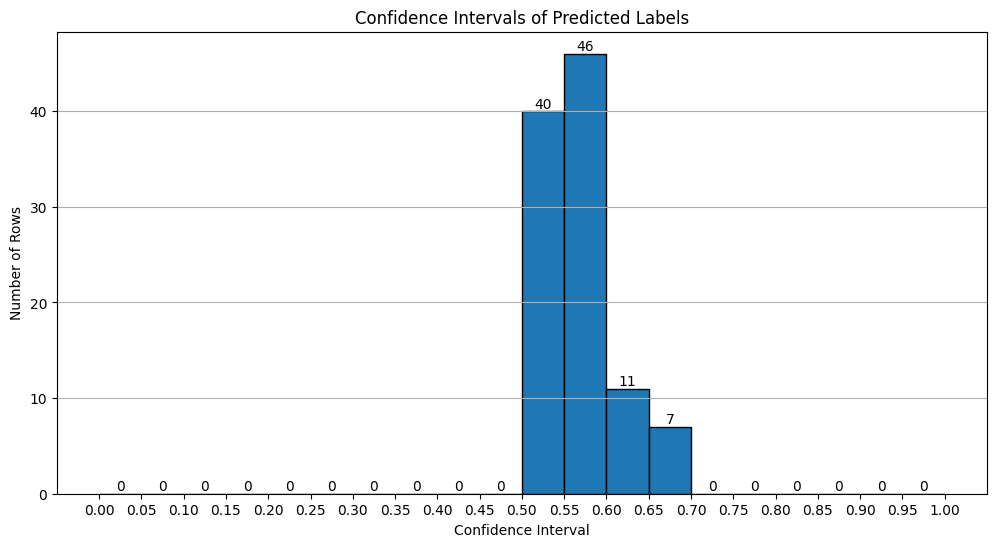

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1067


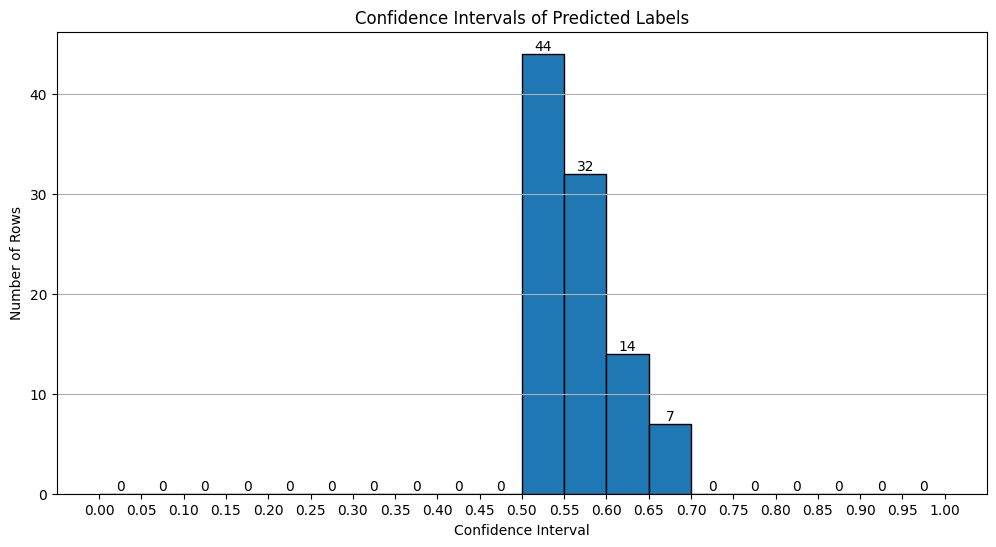

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1074


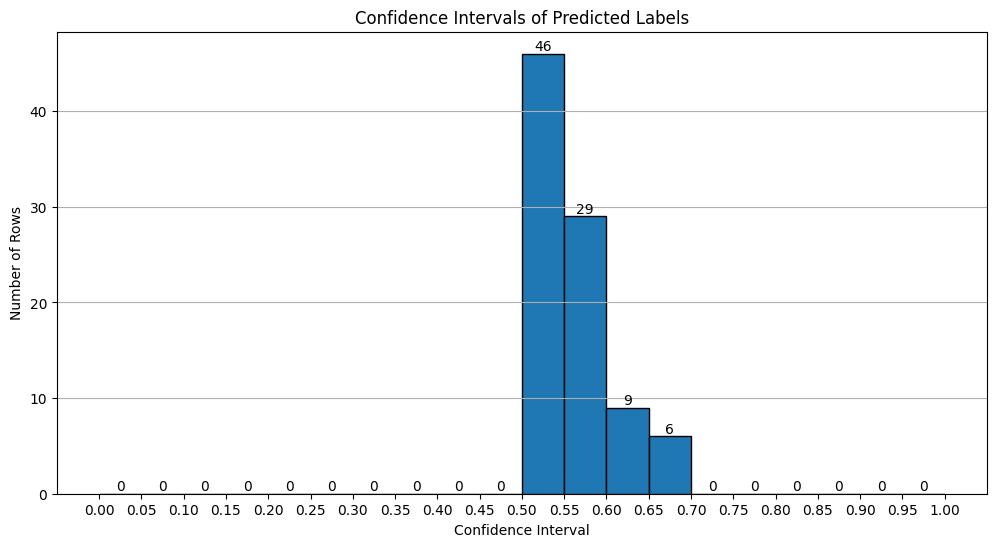

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1080


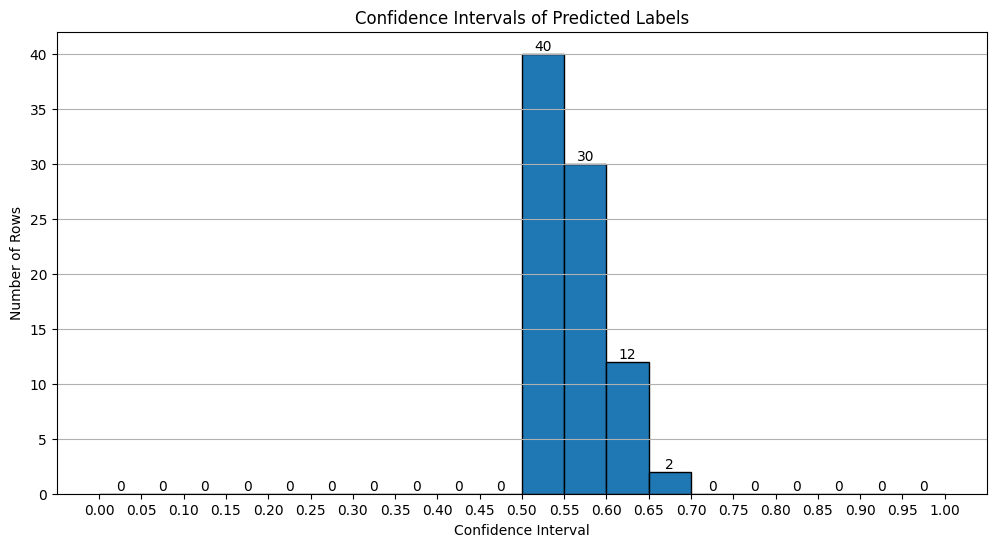

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1082


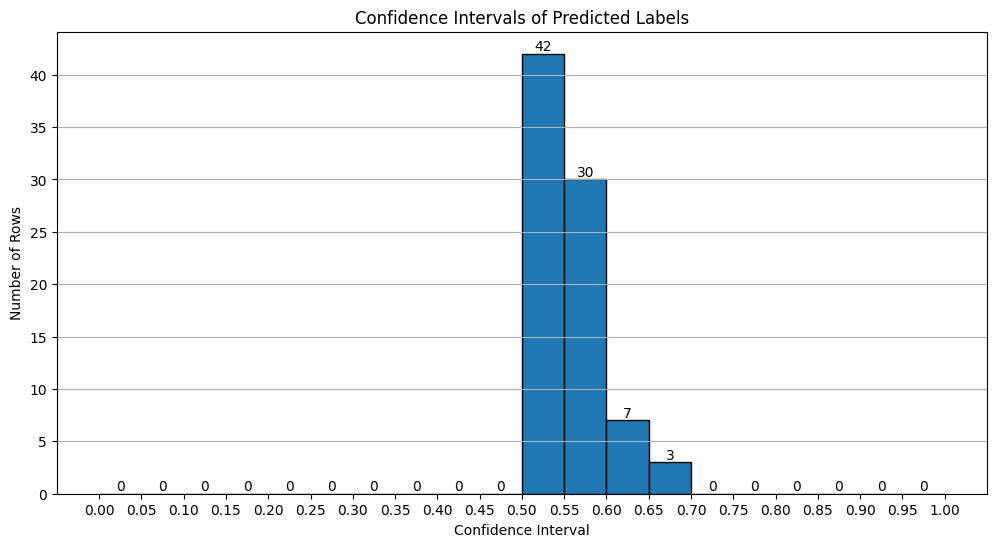

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1085


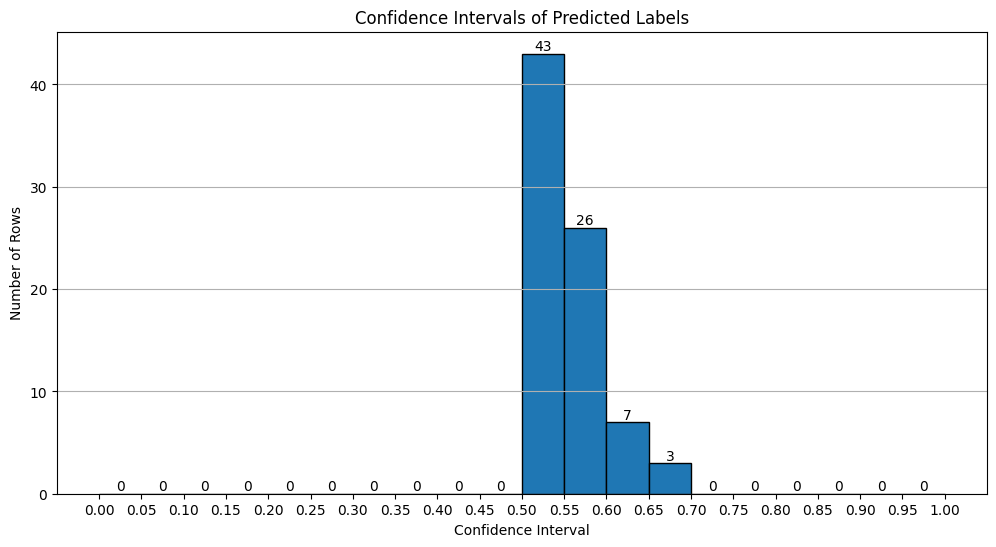

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1088


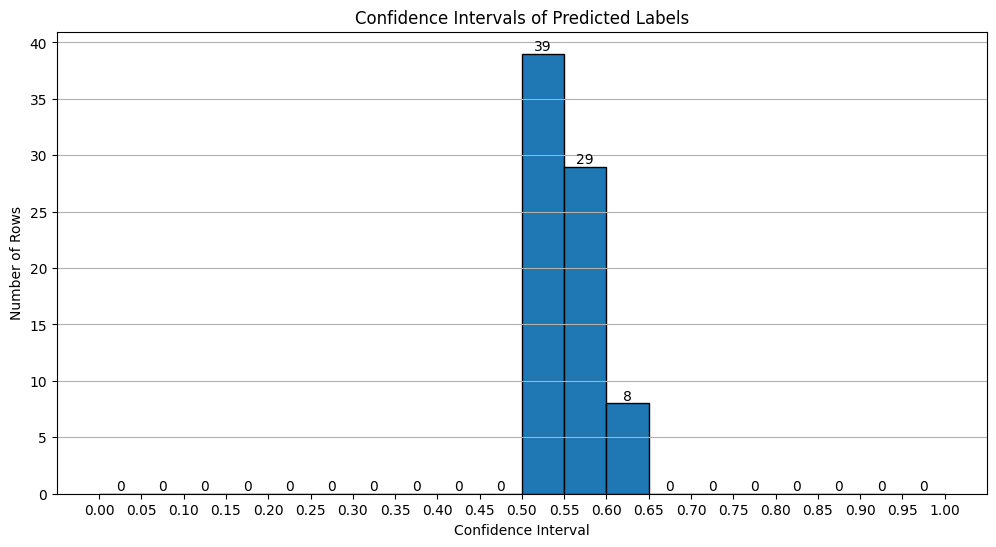

1088


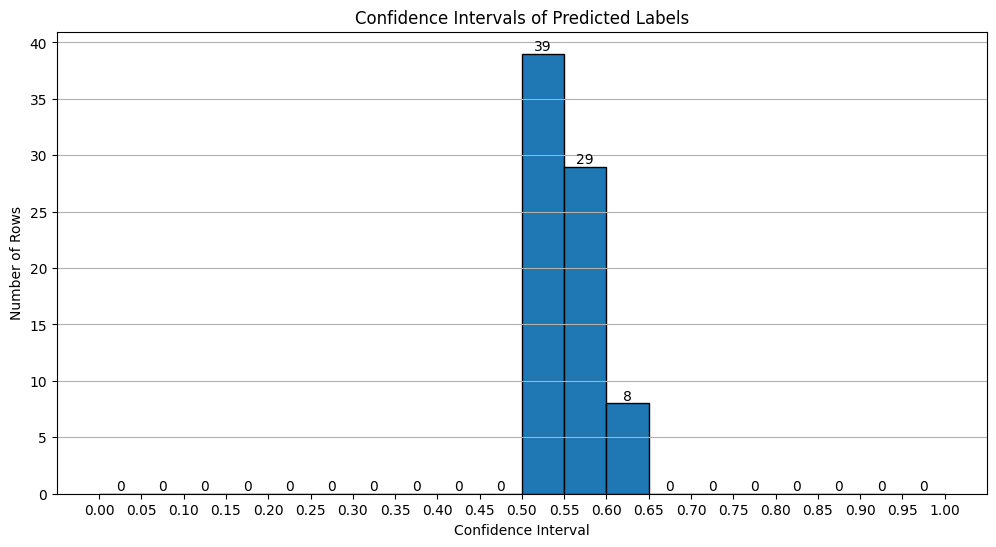

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1099


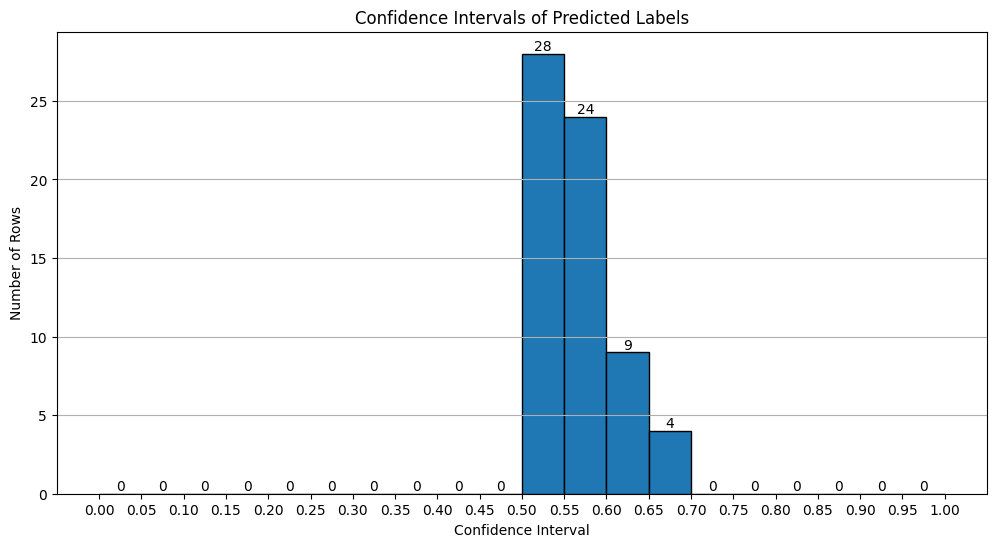

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1114


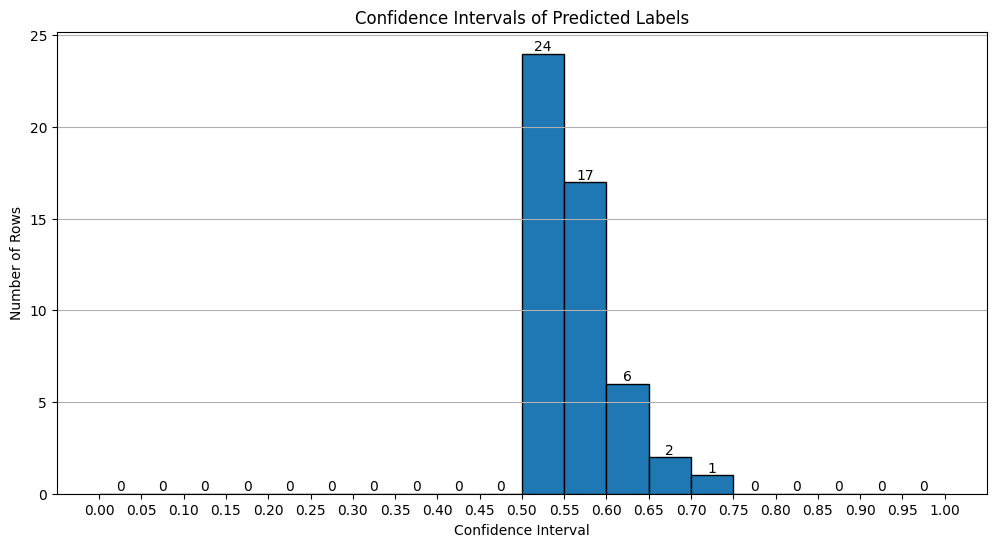

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1123


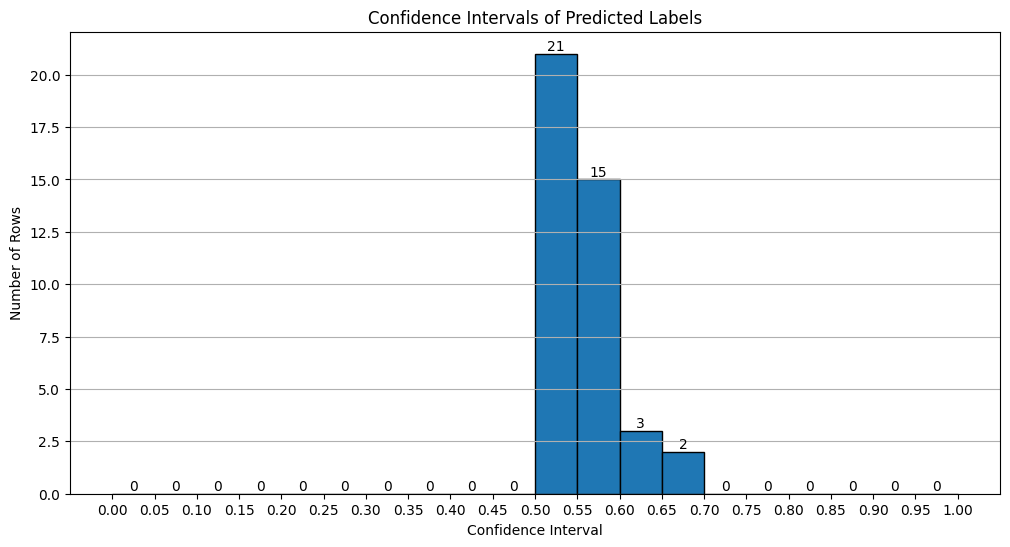

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1130


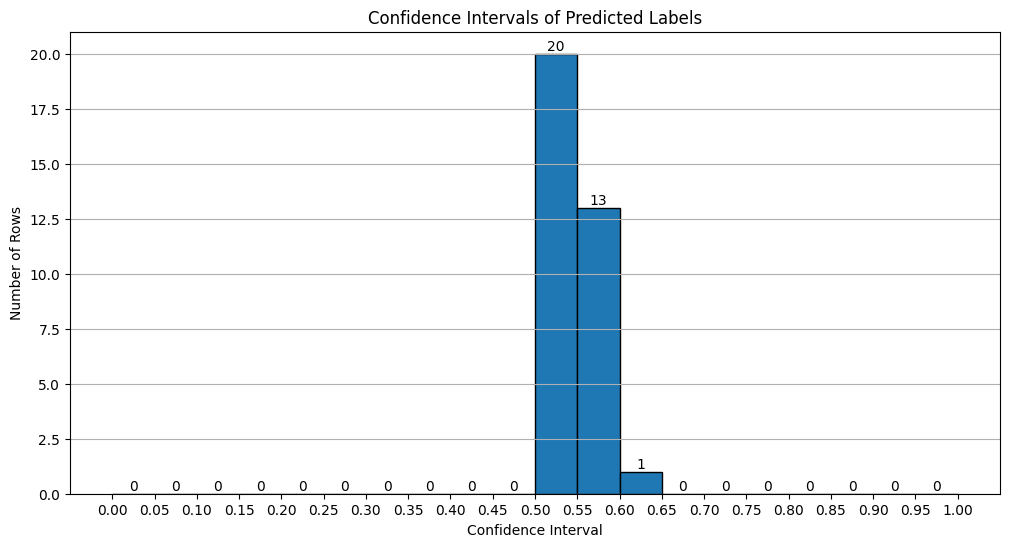

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1132


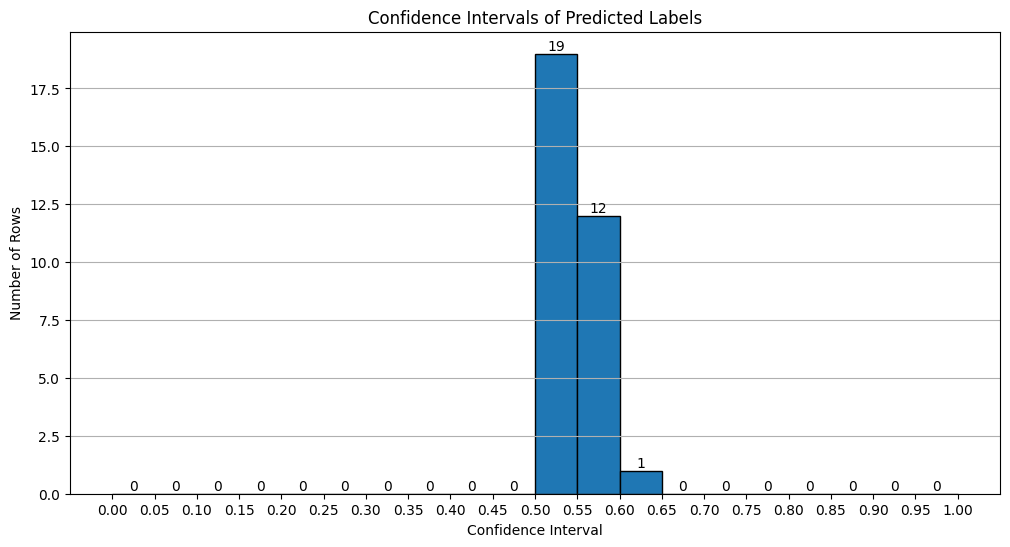

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1133


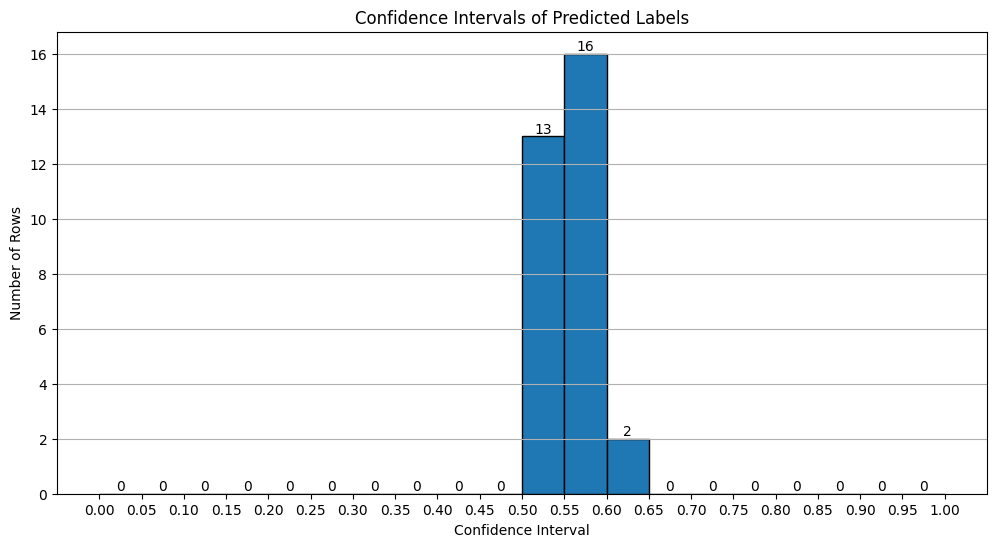

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1137


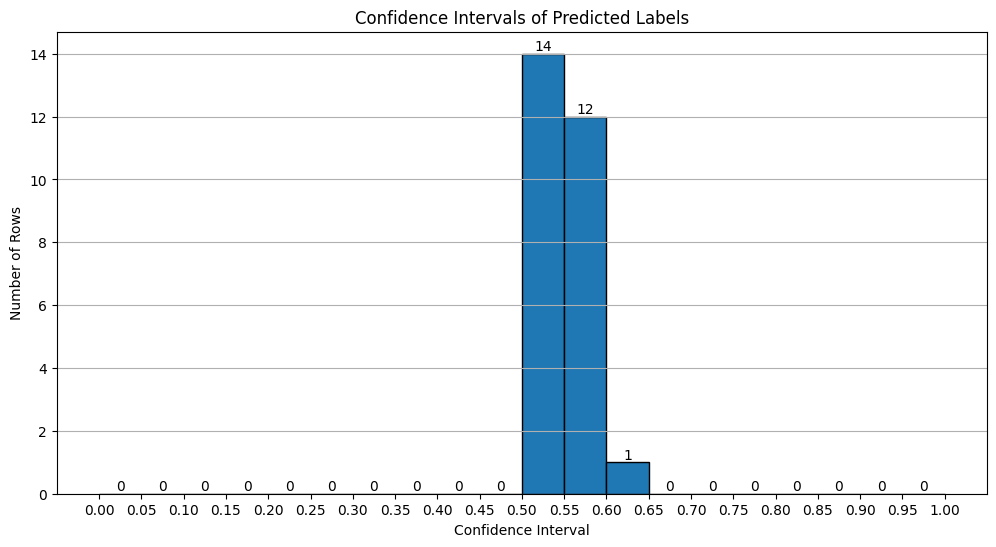

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1139


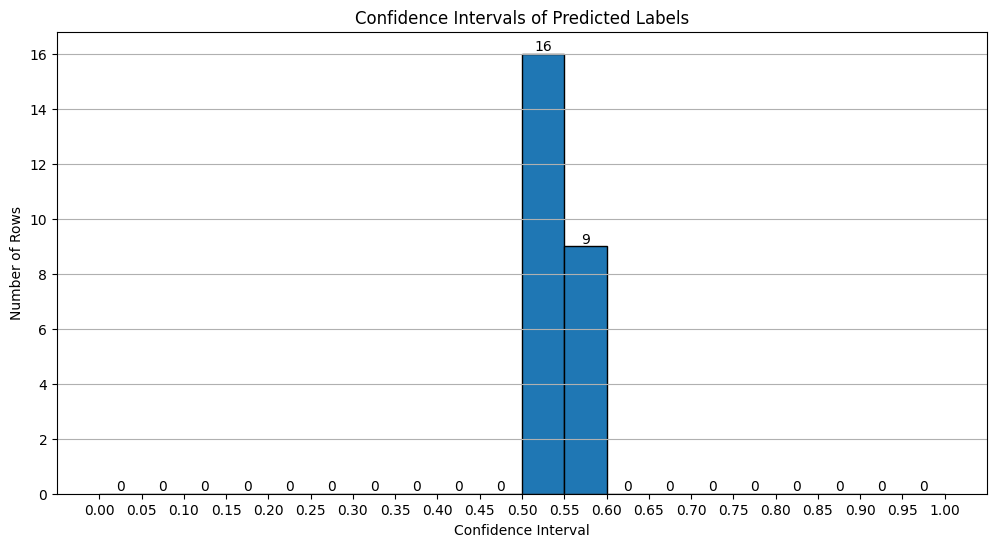

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1140


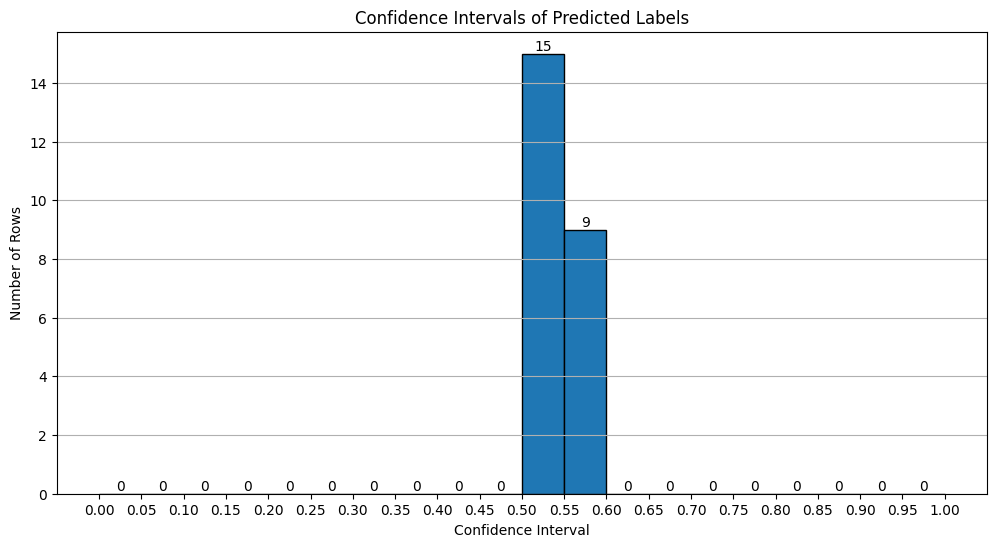

1140


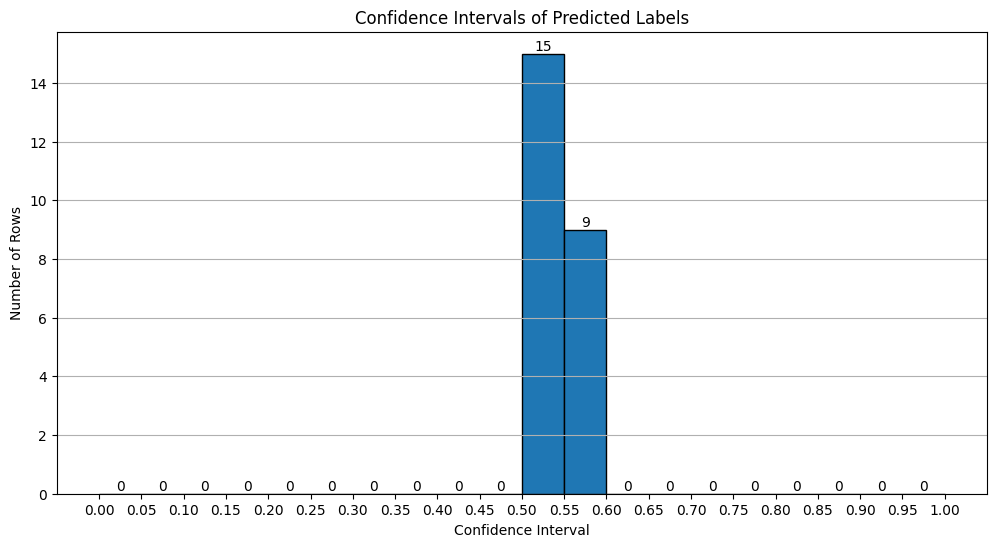

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1149


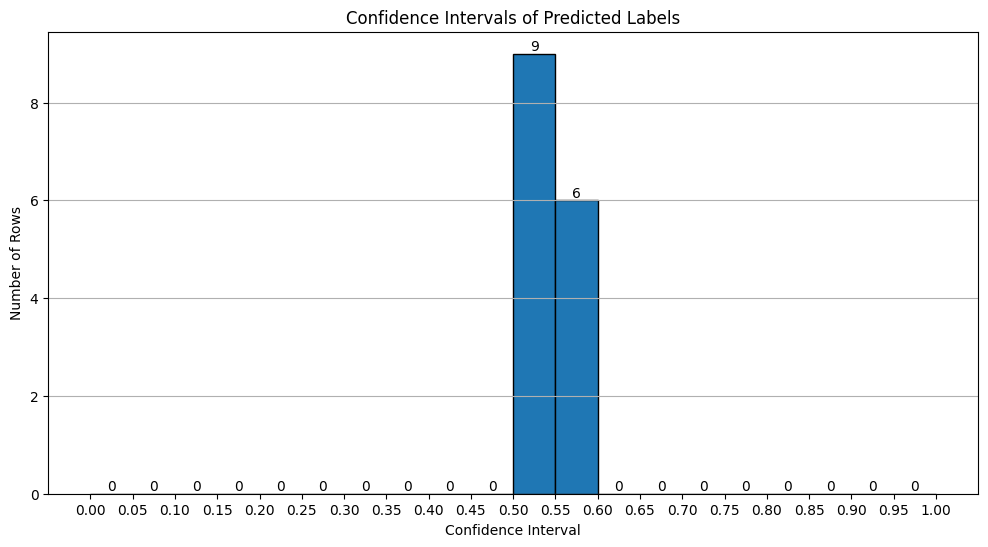

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1155


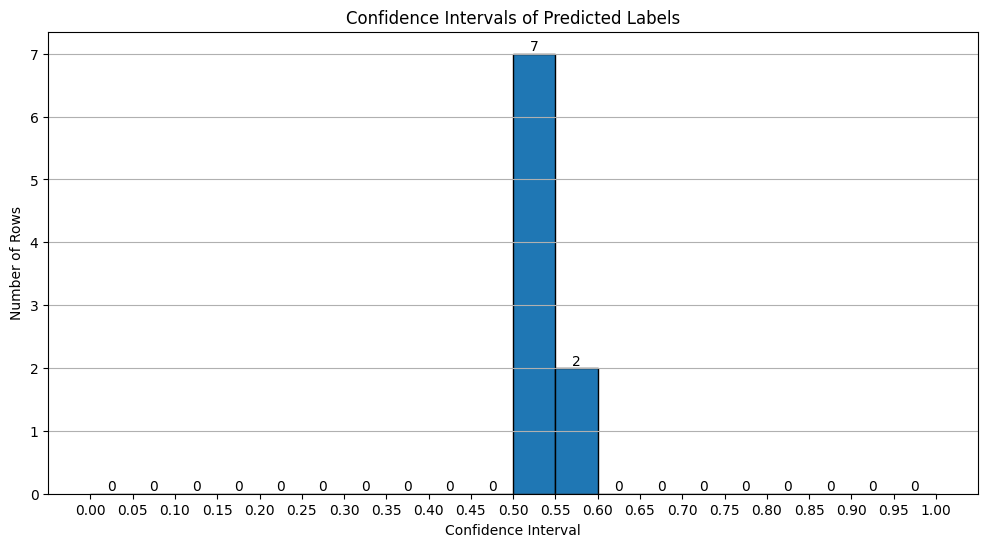

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1157


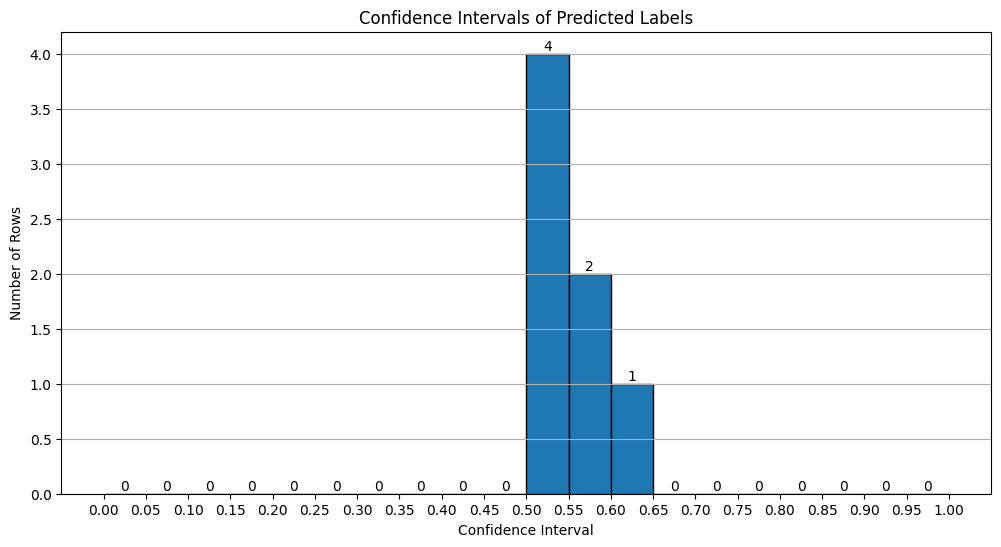

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1160


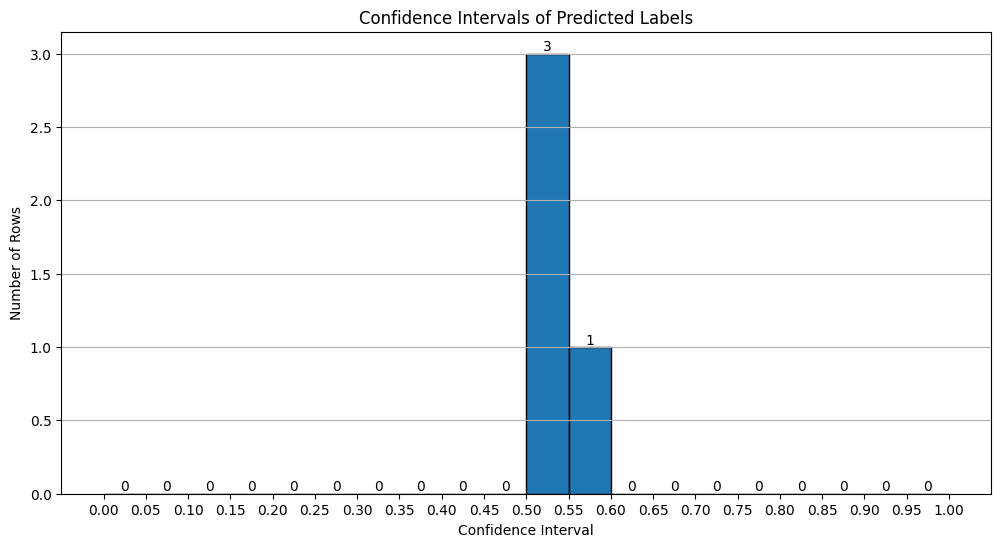

<ipython-input-17-943a35c30dcc>:63: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  high_confidence_df['label'] = high_confidence_df['predicted_label']


1161


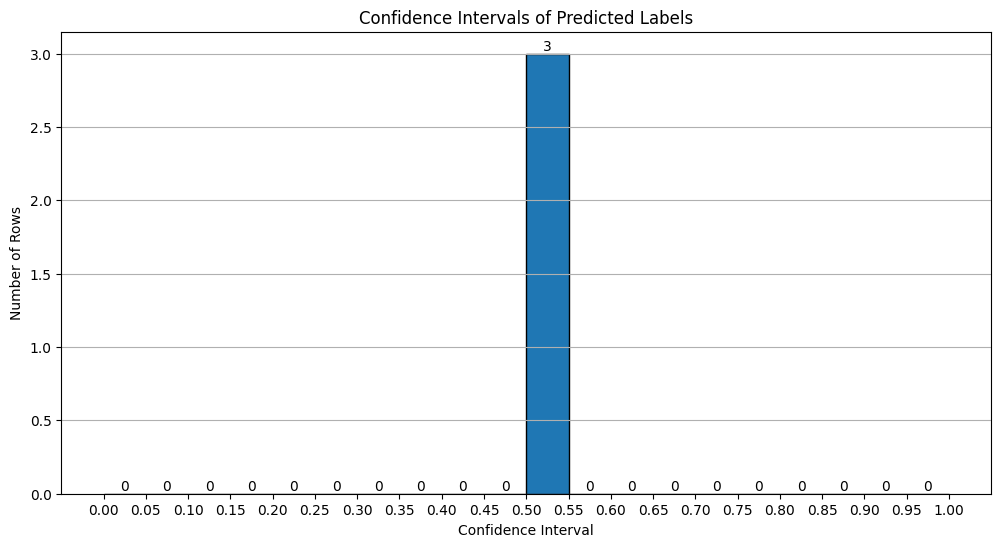

1161


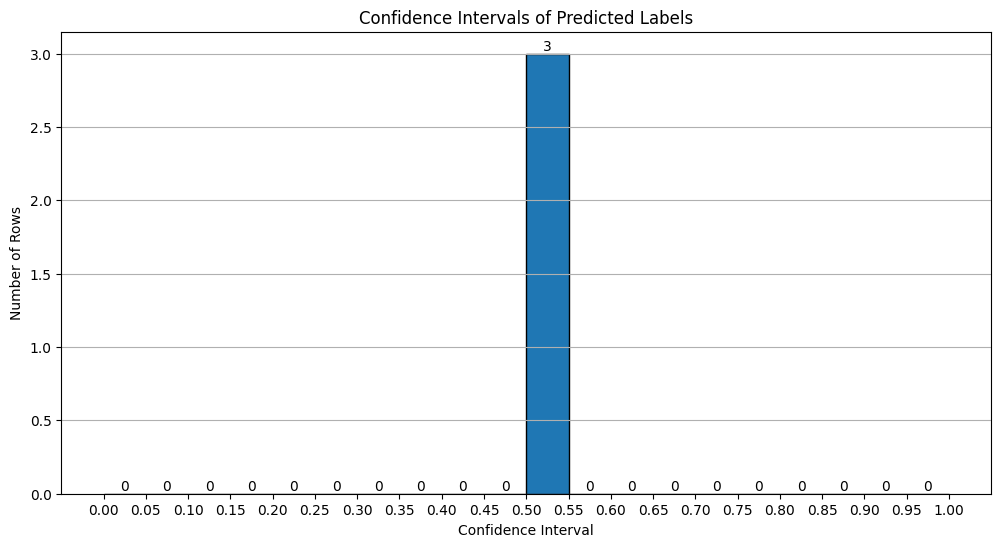

1164


In [ ]:
confidence_threshold = 0.70
while(len(unlabeled_df_ld) != 0):
    X_train, y_train, X_unlabeled, unlabeled_df_ld = RandomForestUtility.prepare_data(train_df_ld, unlabeled_df_ld)
    rf_model = RandomForestUtility.train_model(X_train, y_train)
    unlabeled_df_ld = RandomForestUtility.predict_and_add_confidence(rf_model, X_unlabeled, unlabeled_df_ld)
    RandomForestUtility.plot_confidence_intervals(unlabeled_df_ld)
    unlabeled_df_ld_len_before = len(unlabeled_df_ld)
    train_df_ld, unlabeled_df_ld = RandomForestUtility.filter_and_update_data(unlabeled_df_ld, train_df_ld, confidence_threshold=confidence_threshold)
    unlabeled_df_ld_len_after = len(unlabeled_df_ld)
    print(len(train_df_ld))

    if unlabeled_df_ld_len_after == unlabeled_df_ld_len_before:
        confidence_threshold -= 0.05

In [ ]:
print(train_df_ld)
print(test_df_ld)

                                                   text  label        PC1  \

0     fairly good romantic comedy in which i don't t...    1.0   6.051592   

1     "dressed to kill", is one of the best thriller...    1.0  -3.817276   

2     i'm glad that users (as of this date) who like...    1.0  -5.006744   

3     needed an excuse to get out of the house while...    0.0  -4.377620   

4     john candy's performance in once upon a crime ...    1.0  18.383525   

...                                                 ...    ...        ...   

1159  okay, i remember watching the first one, and b...    0.0  -4.145842   

1160  i see a lot of really negative posts by people...    1.0  -2.016882   

1161  because of all the negative reviews of this fi...    1.0   7.446229   

1162  other reviewers here seem to think this is an ...    1.0 -10.682465   

1163  personally, i disdain the jerry springer show,...    0.0   6.702948   



            PC2        PC3        PC4       PC5       PC6     

In [ ]:
# # Extract features and labels
# X_train = np.array(train_df_ld[['embedding_' + str(i) for i in range(1, 768)]])
# y_train = np.array(train_df_ld['label'].tolist())
# X_test = np.array(test_df_ld[['embedding_' + str(i) for i in range(1, 768)]])
# y_test = np.array(test_df_ld['label'].tolist())
# X_aug = np.array(unlabeled_df_ld[['embedding_' + str(i) for i in range(1, 768)]])


# # Extract features and labels
X_train = np.array(train_df_ld[['PC' + str(i) for i in range(1, 55 + 1)]])
y_train = np.array(train_df_ld['label'].tolist())
X_test = np.array(test_df_ld[['PC' + str(i) for i in range(1, 55 + 1)]])
y_test = np.array(test_df_ld['label'].tolist())

# Assuming `unlabeled_df` is another DataFrame similar to `train_df_ld` without a `label` column.
# Replace `unlabeled_df` with the actual DataFrame name if it's different.
# X_aug = np.array(unlabeled_df_ld[['PC' + str(i) for i in range(1, 141)]])

# Extract features and labels
# X_train = np.array(train_df['embedding'].tolist())
# y_train = np.array(train_df['label'].tolist())
# X_test = np.array(test_df['embedding'].tolist())
# y_test = np.array(test_df['label'].tolist())
# X_aug = np.array(unlabeled_df['embedding'].tolist())

In [ ]:
# from sklearn.semi_supervised import LabelPropagation
# label_prop_model = LabelPropagation()
# label_prop_model.fit(X_train, y_train)
# unlabeled_df['label'] = label_prop_model.predict(X_aug)

In [ ]:
# unlabeled_df['label'].unique()

In [13]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
# Define parameter grids
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },


    "k-NN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "k-NN": KNeighborsClassifier()
}


In [14]:
def grid_search_evaluate(models, param_grids, X_train, y_train, X_test, y_test):
    results = {}

    for name, model in models.items():
        print(f"\nPerforming Grid Search for {name}...")
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = {
            "best_params": grid_search.best_params_,
            "classification_report": report
        }

        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(classification_report(y_test, y_pred))

    return results


with adding augmented data

In [ ]:
# Perform Grid Search and evaluate models on initial labeled data
initial_results = grid_search_evaluate(models, param_grids, X_train, y_train, X_test, y_test)

In [ ]:
X_combined_full = np.vstack((X_train, X_aug))
y_combined_full = np.concatenate((y_train, unlabeled_df['label']))

NameError: name 'X_aug' is not defined

In [ ]:
# Evaluate models on the combined dataset
combined_results = grid_search_evaluate(models, param_grids, X_combined_full, y_combined_full, X_test, y_test)


In [ ]:
def compare_results(initial_results, combined_results):
    print("Comparing Model Performance Before and After Adding Augmented Data")

    for model in initial_results.keys():
        print(f"\nModel: {model}")
        print("\nBefore Adding Augmented Data:")
        print(pd.DataFrame(initial_results[model]).transpose())
        print("\nAfter Adding Augmented Data:")
        print(pd.DataFrame(combined_results[model]).transpose())

compare_results(initial_results, combined_results)

In [ ]:
X_train = np.array(train_df['embedding'].tolist())
y_train = np.array(train_df['label'].tolist())

In [ ]:
X_train

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train, y_train)

In [ ]:
X_aug = np.array(unlabeled_df['embedding'].tolist())
aug_labels = kmeans.predict(X_aug)
unlabeled_df['label'] = aug_labels

In [ ]:
initial_results = grid_search_evaluate(models, param_grids, X_train, y_train, X_test, y_test)


In [ ]:
X_combined_full = np.vstack((X_train, X_aug))
y_combined_full = np.concatenate((y_train, unlabeled_df['label']))

In [ ]:
# Evaluate models on the combined dataset
combined_results = grid_search_evaluate(models, param_grids, X_combined_full, y_combined_full, X_test, y_test)


label spreading

In [ ]:


from sklearn.semi_supervised import LabelSpreading
label_spread_model = LabelSpreading()
label_spread_model.fit(X_train, y_train)
unlabeled_df['label'] = label_spread_model.predict(X_aug)


In [ ]:
X_combined_full = np.vstack((X_train, X_aug))
y_combined_full = np.concatenate((y_train, unlabeled_df['label']))

In [ ]:
# Evaluate models on the combined dataset
combined_results = grid_search_evaluate(models, param_grids, X_combined_full, y_combined_full, X_test, y_test)


Using Graph

In [ ]:
pip install --upgrade networkx

In [ ]:
import numpy as np
import networkx as nx
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, and X_augmented are already defined
# Combine X_train and X_augmented
X_combined = np.vstack((X_train, X_aug))

# Create a k-nearest neighbors graph
graph = kneighbors_graph(X_combined, n_neighbors=10, mode='connectivity', include_self=True)

# Create a NetworkX graph
G = nx.from_scipy_sparse_array(graph)

# Assign initial labels
initial_labels = {i: label for i, label in enumerate(y_train) if label != -1}

# Propagate labels
for node in G.nodes():
    if node not in initial_labels:
        # Use majority vote of neighbors
        neighbor_labels = [initial_labels[n] for n in G.neighbors(node) if n in initial_labels]
        if neighbor_labels:
            initial_labels[node] = np.bincount(neighbor_labels).argmax()

# Extract propagated labels for the augmented data
X_train_len = len(X_train)
unlabeled_df['label'] = np.array([initial_labels[node] if node in initial_labels else -1 for node in range(X_train_len, X_train_len + len(X_aug))])



In [ ]:
X_combined_full = np.vstack((X_train, X_aug))
y_combined_full = np.concatenate((y_train, unlabeled_df['label']))

In [ ]:

combined_results = grid_search_evaluate(models, param_grids, X_combined_full, y_combined_full, X_test, y_test)


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, and X_augmented are already defined
# Combine X_train and X_augmented for clustering
X_combined = np.vstack((X_train, X_aug))

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_combined)

# Split clusters back into train and augmented sets
clusters_train = clusters[:len(X_train)]
clusters_augmented = clusters[len(X_train):]

# Assign initial labels to clusters using labeled data
cluster_labels = {}
for cluster in np.unique(clusters_train):
    mask = (clusters_train == cluster) & (y_train != -1)
    if np.sum(mask) > 0:
        cluster_labels[cluster] = np.bincount(y_train[mask]).argmax()
    else:
        cluster_labels[cluster] = -1

# Propagate initial cluster labels to all points in the cluster
initial_labels_train = np.array([cluster_labels[cluster] for cluster in clusters_train])

# Correctly labeled data points remain the same
initial_labels_train[y_train != -1] = y_train[y_train != -1]

# Perform label propagation on training data
label_prop_model = LabelPropagation()
label_prop_model.fit(X_train, initial_labels_train)

# Predict labels for the augmented data
unlabeled_df['label'] = label_prop_model.predict(X_aug)



In [ ]:
X_combined_full = np.vstack((X_train, X_aug))
y_combined_full = np.concatenate((y_train, unlabeled_df['label']))

In [ ]:

combined_results = grid_search_evaluate(models, param_grids, X_combined_full, y_combined_full, X_test, y_test)


# Using LLMs

In [1]:
# Install required package
!pip install flash-attn
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.3 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.5 MB/s eta 0:00:00
  Created wheel for flash-attn: filename=flash_attn-2.5.9.post1-cp310-cp310-linux_x86_64.whl size=120576656 sha256=0f3dddbf9bc350ea6b0306ec5ca5fee71b57fe1f06e6b72672690793d9dad2ce
  Stored in directory: /root/.cache/pip/wheels/cc/ad/f6/7ccf0238790d6346e9fe622923a76ec218e890d356b9a2754a
Successfully built flash-attn


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import nltk
import regex as re
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
pipe = pipeline("text-generation", model="microsoft/Phi-3-mini-128k-instruct", trust_remote_code=True)

config.json:   0%|          | 0.00/3.38k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
def extract_sentiment(text):
    # Define the regex pattern
    pattern = r'Sentiment:\s*(-?\d+)'  # This will match a number (integer) after "Sentiment:"
    match = re.search(pattern, text)  # Search for the pattern in the text
    if match:
        return int(match.group(1))  # Extract and return the matched number as an integer
    else:
        return None  # Return None if no match is found

In [7]:
# Load data
folder_path_train = '/kaggle/input/ca7-ds-spring1403/train_imdb.jsonl'
folder_path_test = '/kaggle/input/ca7-ds-spring1403/test_imdb.jsonl'
folder_path_aug = '/kaggle/input/ca7-ds-spring1403/aug_imdb_unlabeled.jsonl'
train_df = pd.read_json(folder_path_train, lines=True)
test_df = pd.read_json(folder_path_test, lines=True)
unlabeled_df = pd.read_json(folder_path_aug, lines=True)

In [8]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Rejoin words into a single string
    text = ' '.join(words)
    return text


# ## Apply Preprocessing to DataFrames

# In[7]:

train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)
unlabeled_df['text'] = unlabeled_df['text'].apply(preprocess_text)

## zero-shot

In [9]:
prompt = """
The following text is a review of a movie. Please classify the sentiment of the review as either positive (1) or negative (0). label is 0 or 1.

Format:
Text: <text>
Sentiment: <label>

Text: {text}
Sentiment:
"""

In [10]:
zero_shot_prompt = {
    "role": "user",
    "content": prompt.format(text="This movie was absolutely wonderful and a joy to watch!")
}

# Generate prediction
result = pipe(
    [zero_shot_prompt],
    truncation=True,
    max_new_tokens=100,
)

print(extract_sentiment(result[0]['generated_text'][1]['content']))

1


In [11]:
def predict_sentiment(text):
    zero_shot_prompt = {
        "role": "user",
        "content": prompt.format(text=text)
    }
    result = pipe([zero_shot_prompt], truncation=True, max_new_tokens=100)
    sentiment = extract_sentiment(result[0]['generated_text'][1]['content'])
    print(text, sentiment)
    return sentiment

In [12]:
sampled_unlabeled_df = unlabeled_df.copy()
sampled_unlabeled_df


text  \
0     relation fortier profiler fact police series v...   
1     process trying establish audiences empathy jak...   
2     give movie villains interesting roles unknown ...   
3     best scifi seen years watching scifi also beli...   
4     appalling piece rubbish people blubber good ye...   
...                                                 ...   
1009  unbelievablethis film gets f one worst films s...   
1010  sweet romantic dramacomedy stewart sullavan wr...   
1011  personally disdain jerry springer show however...   
1012  film looked promising actually pretty bad prem...   
1013  theres one thing need say movie scene shaq mus...   

                                              embedding  
0     [-0.09757755700000001, -0.1536363065, 0.311417...  
1     [-0.00033669360000000004, 0.08777780830000001,...  
2     [-0.275570631, -0.32913637160000003, 0.0793179...  
3     [0.1461943835, -0.2785910368, 0.4456491172, -0...  
4     [0.1696606129, 0.354041934, 0.4451519549000000...  
...                                                 ...  
1009  [-0.0955021083, 0.0211753864, 0.35705754160000...  
1010  [0.017505046, -0.050160985400000004, 0.4082049...  
1011  [-0.19647170600000002, -0.0579777397, 0.179255...  
1012  [-0.0007334474000000001, -0.1367768645, 0.1660...  
1013  [0.18008382620000002, 0.0705600306, 0.14128416...  

[1014 rows x 2 columns]

In [ ]:
# Apply predictions to the selected rows
sampled_unlabeled_df['predicted_label'] = sampled_unlabeled_df['text'].apply(predict_sentiment)

In [ ]:
# Create new DataFrame with embeddings and predicted labels
unlabeled_df_with_labels = sampled_unlabeled_df[['embedding', 'predicted_label']]
unlabeled_df_with_labels.columns = ['embedding', 'label']

# Append to train_df
extended_train_df = pd.concat([train_df, unlabeled_df_with_labels], ignore_index=True)
extended_train_df

In [ ]:
# Convert DataFrame to numpy arrays for training
X_train = np.array(extended_train_df['embedding'].tolist())
y_train = np.array(extended_train_df['label'].tolist())

X_test = np.array(test_df['embedding'].tolist())
y_test = np.array(test_df['label'].tolist())


In [ ]:
# Perform grid search and evaluate
initial_results = grid_search_evaluate(models, param_grids, X_train, y_train, X_test, y_test)

## one-shot

In [ ]:
prompt = """
The following text is a review of a movie. Please classify the sentiment of the review as either positive (1) or negative (0). label is 0 or 1.

Format:
Text: <text>
Sentiment: <label>

Example:
Text: {example1}
Sentiment: {label1}

Text: {text}
Sentiment:
"""

In [ ]:
one_shot_prompt = {
    "role": "user",
    "content": prompt.format(text     ="This movie was absolutely wonderful and a joy to watch!",
                             example1 ="fairly good romantic comedy dont think ive ever seen meg looking cuter players good job keeping lively romp course real world genius mathematician would even glance grease monkey love romantic comediesone totally forget reality good time nice film damn meg babe eh",
                             label1   ="1")
}

# Generate prediction
result = pipe(
    [one_shot_prompt],
    truncation=True,
    max_new_tokens=200,
)

print(extract_sentiment(result[0]['generated_text'][1]['content']))

In [ ]:
def predict_sentiment(text, example1, label1):
    print(prompt.format(text=text, example1=example1, label1=label1))
    one_shot_prompt = {
        "role": "user",
        "content": prompt.format(text=text, example1=example1, label1=label1)
    }
    result = pipe([one_shot_prompt], truncation=True, max_new_tokens=300)
    print(123)
    sentiment = extract_sentiment(result[0]['generated_text'][1]['content'])
    print(text, sentiment)
    return sentiment

In [ ]:
sampled_unlabeled_df = unlabeled_df.copy()
sampled_unlabeled_df


In [ ]:
predicted_labels = []
for index, row in sampled_unlabeled_df.iterrows():
    
    # Sample random example1 and label1 from the DataFrame
    example_row = unlabeled_df.sample(n=1).iloc[0]
    example1 = example_row['text']
    label1 = example_row['label'] if 'label' in example_row else 1  # Default to 'positive' if no label

    text = row['text']
    predicted_label = predict_sentiment(text, example1, label1)
    predicted_labels.append(predicted_label)

# Add the predicted labels to the DataFrame
sampled_unlabeled_df['predicted_label'] = predicted_labels

In [ ]:
# Create new DataFrame with embeddings and predicted labels
unlabeled_df_with_labels = sampled_unlabeled_df[['embedding', 'predicted_label']]
unlabeled_df_with_labels.columns = ['embedding', 'label']

# Append to train_df
extended_train_df = pd.concat([train_df, unlabeled_df_with_labels], ignore_index=True)
extended_train_df

In [ ]:
# Convert DataFrame to numpy arrays for training
X_train = np.array(extended_train_df['embedding'].tolist())
y_train = np.array(extended_train_df['label'].tolist())

X_test = np.array(test_df['embedding'].tolist())
y_test = np.array(test_df['label'].tolist())

In [ ]:
# Perform grid search and evaluate
initial_results = grid_search_evaluate(models, param_grids, X_train, y_train, X_test, y_test)

## few-shot

Here we get the sentence closest to the average for each label and write a chain of thoughts for it

In [17]:
train_df

text  label  \
0    fairly good romantic comedy dont think ive eve...      1   
1    dressed kill one best thrillers ever made deal...      1   
2    im glad users date liked movie coming forward ...      1   
3    needed excuse get house paint dried left movie...      0   
4    john candys performance upon crime possibly be...      1   
..                                                 ...    ...   
145  film thought great journey forrest gump rare t...      1   
146  wanted see longest time james merendino great ...      1   
147  egyptian movies lot filmes high level drama ro...      0   
148  antibush jokes get really easy show like bette...      0   
149  telefilms tend fall pitfalls low budget hasty ...      1   

                                             embedding  
0    [-0.0167805497, -0.0395836979, 0.1233159453000...  
1    [-0.12526972590000002, 0.10147688540000001, 0....  
2    [0.1312361956, 0.0294876788, 0.2328549027, -0....  
3    [0.1387384981, 0.0460377187, 0.3447172046, -0....  
4    [0.1606466323, -0.1768193543, 0.35633808370000...  
..                                                 ...  
145  [-0.0127362479, -0.1083025485, 0.1512588710000...  
146  [-0.0872147828, -0.1653934121, 0.238217473, -0...  
147  [0.0326799825, 0.0344635732, 0.344242215200000...  
148  [-0.039546337, -0.04593236, 0.119179666, 0.087...  
149  [-0.0471526384, 0.1628640443, 0.3060246408, -0...  

[150 rows x 3 columns]

In [18]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean

# Compute mean embeddings for each label
mean_embedding_0 = np.mean(train_df[train_df['label'] == 0]['embedding'].tolist(), axis=0)
mean_embedding_1 = np.mean(train_df[train_df['label'] == 1]['embedding'].tolist(), axis=0)

# Function to find the nearest row to the mean embedding
def find_nearest_row(mean_embedding, df, label):
    distances = df[df['label'] == label]['embedding'].apply(lambda x: euclidean(mean_embedding, x))
    min_index = distances.idxmin()
    return df.loc[min_index]

# Find the nearest row for each label
nearest_row_label_0 = find_nearest_row(mean_embedding_0, train_df, 0)
nearest_row_label_1 = find_nearest_row(mean_embedding_1, train_df, 1)

print("Nearest row for label 0:")
print(nearest_row_label_0['text'])
print("\nNearest row for label 1:")
print(nearest_row_label_1['text'])

Nearest row for label 0:
film proves commercial cinema elsethe hollywood movies serious crisisthere absolutely reason movie produced apart fact somebody expected success based shaquilles namethere worth referring plot bit perplexed knotwhat elsethe screen somewhat dimoneal bad actor francis capra even worserating

Nearest row for label 1:
hilarious film saw film sydney gay lesbian mardi gras film festival laughed start finish acting subtle funny im entirely certain real world influence dont get film holds without understanding show heather b steals every scene appears notably acting seldom talkative red costar highly recommended id love see released videodvd time future


In [19]:
prompt = """
The following text is a review of a movie. Please classify the sentiment of the review as either positive (1) or negative (0). Label is 0 or 1.

Format:
Text: <text>
Sentiment: <label>

Example one:
Text: film proves commercial cinema elsethe hollywood movies serious crisisthere absolutely reason movie produced apart fact somebody expected success based shaquilles namethere worth referring plot bit perplexed knotwhat elsethe screen somewhat dimoneal bad actor francis capra even worserating
Sentiment: 0

Explanation: The review is filled with negative language and criticism, such as "crisis," "absolutely no reason," "perplexed knot," "dim," "bad actor," and "even worse." The reviewer expresses clear dissatisfaction with the plot and the actors, indicating a negative sentiment.

Example two:
Text: hilarious film saw film sydney gay lesbian mardi gras film festival laughed start finish acting subtle funny im entirely certain real world influence dont get film holds without understanding show heather b steals every scene appears notably acting seldom talkative red costar highly recommended id love see released videodvd time future
Sentiment: 1

Explanation: The review contains positive expressions like "hilarious," "laughed start finish," "subtle funny acting," "highly recommended," and "id love see released videodvd." The reviewer enjoyed the film, praised the acting, and highly recommended it, indicating a positive sentiment.

Text: {text}
Sentiment:
"""

In [20]:
few_shot_prompt = {
    "role": "user",
    "content": prompt.format(text="This movie was absolutely wonderful and a joy to watch!")
}

# Generate prediction
result = pipe(
    [zero_shot_prompt],
    truncation=True,
    max_new_tokens=200,
)

print(extract_sentiment(result[0]['generated_text'][1]['content']))

1


In [21]:
def predict_sentiment(text):
    few_shot_prompt = {
        "role": "user",
        "content": prompt.format(text=text)
    }
    result = pipe([few_shot_prompt], truncation=True, max_new_tokens=200)
    sentiment = extract_sentiment(result[0]['generated_text'][1]['content'])
    print(text, sentiment)
    return sentiment

In [22]:
sampled_unlabeled_df = unlabeled_df.copy()
sampled_unlabeled_df


text  \
0     relation fortier profiler fact police series v...   
1     process trying establish audiences empathy jak...   
2     give movie villains interesting roles unknown ...   
3     best scifi seen years watching scifi also beli...   
4     appalling piece rubbish people blubber good ye...   
...                                                 ...   
1009  unbelievablethis film gets f one worst films s...   
1010  sweet romantic dramacomedy stewart sullavan wr...   
1011  personally disdain jerry springer show however...   
1012  film looked promising actually pretty bad prem...   
1013  theres one thing need say movie scene shaq mus...   

                                              embedding  
0     [-0.09757755700000001, -0.1536363065, 0.311417...  
1     [-0.00033669360000000004, 0.08777780830000001,...  
2     [-0.275570631, -0.32913637160000003, 0.0793179...  
3     [0.1461943835, -0.2785910368, 0.4456491172, -0...  
4     [0.1696606129, 0.354041934, 0.4451519549000000...  
...                                                 ...  
1009  [-0.0955021083, 0.0211753864, 0.35705754160000...  
1010  [0.017505046, -0.050160985400000004, 0.4082049...  
1011  [-0.19647170600000002, -0.0579777397, 0.179255...  
1012  [-0.0007334474000000001, -0.1367768645, 0.1660...  
1013  [0.18008382620000002, 0.0705600306, 0.14128416...  

[1014 rows x 2 columns]

In [ ]:
# Apply predictions to the selected rows
sampled_unlabeled_df['predicted_label'] = sampled_unlabeled_df['text'].apply(predict_sentiment)

In [ ]:
# Create new DataFrame with embeddings and predicted labels
unlabeled_df_with_labels = sampled_unlabeled_df[['embedding', 'predicted_label']]
unlabeled_df_with_labels.columns = ['embedding', 'label']

# Append to train_df
extended_train_df = pd.concat([train_df, unlabeled_df_with_labels], ignore_index=True)
extended_train_df

In [ ]:
# Convert DataFrame to numpy arrays for training
X_train = np.array(extended_train_df['embedding'].tolist())
y_train = np.array(extended_train_df['label'].tolist())

X_test = np.array(test_df['embedding'].tolist())
y_test = np.array(test_df['label'].tolist())


In [ ]:
# Perform grid search and evaluate
initial_results = grid_search_evaluate(models, param_grids, X_train, y_train, X_test, y_test)

## Question 1

### Semi-Supervised Learning Overview

Semi-supervised learning is a machine learning approach that utilizes both labeled and unlabeled data. Typically, the amount of labeled data is small compared to the vast amount of unlabeled data. The goal is to leverage the unlabeled data to improve the learning process and the performance of the model. This approach is particularly useful in scenarios where labeling data is expensive or time-consuming.

### Selecting Data for Manual Labeling

The selection of a proportion of data for manual labeling in a semi-supervised learning context is a critical step. The choice of which data points to label can significantly impact the performance of the model. Here are several strategies and factors to consider:

1. **Random Sampling**:
   - **Description**: Randomly select a subset of data for labeling.
   - **Pros**: Simple to implement and ensures a representative sample if the data is evenly distributed.
   - **Cons**: May not be efficient if the data distribution is imbalanced or if the model struggles with certain types of examples.

2. **Uncertainty Sampling**:
   - **Description**: Label the data points where the model is most uncertain. This can be measured by metrics such as entropy, margin sampling, or least confidence.
   - **Pros**: Focuses labeling efforts on the most ambiguous cases, potentially leading to more informative data for training.
   - **Cons**: Requires an initial model to estimate uncertainty, and might lead to over-sampling of outliers.

3. **Diversity Sampling**:
   - **Description**: Select a diverse set of data points that cover the entire feature space.
   - **Pros**: Ensures that the labeled data captures a broad spectrum of the data distribution.
   - **Cons**: Can be complex to implement and requires understanding of the data's distribution in the feature space.

4. **Cluster-Based Sampling**:
   - **Description**: Use clustering algorithms to group similar data points and select representatives from each cluster.
   - **Pros**: Ensures that different regions of the data distribution are represented in the labeled set.
   - **Cons**: Depends on the quality of the clustering, which might not always reflect the true structure of the data.

5. **Active Learning**:
   - **Description**: Iteratively select data points to label based on the model’s performance and feedback loop. The model actively queries for labels of the most informative examples.
   - **Pros**: Highly adaptive and focuses on improving model performance with each iteration.
   - **Cons**: Can be computationally intensive and requires an initial model and repeated interactions.

### Factors Influencing the Choice of Data for Labeling

1. **Data Distribution and Imbalance**:
   - If the data is imbalanced (e.g., rare events or minority classes), random sampling might miss critical examples. In such cases, strategies like uncertainty or diversity sampling can help ensure that the labeled data captures important variations.

2. **Model Performance and Uncertainty**:
   - Understanding where the model performs poorly can guide the selection of data for labeling. Focusing on uncertain predictions can help improve the model’s understanding of complex or ambiguous examples.

3. **Feature Space Coverage**:
   - Ensuring that the labeled data covers the entire feature space helps in building a robust model. Techniques like diversity sampling or cluster-based sampling are useful in achieving this.

4. **Computational Resources**:
   - The complexity and cost of different sampling strategies should be considered. While methods like active learning can provide significant benefits, they may require more computational resources and time.

5. **Domain Knowledge**:
   - Expert knowledge about the data and the problem domain can be invaluable in guiding the selection process. Experts can identify critical examples or regions in the data that require attention.

### Conclusion

In semi-supervised learning, the choice of which data to label is crucial. It significantly affects the efficiency of the labeling process and the ultimate performance of the model. Depending on the nature of the data and the resources available, different strategies like random sampling, uncertainty sampling, diversity sampling, cluster-based sampling, or active learning can be employed. Each has its advantages and trade-offs, and often, a combination of methods might be the most effective approach.


## Question 2:

WE have explained in the code

## Question 3:

### Limitations of Label Propagation Methods

Label propagation is a semi-supervised learning technique that spreads labels from labeled to unlabeled data through a graph representing the data’s structure. While useful, label propagation methods have several limitations:

1. **Scalability Issues**:
   - **Description**: Label propagation methods can struggle with large datasets due to the computational complexity of constructing and processing large graphs.
   - **Impact**: For massive datasets, the time and memory required to build and process the graph can be prohibitive.

2. **Graph Construction Sensitivity**:
   - **Description**: The effectiveness of label propagation heavily depends on how the graph is constructed. Poorly chosen similarity measures or graph structures can lead to inaccurate propagation.
   - **Impact**: If the graph does not accurately reflect the true relationships between data points, the propagated labels may be incorrect or biased.

3. **Homophily Assumption**:
   - **Description**: Label propagation assumes that connected nodes in the graph are likely to share the same label (homophily). However, this assumption may not hold in all datasets, especially in those with high heterophily (where connected nodes often have different labels).
   - **Impact**: In cases of heterophily, label propagation can lead to poor performance, as it fails to correctly propagate labels across differing nodes.

4. **Local Minima and Propagation Stability**:
   - **Description**: The propagation process can get stuck in local minima, especially in cases with complex label distributions or when the labeled data is sparsely distributed.
   - **Impact**: This can result in suboptimal labeling where some regions of the graph are incorrectly or inconsistently labeled.

5. **Propagation Delay and Uncertainty**:
   - **Description**: Labels may take multiple iterations to propagate through the graph, which can introduce delays and uncertainty in the final labeling.
   - **Impact**: Slow convergence and uncertainty in early stages can hinder real-time applications and make the approach less practical for dynamic datasets.

6. **Sensitivity to Initial Labeled Data**:
   - **Description**: The initial set of labeled data can have a significant impact on the final propagated labels. If the initial labeled set is not representative, the propagated labels might be biased.
   - **Impact**: This can lead to an uneven spread of labels and poor generalization in the model.

### Overcoming Limitations with Large Language Models (LLMs)

Large Language Models (LLMs), such as GPT-4 and similar architectures, can address many of the limitations of traditional label propagation methods through their sophisticated understanding of data and contextual relationships. Here’s how LLMs can be more effective:

1. **Handling Scalability**:
   - **LLM Advantage**: LLMs are designed to process large volumes of data efficiently. They leverage parallel processing and sophisticated architectures that allow them to scale with data size more effectively than graph-based methods.
   - **Effectiveness**: This makes LLMs suitable for tasks involving massive datasets where label propagation methods may struggle.

2. **Reducing Sensitivity to Graph Construction**:
   - **LLM Advantage**: LLMs do not rely on explicitly constructed graphs; instead, they capture relationships directly from the data through their training on diverse and extensive datasets.
   - **Effectiveness**: This mitigates issues arising from poor graph construction or inappropriate similarity measures, leading to more robust performance across different data types.

3. **Addressing Homophily and Heterophily**:
   - **LLM Advantage**: LLMs can understand nuanced and complex relationships between data points, beyond simple connectivity. They can model both homophilous and heterophilous relationships more effectively.
   - **Effectiveness**: This ability allows LLMs to handle datasets where traditional label propagation methods fail due to incorrect assumptions about node relationships.

4. **Mitigating Local Minima Issues**:
   - **LLM Advantage**: LLMs use optimization techniques that are less prone to getting stuck in local minima. Their training methods and architectures allow them to explore more complex decision boundaries.
   - **Effectiveness**: This results in more stable and accurate predictions even in challenging data environments.

5. **Faster Convergence and Reduced Uncertainty**:
   - **LLM Advantage**: LLMs can provide immediate predictions without the need for iterative propagation. They can infer labels based on contextual understanding from their pre-training.
   - **Effectiveness**: This leads to faster labeling and more reliable predictions, making LLMs suitable for applications requiring timely results.

6. **Robustness to Initial Labeled Data**:
   - **LLM Advantage**: LLMs utilize transfer learning and fine-tuning, allowing them to adapt to specific tasks with relatively small labeled datasets. They can generalize better from limited initial labels.
   - **Effectiveness**: This reduces the dependency on the representativeness of the initial labeled data, as LLMs leverage their extensive pre-trained knowledge.

### Conclusion

Large Language Models offer several advantages over traditional label propagation methods in semi-supervised learning. They address key limitations such as scalability, sensitivity to graph construction, and the reliance on homophily. By capturing complex relationships and providing faster, more reliable predictions, LLMs can significantly enhance the effectiveness of semi-supervised learning tasks. Their ability to handle large datasets, model nuanced interactions, and generalize from limited labeled data makes them a powerful tool for overcoming the challenges associated with label propagation methods.


## Question 4:

### History and Evolution of Language Models

Language models have a rich history, evolving from simple statistical methods to sophisticated deep learning architectures. Here’s a timeline of key developments in the field:

1. **1950s-1960s: Early Statistical Models**:
   - **Initial Concepts**: The concept of n-grams was introduced, which involves predicting the next word in a sequence based on the previous n-1 words. This approach laid the foundation for statistical language modeling.
   - **Markov Models**: Early language models were based on Markov chains, assuming that the probability of a word depends only on the previous word(s).

2. **1980s: Rule-Based and Statistical Methods**:
   - **Rule-Based Systems**: Systems like ELIZA used pre-defined rules to generate language, but lacked flexibility and robustness.
   - **Backoff Models**: Techniques like Katz’s back-off model improved the handling of rare words by backing off to lower-order n-grams.

3. **1990s: Probabilistic Models and the Rise of NLP**:
   - **Introduction of Hidden Markov Models (HMMs)**: HMMs became popular for tasks like speech recognition, where they model sequences probabilistically.
   - **Introduction of Maximum Entropy Models**: These models provided a way to combine multiple sources of information in predicting words or tags.

4. **2000s: The Era of Neural Networks**:
   - **Neural Language Models**: Bengio et al. (2003) introduced neural network-based language models that learn word embeddings and predict words based on distributed representations, overcoming the limitations of traditional n-gram models.
   - **Recurrent Neural Networks (RNNs)**: RNNs, and later LSTM (Long Short-Term Memory) networks, allowed modeling of longer contexts by maintaining a memory of previous inputs in sequences.

5. **2010s: Breakthroughs with Deep Learning**:
   - **Sequence-to-Sequence Models**: Introduced by Sutskever et al. (2014), these models enabled tasks like machine translation by mapping input sequences to output sequences using RNNs.
   - **Attention Mechanism**: Bahdanau et al. (2015) introduced attention mechanisms, allowing models to focus on relevant parts of the input sequence, improving translation and other tasks.
   - **Transformers**: Vaswani et al. (2017) introduced the Transformer architecture, which uses self-attention mechanisms and discards recurrent structures. This led to more efficient and scalable models.

6. **Late 2010s-2020s: Emergence of Large Language Models (LLMs)**:
   - **BERT (Bidirectional Encoder Representations from Transformers)**: Introduced by Devlin et al. (2018), BERT uses bidirectional training and revolutionized many NLP tasks by understanding context from both directions in a text.
   - **GPT (Generative Pre-trained Transformer)**: Starting with GPT-1 by OpenAI, and followed by GPT-2 and GPT-3, these models demonstrated the power of large-scale pre-training followed by fine-tuning for specific tasks.
   - **T5 (Text-to-Text Transfer Transformer)**: Raffel et al. (2019) proposed treating all NLP tasks as text-to-text problems, enabling the use of a single model for a wide variety of tasks.
   - **GPT-3 and Beyond**: GPT-3 (2020) with 175 billion parameters, showcased the capabilities of LLMs in generating coherent and contextually relevant text, pushing the boundaries of what language models can achieve.

### How Language Models Work

Language models (LMs) are designed to predict the likelihood of a sequence of words. They can generate text, understand context, and perform various NLP tasks. Here’s a simplified explanation of their operation:

1. **Training Phase**:
   - **Data**: LMs are trained on large corpora of text data.
   - **Objective**: The primary objective is to learn the probability distribution of sequences of words. For example, given a sequence of words, the model predicts the next word.
   - **Model Architecture**: Different architectures (e.g., RNNs, LSTMs, Transformers) process sequences and capture dependencies between words. Transformers, in particular, use self-attention mechanisms to weigh the relevance of each word in the context of the sequence.

2. **Inference Phase**:
   - **Text Generation**: Given a prompt, the model generates text by sampling from the learned probability distribution, word by word.
   - **Context Understanding**: Models like BERT analyze entire sentences to understand context and provide relevant predictions or classifications.
   - **Task Adaptation**: Through fine-tuning, models can be adapted to specific tasks like translation, summarization, or question answering.


### Advantages of Language Models (Especially LLMs)

Large Language Models (LLMs) like GPT-4 and BERT offer a range of powerful advantages that have transformed the field of Natural Language Processing (NLP). Below, we explore these advantages in detail:

#### 1. Versatility and Adaptability

- **Multi-task Learning**:
  LLMs can be fine-tuned or used as they are for a wide variety of tasks without needing task-specific architectures. For example, GPT-3 can handle tasks ranging from answering questions and generating text to translating languages and summarizing content.

- **Transfer Learning**:
  Pre-trained LLMs can be adapted to specific tasks with relatively small amounts of additional training data. This capability makes them highly versatile and useful across different domains and applications.

#### 2. Deep Contextual Understanding

- **Comprehensive Context Grasp**:
  LLMs like BERT and GPT-4 use advanced architectures that allow them to understand context from entire sentences or documents, capturing relationships between words that are far apart in the text. This leads to better comprehension and more coherent responses.

- **Handling Ambiguities**:
  By considering context from both directions (as in BERT’s bidirectional approach), LLMs can resolve ambiguities in language and provide more accurate interpretations and predictions.

#### 3. High-Quality Text Generation

- **Fluency and Coherence**:
  LLMs generate text that is not only grammatically correct but also contextually coherent and fluent. This makes them suitable for applications like content creation, chatbots, and virtual assistants.

- **Diversity in Output**:
  They can generate diverse outputs based on the same input prompt, which is beneficial for creative writing, brainstorming, and generating multiple versions of content.

#### 4. Scalability and Pre-trained Knowledge

- **Leverage Large-Scale Data**:
  LLMs are trained on vast corpora of text, enabling them to encode extensive world knowledge and language patterns. This extensive pre-training allows them to perform well even on tasks they haven't explicitly been trained for.

- **Handling Varied Inputs**:
  Their ability to process and understand a wide range of input types (e.g., various dialects, languages, and informal text) makes them adaptable to different user needs and applications.

#### 5. Reduced Need for Extensive Task-Specific Data

- **Few-Shot Learning**:
  LLMs can perform well on new tasks with little to no task-specific data through few-shot or zero-shot learning. This is particularly advantageous when labeled data is scarce or expensive to obtain.

- **Generalization**:
  They generalize well across different tasks and domains due to their training on diverse datasets, which reduces the need for extensive fine-tuning on new tasks.

#### 6. Efficiency in Development

- **Faster Deployment**:
  Using pre-trained LLMs reduces the time and resources required to develop and deploy NLP systems. This accelerates the development cycle and lowers the barrier to entry for implementing advanced language processing capabilities.

- **Streamlined Model Maintenance**:
  Maintaining a single, powerful LLM for multiple tasks simplifies the development and operational overhead compared to managing numerous specialized models.

#### 7. Enhanced Interaction and User Experience

- **Natural Language Understanding**:
  LLMs improve the interaction between humans and machines by understanding and responding in natural language. This leads to more intuitive and user-friendly applications in areas like customer service, personal assistants, and education.

- **Personalization**:
  They can be fine-tuned to adapt to individual user preferences and histories, providing more personalized and relevant responses in applications like recommendation systems and personalized content delivery.

### Conclusion

Large Language Models (LLMs) offer transformative advantages across a range of applications due to their versatility, deep contextual understanding, and ability to generate high-quality, coherent text. They significantly reduce the need for extensive task-specific data and enable faster, more efficient development of NLP systems. Despite their challenges, the benefits they bring to natural language understanding and generation are unparalleled, making them a cornerstone in modern AI and NLP advancements.


### Addressing Limitations of Large Language Models (LLMs)

While LLMs have significant potential, mitigating their limitations is crucial to maximizing their benefits and minimizing risks. Here are several strategies and ongoing research directions aimed at addressing the challenges associated with LLMs:

1. **Resource Efficiency and Environmental Impact**:
   - **Efficient Architectures**: Research into more efficient model architectures, like distillation techniques and pruning methods, aims to reduce the computational resources needed without sacrificing performance. Examples include the DistilBERT and TinyBERT models, which are smaller and faster while maintaining competitive accuracy.
   - **Hardware Advances**: The development of specialized hardware, such as TPUs (Tensor Processing Units) and more energy-efficient GPUs, can also help reduce the energy consumption associated with training and deploying LLMs.
   - **Sustainable AI Practices**: Initiatives like carbon offsetting and optimizing energy usage during training are being explored to mitigate the environmental impact of LLMs.

2. **Bias Mitigation and Ethical AI**:
   - **Bias Detection and Correction**: Techniques are being developed to identify and correct biases in training data and model outputs. Methods like adversarial training, fairness constraints, and post-processing adjustments are being explored.
   - **Diverse Training Data**: Using more diverse and representative training data can help reduce the risk of bias in LLMs. Efforts to curate balanced datasets that reflect a wide range of perspectives and contexts are ongoing.
   - **Ethical Guidelines and Policies**: Establishing robust ethical guidelines and policies for the deployment of LLMs is essential to ensure responsible use. This includes setting standards for content moderation, transparency, and accountability.

3. **Interpretability and Explainability**:
   - **Model Explainability Tools**: Tools and techniques to interpret and explain LLM decisions are under development. Examples include SHAP (SHapley Additive exPlanations), LIME (Local Interpretable Model-agnostic Explanations), and attention visualization techniques that highlight how models focus on different parts of the input.
   - **Interactive Interfaces**: Providing interactive interfaces that allow users to explore and understand the model's behavior can enhance transparency. These interfaces can help users see how changes in input affect the output.

4. **Control and Safety Mechanisms**:
   - **Controlled Generation**: Research into controlled text generation aims to give users more precise control over the content and style of LLM outputs. Techniques such as reinforcement learning with human feedback (RLHF) and prompt tuning are being explored to achieve this.
   - **Content Moderation**: Implementing robust content moderation and filtering mechanisms can help prevent the generation of harmful or inappropriate content. This includes using pre-trained classifiers to detect and filter out problematic outputs.
   - **Safety Protocols**: Developing safety protocols and guardrails for deploying LLMs in critical or sensitive applications is vital. This includes setting up monitoring systems to detect and respond to unsafe behavior in real-time.

5. **Generalization and Robustness**:
   - **Out-of-Distribution Handling**: Research into improving the generalization capabilities of LLMs involves training on more diverse datasets and developing models that can better handle out-of-distribution inputs. Techniques like meta-learning and domain adaptation are being explored to address these challenges.
   - **Robust Prompt Design**: Improving the robustness of LLMs to different prompts involves designing prompts that are less sensitive to variations and can reliably produce the desired outputs. Prompt engineering and few-shot learning approaches are being actively researched in this area.

### Future Directions in Language Modeling

The future of language modeling is likely to involve several exciting directions, driven by ongoing research and technological advancements:

1. **Multimodal Models**:
   - **Integration of Multiple Modalities**: Future models are expected to integrate text with other data types such as images, audio, and video. This multimodal approach can enable more comprehensive understanding and generation of content across different media.
   - **Examples**: Models like CLIP (Contrastive Language-Image Pre-training) and DALL-E by OpenAI are already showing how text and images can be combined effectively.

2. **Interactive and Conversational AI**:
   - **Enhanced Interactivity**: Advances in interactive AI will lead to more sophisticated conversational agents that can understand and respond to complex dialogues, maintain context over long interactions, and provide more natural and engaging user experiences.
   - **Personalization**: Future models will likely offer greater personalization, tailoring responses based on individual user preferences and histories.

3. **Federated and Privacy-Preserving Learning**:
   - **Federated Learning**: Federated learning allows models to be trained across decentralized data sources while maintaining privacy. This approach is crucial for applications where data privacy and security are paramount.
   - **Privacy Techniques**: Techniques like differential privacy and homomorphic encryption are being developed to protect sensitive data while allowing models to learn from it.

4. **Integration with Knowledge Graphs and Databases**:
   - **Knowledge-Augmented Models**: Combining LLMs with structured knowledge from databases and knowledge graphs can enhance their ability to provide accurate and contextually rich responses, especially for factual or domain-specific queries.
   - **Examples**: Google’s BERT-based models for search and models integrating with Wikidata for enhanced fact-checking and response generation.

5. **Continual Learning and Adaptability**:
   - **Lifelong Learning**: Future models will be designed to continuously learn and adapt to new information and tasks without forgetting previous knowledge, mimicking human-like learning capabilities.
   - **Domain Adaptation**: Models will become more adept at quickly adapting to new domains with minimal additional data, improving their applicability across various industries and use cases.

### Conclusion

Language models have come a long way from simple statistical methods to sophisticated LLMs capable of understanding and generating human language with remarkable accuracy. While they offer immense benefits across various tasks, including text generation, translation, and sentiment analysis, addressing their limitations is essential for responsible and effective deployment. Ongoing research and innovation are focused on enhancing the efficiency, fairness, interpretability, and safety of these models, paving the way for even more powerful and versatile AI systems in the future.


## Question 5:

### Comparison of LLMs and Label Propagation Methods

Language Models (especially Large Language Models or LLMs) and Label Propagation Methods are two distinct approaches used in various machine learning and natural language processing tasks. Each has its own set of advantages and disadvantages, which we will explore below.

### Label Propagation Methods

**Overview**: Label propagation is a semi-supervised learning technique that spreads labels from a small set of labeled data to a larger set of unlabeled data through a graph structure that represents the data's similarities or relationships.

#### Advantages

1. **Utilizes Unlabeled Data**:
   - **Efficiency**: Label propagation can effectively leverage large amounts of unlabeled data to improve classification or clustering accuracy, which is beneficial in scenarios where labeled data is scarce or expensive to obtain.
   - **Scalability with Data Size**: It scales well with the addition of more unlabeled data, as long as the graph structure can be efficiently managed.

2. **Simple and Intuitive**:
   - **Ease of Implementation**: Label propagation algorithms are generally simpler to implement and understand compared to more complex models like LLMs.
   - **Graph-Based Representation**: They provide an intuitive way to model relationships between data points through graphs, which can be particularly useful for data with inherent structural or relational properties.

3. **Low Resource Requirements**:
   - **Computational Efficiency**: Compared to LLMs, label propagation methods typically require less computational power and memory, making them suitable for applications with limited resources.
   - **Minimal Training**: These methods do not require extensive training processes and can quickly propagate labels through the dataset.

#### Disadvantages

1. **Dependency on Graph Construction**:
   - **Graph Sensitivity**: The effectiveness of label propagation heavily depends on how well the graph represents the true similarities between data points. Poorly constructed graphs can lead to inaccurate label propagation.
   - **Homophily Assumption**: It assumes that similar (connected) nodes should have similar labels, which may not hold true for all datasets, particularly those with heterophily (diverse labels among connected nodes).

2. **Limited by Initial Labeled Data**:
   - **Propagation Quality**: The quality of the propagated labels is highly influenced by the initial set of labeled data. If this set is not representative or contains noise, the final labels can be biased or incorrect.
   - **Limited Flexibility**: These methods may struggle with datasets that have complex, non-linear relationships which are not easily captured by simple similarity measures used in graph construction.

3. **Scalability Issues with Large Graphs**:
   - **Resource Constraints**: While computationally efficient for small to medium-sized datasets, label propagation can become resource-intensive for very large graphs, both in terms of memory and processing power.
   - **Convergence Speed**: Propagating labels through large graphs can be slow, especially if the graph has complex structures or requires many iterations to converge.

### Large Language Models (LLMs)

**Overview**: Large Language Models are advanced machine learning models trained on vast amounts of text data to understand and generate human language. They use architectures like Transformers and are capable of performing a wide range of NLP tasks.

#### Advantages

1. **Versatility and Task Generalization**:
   - **Multi-task Capability**: LLMs can handle a wide range of tasks, including text generation, translation, summarization, and question answering, without needing task-specific architectures.
   - **Few-Shot Learning**: They can adapt to new tasks with minimal additional data through few-shot or zero-shot learning, making them extremely versatile.

2. **Deep Contextual Understanding**:
   - **Comprehensive Context Modeling**: LLMs capture long-range dependencies and contextual relationships within text, leading to more coherent and contextually relevant outputs.
   - **Ambiguity Resolution**: Models like BERT can understand context from both directions in a sentence, helping to disambiguate meanings and improve accuracy.

3. **High-Quality Text Generation**:
   - **Natural and Coherent Outputs**: LLMs generate fluent, grammatically correct, and contextually appropriate text, which is invaluable for applications like chatbots, content creation, and interactive systems.
   - **Diverse and Creative Responses**: They can produce a wide range of responses to the same prompt, facilitating creative applications and generating multiple perspectives on a given topic.

4. **Scalability with Data and Complexity**:
   - **Pre-trained Knowledge**: LLMs leverage extensive pre-trained knowledge from large datasets, making them powerful tools for understanding and generating text across diverse domains.
   - **Handling Complexity**: Their advanced architectures allow them to model complex patterns and relationships in data, outperforming simpler models on many tasks.

#### Disadvantages

1. **High Resource Requirements**:
   - **Computational and Memory Demand**: Training and deploying LLMs require substantial computational resources, including high-end GPUs or TPUs, and large amounts of memory, making them costly and resource-intensive.
   - **Energy Consumption**: The energy costs associated with training large LLMs are significant, raising concerns about their environmental impact.

2. **Data and Bias Issues**:
   - **Bias Propagation**: LLMs can inherit and amplify biases present in their training data, leading to biased or unfair outputs. This is a critical issue when deploying these models in sensitive applications.
   - **Dependence on Quality and Diversity of Data**: The performance and fairness of LLMs are closely tied to the quality and diversity of their training data. Poor or unbalanced data can result in suboptimal or biased models.

3. **Interpretability and Control**:
   - **Lack of Transparency**: LLMs, especially large ones, operate as "black boxes," making it difficult to understand their internal workings and how they arrive at specific outputs.
   - **Output Control**: Controlling the content and tone of generated text can be challenging, and ensuring that the outputs are appropriate for all contexts requires careful management.

4. **Generalization and Robustness Challenges**:
   - **Prompt Sensitivity**: LLM outputs can be highly sensitive to the phrasing of input prompts, requiring careful crafting to achieve the desired results.
   - **Out-of-Distribution Performance**: LLMs may struggle with inputs that are significantly different from their training data, potentially leading to errors or nonsensical outputs.

### Summary

- **Label Propagation Methods** are simpler, more resource-efficient, and leverage unlabeled data effectively, but they are highly dependent on graph quality and the assumption of label similarity among connected nodes.
- **Large Language Models (LLMs)** offer unparalleled versatility, deep contextual understanding, and high-quality text generation, but they come with high resource demands, potential bias issues, and challenges in interpretability and control.

Choosing between these methods depends on the specific requirements, available resources, and constraints of the task at hand.
